<a href="https://colab.research.google.com/github/kikiymini/7506R-1C2024-GRUPO02/blob/main/7506R_1C2024_GRUPO02_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>

#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Propiedades en venta</center>

### <center> Grupo 2</center>

## Integrantes:

*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


# Importación de librerias

In [679]:
import pandas as pd
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from mpl_toolkits.mplot3d import Axes3D

from shapely import wkt
from shapely.geometry import MultiPolygon, Polygon, Point

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Lectura de archivo

### Desde google drive

In [680]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/7506R-1C2024-GRUPO02/Dataset/properati_argentina_2021.csv'
barrios_file = '/content/drive/MyDrive/7506R-1C2024-GRUPO02/Dataset/barrios.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Desde maquina local

In [681]:
# Si se esta trabajando en local, descomentar esta celta y comentar la de arriba
# file_path = './dataset/properati_argentina_2021.csv'
# barrios_file = './dataset/barrios.csv'
# df = pd.read_csv(file_path)

In [682]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [683]:
df.shape

(460154, 20)

# Análisis Exploratorio y Pre-procesamiento de Datos

En esta sección vamos a filtrar y seleccionar los datos a trabajar a lo largo del proyecto.




#### Filtrado

Se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

En la etapa de filtrado, vamos a utilizar la funcionalidad de `str.contains()` de pandas. Este código se basa en la documentación oficial de pandas que puedes encontrar en [este enlace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).


In [684]:
df["property_type"].value_counts()

property_type
Departamento       231358
Casa               120768
Lote                28748
PH                  25910
Local comercial     20546
Oficina             16085
Otro                 7713
Cochera              4111
Depósito             4050
Casa de campo         865
Name: count, dtype: int64

In [685]:
# filtro por tipo de propiedad
# str.contains() se utiliza para buscar patrones de texto dentro de las cadenas en una serie.
# USD: indica el patrón que busco
# case: no distingue entre mayúsculas y minúsculas
# na: no registro valores NaN
filtro = df.property_type.str.contains('Casa|PH|Departamento',case=False,na=False)
ds_propiedades_filtradas = df[filtro]
ds_propiedades_filtradas = ds_propiedades_filtradas[~ds_propiedades_filtradas['property_type'].str.contains('Casa de campo')]

In [686]:
df["place_l2"].value_counts().head() # Hay muchas ubicaciones

place_l2
Capital Federal             157563
Bs.As. G.B.A. Zona Norte     89693
Santa Fe                     47861
Bs.As. G.B.A. Zona Sur       47754
Bs.As. G.B.A. Zona Oeste     28352
Name: count, dtype: int64

In [687]:
# filtro propiedades en Capital Federal
filtro = ds_propiedades_filtradas.place_l2.str.contains('Capital Federal',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [688]:
df["operation"].value_counts()

operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64

In [689]:
# filtro propiedades en venta
filtro = ds_propiedades_filtradas.operation.str.contains('Venta',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [690]:
df["property_currency"].value_counts()

property_currency
USD    349104
ARS     88869
UYU      3506
PEN        99
COP        12
Name: count, dtype: int64

In [691]:
# filtro por moneda DÓLAR
filtro = ds_propiedades_filtradas.property_currency.str.contains('USD',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [692]:
# DataSet filtrado
ds_propiedades_filtradas.head()

id  start_date    end_date  created_on    latitud  \
25  CyZu6IaZgmQYGk8jmPajCg==  2021-09-09  2021-09-26  2021-09-09        NaN   
42  d3Z0MblSb2IMBoOBMGJEEQ==  2021-09-09  2021-09-26  2021-09-09 -34.637319   
43  rL7qPkQnomsMGu2ViS3sBw==  2021-09-09  2021-09-28  2021-09-09 -34.628647   
49  vuX/ccLAMVml4qWRFcOJUA==  2021-09-09  2022-01-05  2021-09-09 -34.610027   
51  ZTtSCeqZ3HUgf5jjwEzRcw==  2021-09-09  2022-03-09  2021-09-09 -34.631621   

     longitud         place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
25        NaN  Capital Federal      NaN      NaN      NaN       NaN     Venta   
42 -58.361124  Capital Federal     Boca      NaN      NaN       NaN     Venta   
43 -58.361871  Capital Federal     Boca      NaN      NaN       NaN     Venta   
49 -58.401934  Capital Federal     Once      NaN      NaN       NaN     Venta   
51 -58.416825  Capital Federal    Boedo      NaN      NaN       NaN     Venta   

   property_type  property_rooms  property_bedrooms  property_surface_total  \
25          Casa             4.0                3.0                   171.0   
42  Departamento             3.0                2.0                    58.0   
43  Departamento             4.0                3.0                    70.0   
49  Departamento             4.0                2.0                     NaN   
51            PH             4.0                2.0                     NaN   

    property_surface_covered  property_price property_currency  \
25                     133.0        210000.0               USD   
42                      55.0         82900.0               USD   
43                      70.0         99000.0               USD   
49                     104.0        146000.0               USD   
51                      73.0        250000.0               USD   

                                 property_title  
25  VENTA CASA LLAVE EN MANO - COSTA ESMERALDA   
42       VENTA TRES AMBIENTES LA BOCA PISO ALTO  
43   Departamento - 4 Ambientes - Catalinas Sur  
49          Venta departamento 4 ambientes Once  
51                                   PH - Boedo

In [693]:
ds_propiedades_filtradas.shape

(94249, 20)

#### Sets de entrenamiento y test

Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

En esta sección se utiliza el método `train_test_split()` de Scikit-learn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Este método es útil para evaluar el rendimiento de un modelo de aprendizaje automático.

El método `train_test_split()` se puede encontrar en la documentación oficial de Scikit-learn:

- [train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Documentación de train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


In [694]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
prop_train, prop_test = train_test_split(ds_propiedades_filtradas, train_size=0.8)
print("Propiedades para entrenar:", len(prop_train))
print("Propiedades para testear:", len(prop_test))

Propiedades para entrenar: 75399
Propiedades para testear: 18850


## Exploración Inicial

### Medidas de resumen de las variables cuantitativas del Dataset

In [695]:
# Creo resumen con describe
prop_train_resumen = prop_train.describe()
# Agrego moda a la tabla resumen
prop_train_resumen.loc['mode'] = prop_train.mode().iloc[0]
prop_train_resumen


latitud      longitud  place_l6  property_rooms  \
count  72414.000000  72414.000000       0.0    74549.000000   
mean     -34.591749    -58.449352       NaN        2.823713   
std        0.168938      0.287098       NaN        1.430844   
min      -41.168947    -71.439510       NaN        1.000000   
25%      -34.615877    -58.466485       NaN        2.000000   
50%      -34.595836    -58.438859       NaN        3.000000   
75%      -34.577516    -58.408755       NaN        4.000000   
max      -24.219827    -54.133330       NaN       40.000000   
mode     -34.541250    -58.472966       NaN        3.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       66657.000000            71518.000000              72745.000000   
mean            2.016097              109.222028                 89.951199   
std             1.138536             1013.834948               1100.727959   
min            -1.000000               10.000000                  1.000000   
25%             1.000000               45.000000                 40.000000   
50%             2.000000               65.000000                 58.000000   
75%             3.000000              105.000000                 89.000000   
max            70.000000           137000.000000             217000.000000   
mode            1.000000               50.000000                 40.000000   

       property_price  
count    7.539900e+04  
mean     2.269432e+05  
std      3.221743e+05  
min      5.000000e+03  
25%      9.500000e+04  
50%      1.430000e+05  
75%      2.380000e+05  
max      2.140000e+07  
mode     1.100000e+05

En esta tabla resumen se pueden apreciar (en orden):

* El recuento de las entradas validas por atributo.
* El mean de cada atributo.
* La desviacion estandar.
* El valor minimo de cada atributo.
* El percentil 25.
* El percentil 50.
* El percentil 75.
* El valor maximo de cada atributo.
* La moda de cada atributo.

Tambien se pueden ver algunos valores atipicos como el hecho que hay alguna propiedad con 36 ambientes y 32 habitaciones, o -1 habitaciones, o tambien el minimo de las longitudes que pareciera estar fuera de CABA. Estos seran abarcados en su correspondiente seccion (valores atipicos).

### Cantidad de valores posibles para cada variable cualitativo

In [696]:
# Mostrar la cantidad de valores posibles para cada variable cualitativa
variables_cualitativas = [
    'property_type',
    'operation',
    'property_currency',
    'start_date',
    'end_date',
    'created_on',
    'place_l2',
    'place_l3',
    'place_l4',
    'place_l5',
    'place_l6',
    ]
prop_train[variables_cualitativas].nunique()

property_type          3
operation              1
property_currency      1
start_date           364
end_date             606
created_on           364
place_l2               1
place_l3              57
place_l4               4
place_l5               0
place_l6               0
dtype: int64

**Notar que las columnas place l5 y l6 son completamente nulas, retomaremos eso mas adelante**

### Frecuencia de los valores posibles de variables cualitativas

En un grafico de barras se veran las frecuencias de los valores posibles para los atributos cualitativos mas importantes y donde hay mas de 1 alternativa, es decir no se tomara por ejemplo *place_l2* porque se sabe que por el filtro el 100% de los valores sera 'Capital Federal', asi mismo para *operation* que sera 'Venta' y *property_currency* que sera 'USD'.

* place_l3 (los 15 mas frecuentes)
* place_l4
* property_type

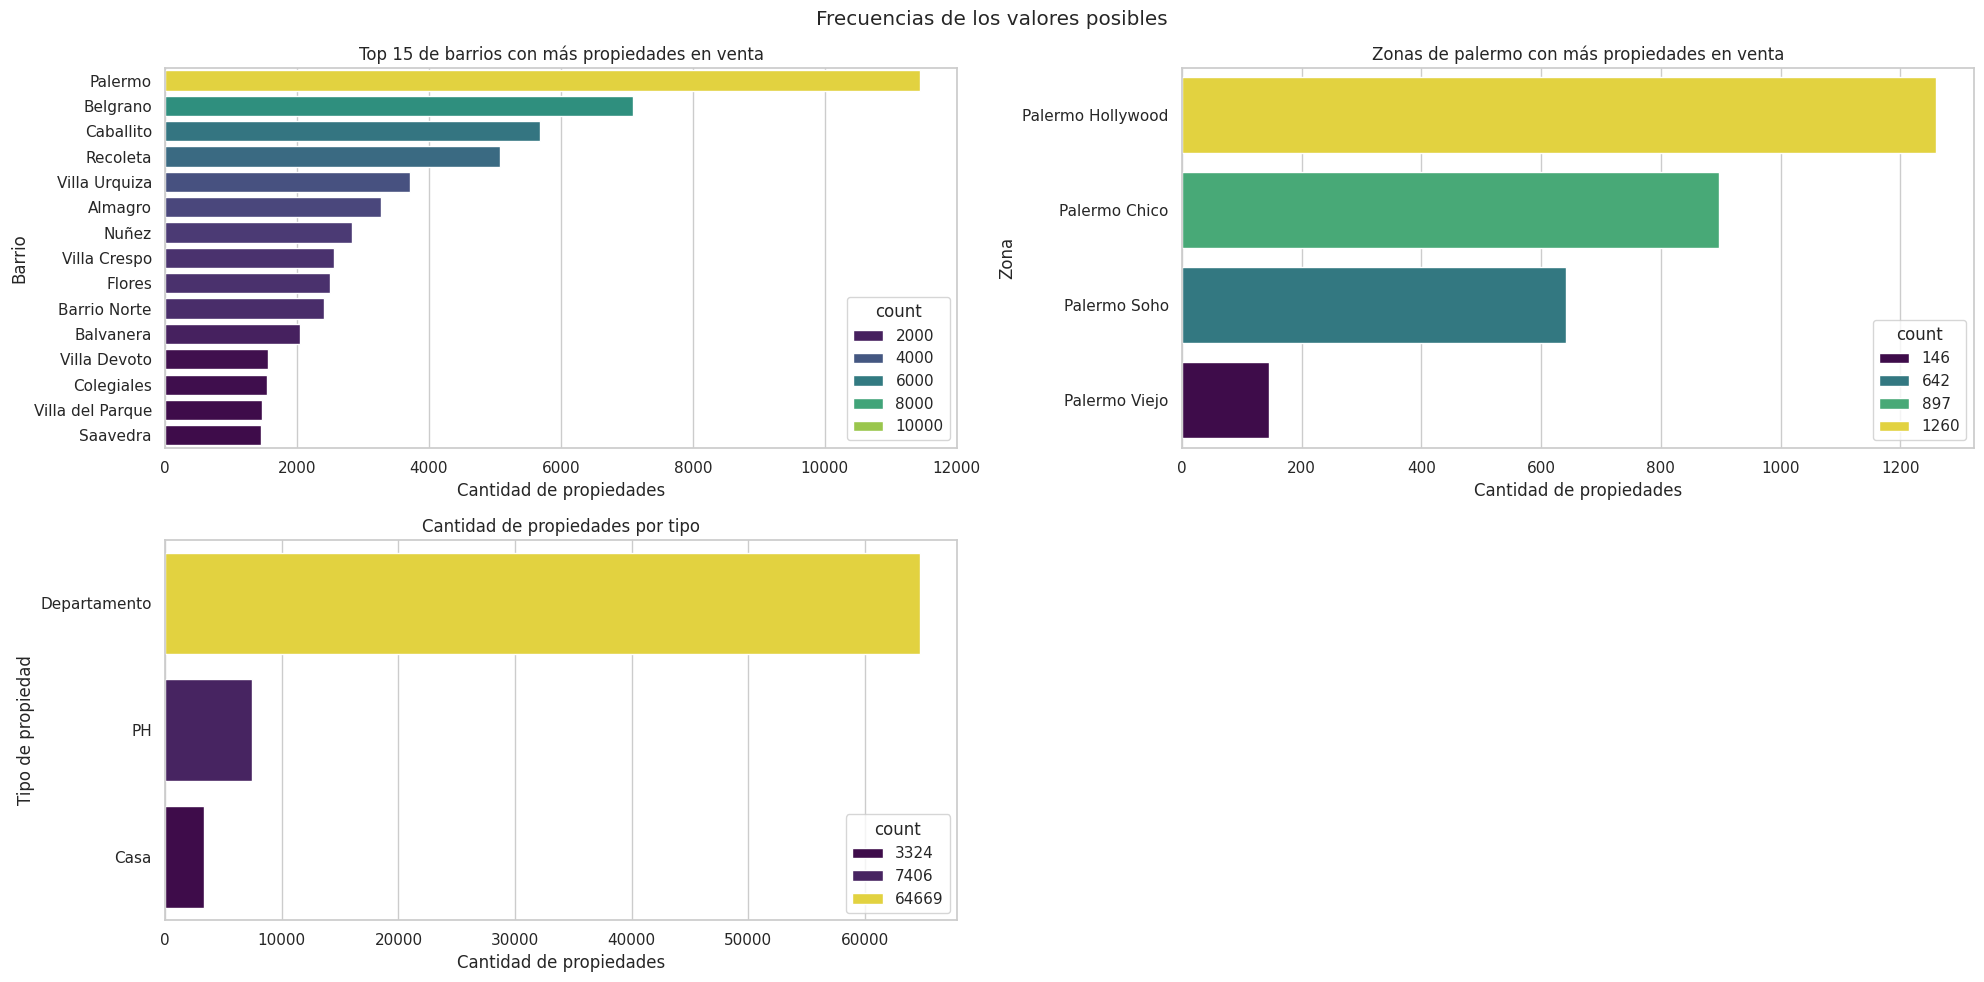

In [697]:
plt.figure(figsize=(20, 10)) # 10x10 inches
plt.suptitle('Frecuencias de los valores posibles')

# bar plot por place_l3
plt.subplot(2, 2, 1) # 2 filas, 2 columnas, 1 posicion
frecuencias_place_3 = prop_train["place_l3"].value_counts().head(15)
sns.barplot(x=frecuencias_place_3.values, y=frecuencias_place_3.index, hue=frecuencias_place_3, palette='viridis')
plt.title('Top 15 de barrios con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Barrio')

# bar plot por place_l4
plt.subplot(2, 2, 2) # 2 filas, 2 columnas, 2 posicion
frecuencias_place_4 = prop_train["place_l4"].value_counts()
sns.barplot(x=frecuencias_place_4.values, y=frecuencias_place_4.index, hue=frecuencias_place_4, palette='viridis')
# Ya que los 4 valores posibles pertenecen a Palermo
plt.title('Zonas de palermo con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Zona')

# bar plot por property_type
plt.subplot(2, 2, 3) # 2 filas, 2 columnas, 3 posicion
frecuencias_property_type = prop_train["property_type"].value_counts()
sns.barplot(x=frecuencias_property_type.values, y=frecuencias_property_type.index, hue=frecuencias_property_type, palette='viridis')
plt.title('Cantidad de propiedades por tipo')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Tipo de propiedad')

plt.tight_layout()
plt.show()

*Anotacion: todos los place_l4 que no son NaN son zonas de palermo.*

### Variables irrelevantes para el analisis

Las variables que se pueden considerar irrelevantes para el analisis que se les dara son:

* **ID**: no aporta informacion para analizar, sin embargo puede ser util para propositos de manejo de datos.
* **Place_l2**: siempre son capital federal debido al primer filtro
* **Place_l5/l6**: no tienen ningun valor en ningun registro lo que los hace innecesarios.
* **Operation**: debido a el pre-procesamiento de los datos todos los registros tendran una operacion de venta, es decir que este atributo pasa a ser redundante.
* **Property_currency**: similarmente como pasa con *operation* pasa con este otro atributo, es un atributo redundante ya que todos seran USD.
* **Property_title**: no aporta informacion relevante al analisis.
* **Latitud/Longitud**: como ya se tiene el barrio de la propiedad en place_l2 esta informacion puede o no ser relevante dependiendo si se quiere ver la ubicacion exacta o si se quiere validar el barrio.
* **Variables de fechas (start/end/created)**: estas variables podrian ser utiles si se hace un analisis por ejemplo para ver cuales son las fechas donde mas ventas empiezan/terminan/se crean, de lo contrario no es relevante.

#### En sintesis

En base a lo anterior dicho se toma la decision de dejar de contar con los atributos:

* place_l2
* place_l5/l6 (se abordara en la seccion de datos faltantes)
* operation
* property_currency
* property title

In [698]:
# Nuevo filtro para eliminar dichas columnas
columnas_a_eliminar = ['place_l2', 'operation', 'property_currency', 'property_title']
prop_train.drop(columns = columnas_a_eliminar,inplace=True)
prop_test.drop(columns = columnas_a_eliminar,inplace=True)

### Analisis grafico de distribucion de variables mas relevantes

* distribucion de precios
* distribucion de publicaciones por mes
* distribucion de habitaciones y dormitorios

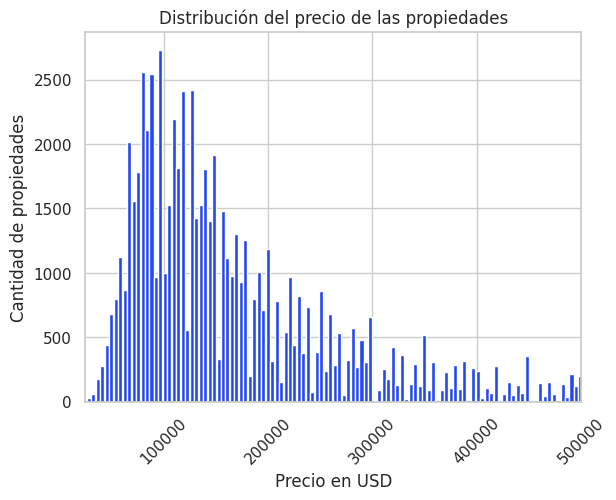

In [699]:
# plot de distribucion de property_price

plt.hist(data=prop_train,x="property_price",bins=5000, color="#2348F0",rwidth=0.9)
plt.xlim(25000,500000)
plt.xlabel("Precio en USD")
plt.ylabel("Cantidad de propiedades")
plt.title("Distribución del precio de las propiedades")
plt.xticks(rotation=45)

plt.show()

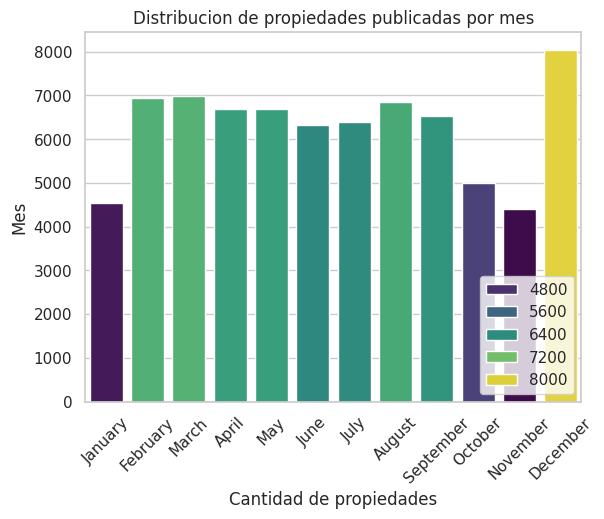

In [700]:
# bar plot distribucion de ventas por mes

prop_train["created_on"] = pd.to_datetime(prop_train["created_on"])
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
frecuencias_mes = prop_train["created_on"].dt.month_name().value_counts().reindex(meses)
sns.barplot(x=frecuencias_mes.index, y=frecuencias_mes.values, hue=frecuencias_mes, palette='viridis')
plt.legend(loc='lower right')
plt.title('Distribucion de propiedades publicadas por mes')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Mes')
plt.xticks(rotation=45)

plt.show()

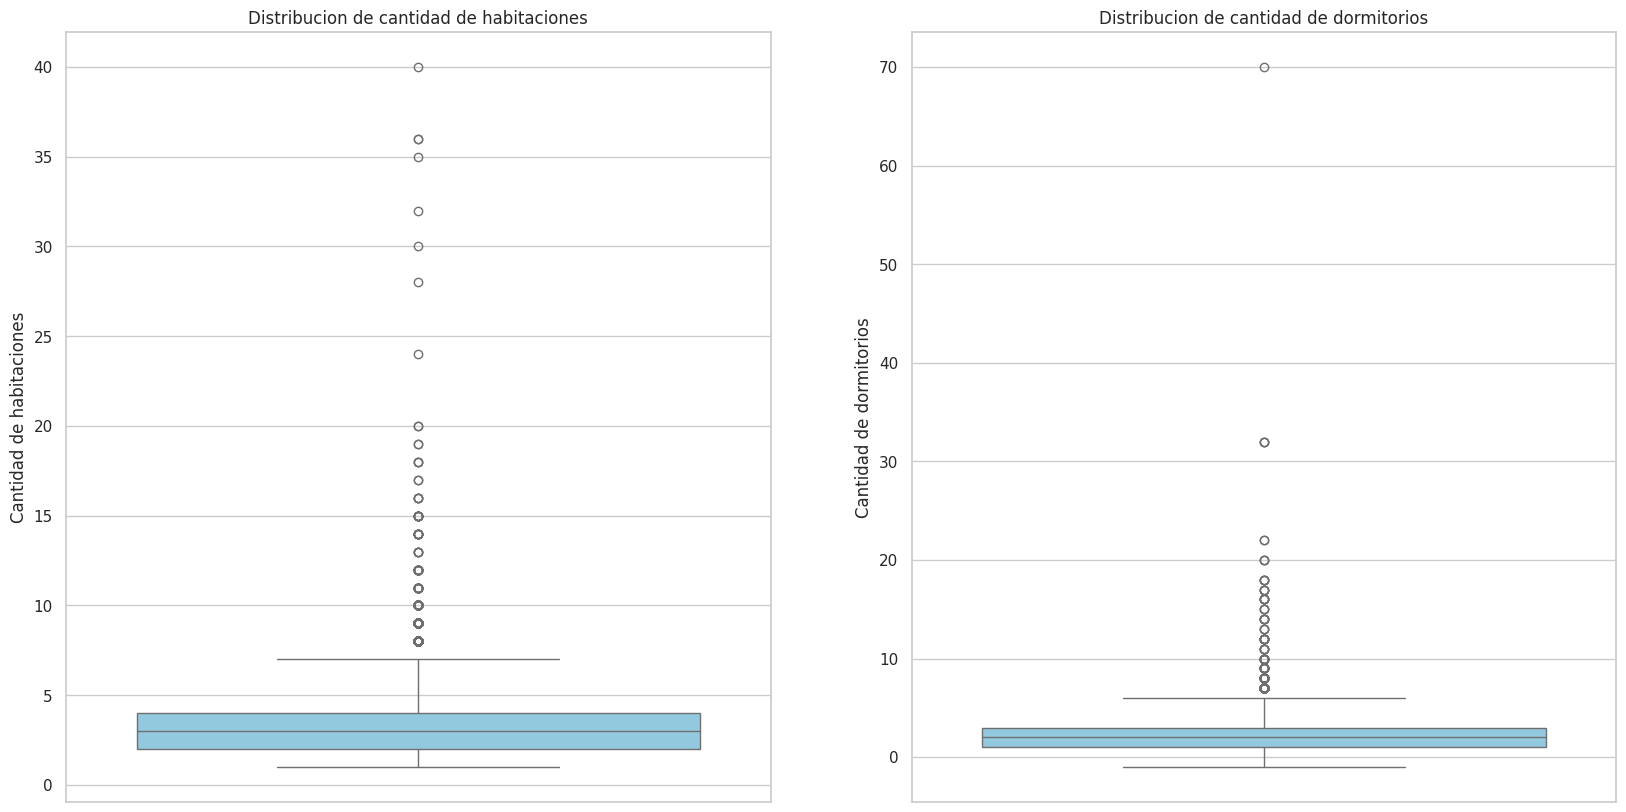

In [701]:
# Boxplot de property_rooms y property_bedrooms
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, 1 posicion
sns.boxplot(data=prop_train, y='property_rooms', color='skyblue')
plt.title('Distribucion de cantidad de habitaciones')
plt.ylabel('Cantidad de habitaciones')

plt.subplot(1, 2, 2) # 1 fila, 2 columnas, 2 posicion
sns.boxplot(data=prop_train, y='property_bedrooms', color='skyblue')
plt.title('Distribucion de cantidad de dormitorios')
plt.ylabel('Cantidad de dormitorios')

plt.show()

### Analisis de correlaciones existentes entre variables

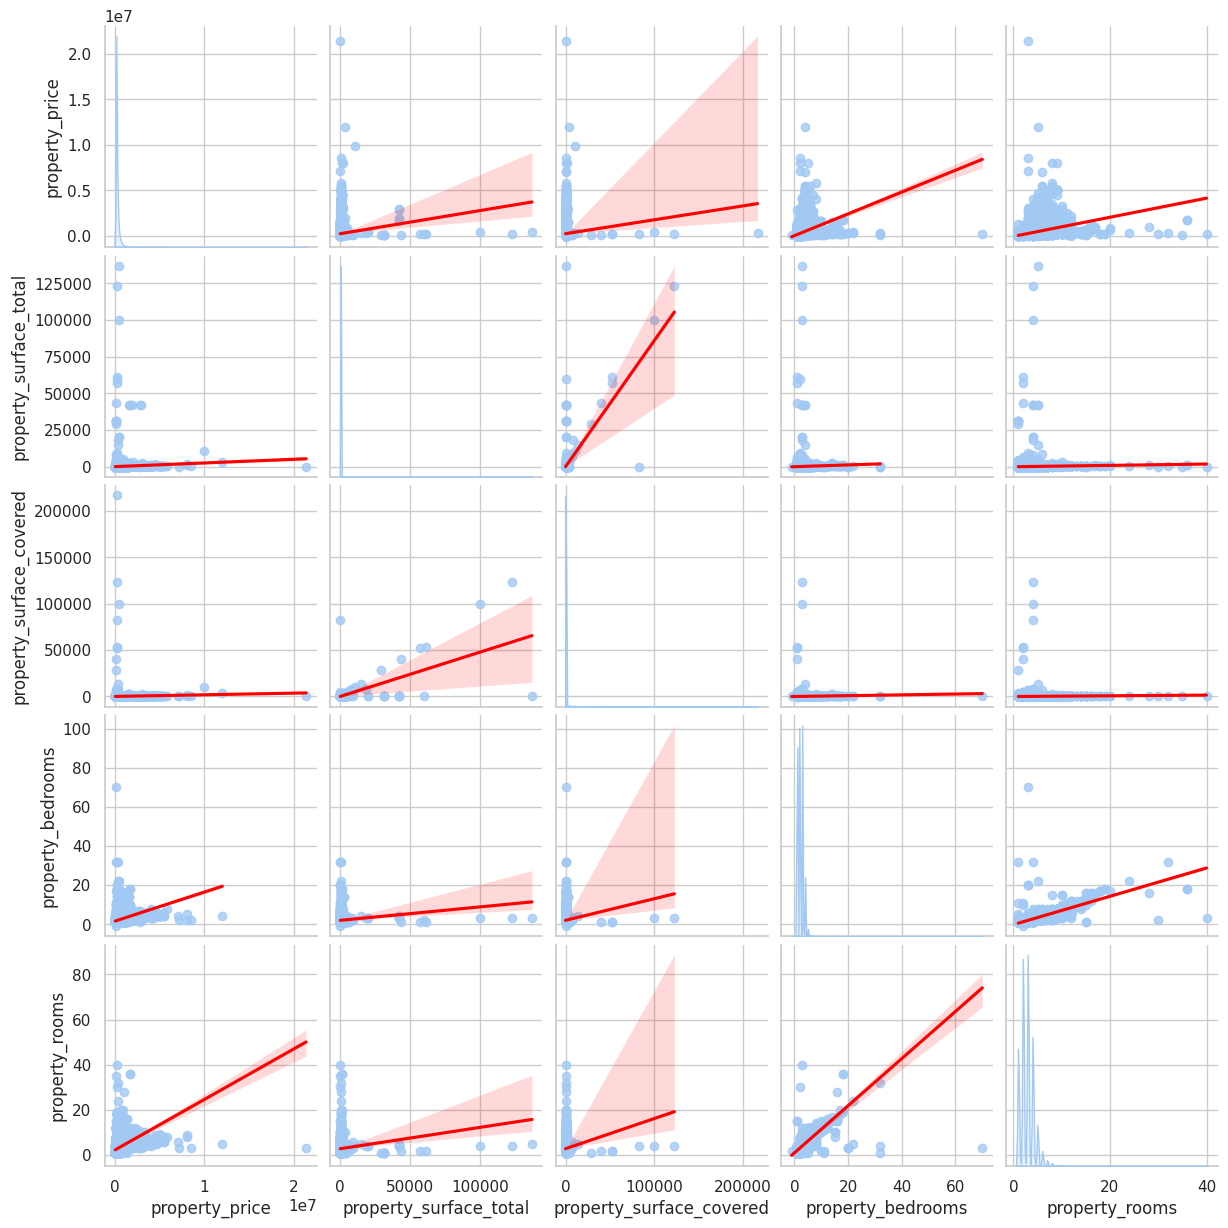

In [702]:
# pairplot con price, surface_total, surface_covered, bedrooms, rooms
sns.pairplot(prop_train[['property_price', 'property_surface_total', 'property_surface_covered', 'property_bedrooms', 'property_rooms']], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

Observando este grafico de relaciones se pueden ver que algunas de estas variables tienen claramente una relacion y otras no tanto.

* La relacion entre la **superficie total** y **superficie cubierta** es lineal y acendente, es decir da la impresion que una dependiera de la otra, y si se piensa logicamente esto tiene sentido (si hay mas espacio se cubre mas espacio) aunque no siempre es necesariamente el caso (puede haber una casa pequeña en un terreno grande)
* La relacion entre el **precio** y la cantidad de **habitaciones** y **dormitorios**, en esta se puede notar que a mas habitaciones y/o dormitorios mas aumenta el maximo precio pero no deja de haber precios mas bajos, sin embargo, pasada una cierta cantidad (aproximadamente ~15) el precio deja de aumentar y mas bien se queda constante (entre los valores hasta ~250,000 USD)
* La relacion entre **habitaciones** y **dormitorios** tambien es lineal y acendente, lo cual puede deberse a que cuando una casa tiene muchas habitaciones esta probablemente tenga tambien muchos dormitorios.

*Extra: hay ciertos valores outliers que pueden afectar a la correlacion entre variables por ejemplo una propiedad con mas de 60 habitaciones, estos seran analizados en la seccion de valores atipicos*

Para hacer un analisis mas profundo de estos datos se analiza la *covarianza* y *correlacion* entre las variables usadas en la figura anterior:

In [703]:
# covarianza y correlacion entre property_surface_total y property_surface_covered
covariance = prop_train['property_surface_total'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_surface_total'].corr(prop_train['property_surface_covered'])
print(f'Surface Total vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_rooms
covariance = prop_train['property_price'].cov(prop_train['property_rooms'])
correlation = prop_train['property_price'].corr(prop_train['property_rooms'])
print(f'Price vs Rooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_bedrooms
covariance = prop_train['property_price'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_price'].corr(prop_train['property_bedrooms'])
print(f'Price vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_total
covariance = prop_train['property_price'].cov(prop_train['property_surface_total'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_total'])
print(f'Price vs Surface Total\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_covered
covariance = prop_train['property_price'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_covered'])
print(f'Price vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre property_rooms y property_bedrooms
covariance = prop_train['property_rooms'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_rooms'].corr(prop_train['property_bedrooms'])
print(f'Rooms vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

Surface Total vs Surface Covered
Covariance: 510515.67 & Correlation: 0.64

Price vs Rooms
Covariance: 215425.48 & Correlation: 0.48

Price vs Bedrooms
Covariance: 155646.41 & Correlation: 0.42

Price vs Surface Total
Covariance: 26182808.26 & Correlation: 0.08

Price vs Surface Covered
Covariance: 18471394.38 & Correlation: 0.05

Rooms vs Bedrooms
Covariance: 1.32 & Correlation: 0.87



Esto nos dice que en efecto lo previamente observado era el caso. Tambien ahora gracias a este analisis se ve que las relaciones mas debiles son las dadas entre el precio y las superficies totales/cubiertas.

## Visualización de los datos

In [704]:
# Crear una copia del DataFrame original prop_train
visu_prop_train = prop_train.copy()

# Aplicar el filtro por la columna 'property_rooms' < 6 en la copia
visu_prop_train = visu_prop_train[visu_prop_train['property_rooms'] < 6]

# Filtrar propiedades con precios entre 20,000 y 500,000
visu_prop_train = visu_prop_train[(visu_prop_train['property_price'] > 20000) &
                             (visu_prop_train['property_price'] < 500000)]

# Crear una tabla pivote para calcular el precio promedio por barrio y cantidad de habitaciones
df_visu = visu_prop_train.pivot_table(values='property_price',
                                      index='place_l3',
                                      columns='property_rooms',
                                      aggfunc='mean')

df_visu

#Modificamos un rango para que se vea mejor la visualizacion

property_rooms                  1.0            2.0            3.0  \
place_l3                                                            
Abasto                 68810.784314   95157.610169  119771.428571   
Agronomía              72181.862069  103147.132075  173318.867925   
Almagro                76915.884808   97383.386730  140210.972035   
Balvanera              65714.364407   77605.491409  117272.443561   
Barracas               89800.441379  109086.334764  157235.419753   
Barrio Norte           95740.838961  115285.389752  196455.792642   
Belgrano              104014.864385  144082.926374  214193.408772   
Boca                   60923.051282   67956.172840   95908.434783   
Boedo                  70608.890625   90954.717105  137013.228659   
Caballito              85695.430285  110347.642981  165495.252525   
Catalinas              47000.000000            NaN  128500.000000   
Centro / Microcentro   61019.047619   85210.526316  119083.333333   
Chacarita              83071.595588  110436.948571  176472.353333   
Coghlan                86156.367470  125189.889344  198870.984211   
Colegiales             90285.923954  130593.208617  191418.350109   
Congreso               66245.080808   81571.691057  116770.806452   
Constitución           60599.518868   68912.950000   93933.840909   
Flores                 70872.140426   89743.952922  133109.984576   
Floresta               66127.064220   87491.706320  130226.372694   
Las Cañitas           110000.000000  214857.142857            NaN   
Liniers                63412.390805   86244.448485  141579.474820   
Mataderos              66224.553191   89541.592000  133783.121951   
Monserrat              74759.706960   85467.934579  118204.649351   
Monte Castro           79508.977273   97158.771930  151767.984000   
Nuñez                 102085.743590  142600.905117  210174.444444   
Once                   52065.957447   76326.315789  116556.756757   
Palermo               104841.100579  149077.534132  237937.375141   
Parque Avellaneda      72057.142857   81803.508772  112882.524272   
Parque Centenario      78540.000000   96437.260870  151042.105263   
Parque Chacabuco       77388.301724   95493.247664  142329.164751   
Parque Chas            77181.475000  111131.580247  170802.671429   
Parque Patricios       65093.421053   86557.610169  108392.124352   
Paternal               76640.262500   90047.542857  132211.132075   
Pompeya                47390.000000   58787.064516   93192.647059   
Puerto Madero         261697.320988  335886.072785  408923.404255   
Recoleta               97794.649148  126659.800735  228272.623333   
Retiro                 94819.919598  102181.466667  181452.511013   
Saavedra               93320.670695  118560.468085  187722.430556   
San Cristobal          63149.158590   78262.321168  112681.150000   
San Nicolás            59805.354839   80304.461039  114740.170507   
San Telmo              80196.113712  103219.373494  137630.621053   
Tribunales             60607.555556   91080.000000  111365.217391   
Velez Sarsfield        70508.695652   93456.415094  144977.083333   
Versalles              75234.615385  109223.392857  160465.789474   
Villa Crespo           82459.515564  105637.501295  155069.277556   
Villa Devoto           90804.024793  114216.913706  178539.417582   
Villa General Mitre    72939.071429   87907.043011  127563.478261   
Villa Lugano           65131.000000   84169.827586   89468.472222   
Villa Luro             70233.333333   94028.550898  136503.305085   
Villa Ortuzar          76939.052174  100056.836158  183470.213115   
Villa Pueyrredón       80272.873874  111781.234450  161484.421429   
Villa Real             82250.000000  108731.578947  137953.658537   
Villa Riachuelo                 NaN   89666.666667   94816.666667   
Villa Santa Rita       77338.700000   96637.804878  141065.858407   
Villa Soldati          53000.000000   67000.000000   84333.333333   
Villa Urquiza          91895.456829  124687.326792  188898.390374  

Text(70.93749999999999, 0.5, 'Zonas de Capital Federal')

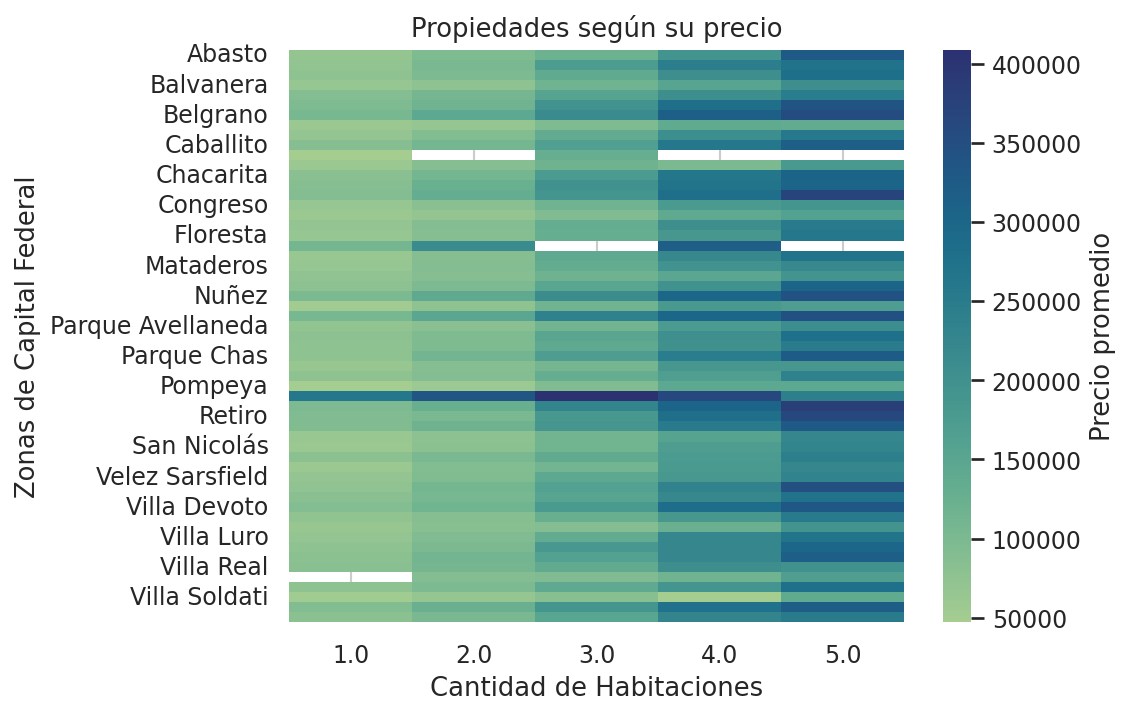

In [705]:
# Nueva figura con un dpi de 155 para mejorar la calidad de la visualización
plt.figure(dpi=155)

# Establecer el título de la visualización
plt.title("Propiedades según su precio")

# Crear un heatmap utilizando Seaborn con los datos de df_visu
sns.heatmap(df_visu, square=False, cmap='crest', fmt=".0f", cbar_kws={'label': 'Precio promedio'})

# Establecer etiquetas para los ejes x e y
plt.xlabel("Cantidad de Habitaciones")
plt.ylabel("Zonas de Capital Federal")

# Heatmap que muestra el precio promedio por propiedad tomando en cuenta la cantidad de habitaciones y su ubicación

La visualización presentada es un mapa de calor (heatmap) que muestra el precio promedio de las propiedades en función de la cantidad de habitaciones y su ubicación en diferentes zonas de la Ciudad Autónoma de Buenos Aires (CABA). Al observar el heatmap, es posible identificar patrones en los precios según la ubicación y el tamaño de la propiedad. Por ejemplo, puede haber áreas donde las propiedades con más habitaciones tienden a tener precios más altos, mientras que en otras zonas los precios son más uniformes independientemente del tamaño de la propiedad.La visualización proporciona una manera efectiva de entender cómo se relacionan el precio promedio de las propiedades, la cantidad de habitaciones y la ubicación en diferentes áreas de la Ciudad Autónoma de Buenos Aires. Ayuda a los interesados a tomar decisiones informadas sobre la compra o inversión en propiedades en la ciudad.

<ipython-input-706-ee8e753002fe>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



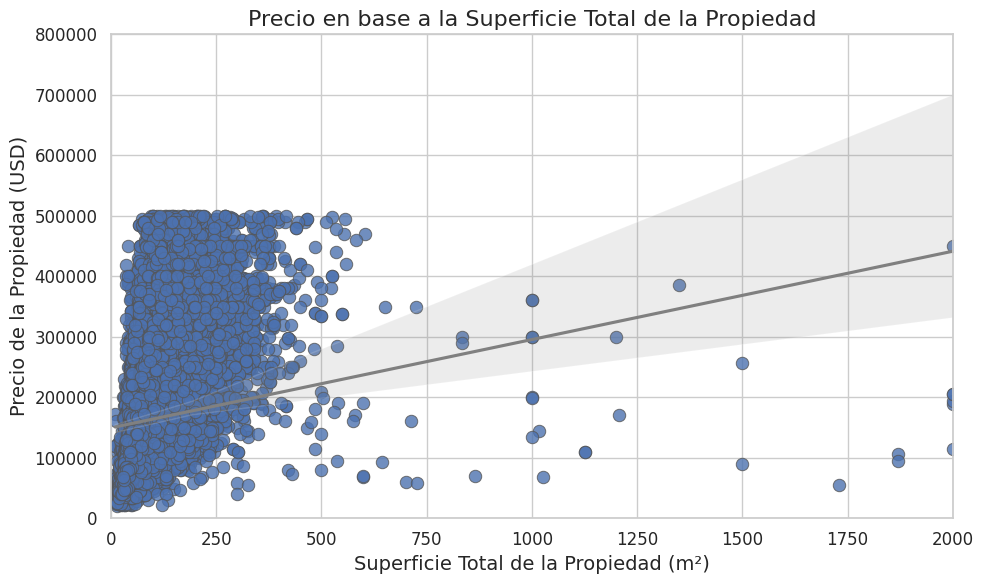

In [706]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el scatter plot utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
                x='property_surface_total', y='property_price', palette='pastel', s=80, alpha=0.8)

# Agregar una línea de regresión
sns.regplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
            x='property_surface_total', y='property_price', scatter=False, color='gray')

# Ajustar título y etiquetas
plt.title('Precio en base a la Superficie Total de la Propiedad', fontsize=16)
plt.xlabel('Superficie Total de la Propiedad (m²)', fontsize=14)
plt.ylabel('Precio de la Propiedad (USD)', fontsize=14)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el rango de los ejes
plt.xlim(0, 2000)  # Establecer el rango x hasta 20,000
plt.ylim(0, 800000)
# Añadir sombreado alrededor de las burbujas
plt.gca().collections[0].set_edgecolor("#555555")

plt.tight_layout()
plt.show()

Esta visualización muestra un diagrama de dispersión (scatter plot) que relaciona el precio de la propiedad con su superficie total, con el agregado de una línea de regresión para visualizar la tendencia general de los datos.La línea de regresión trazada en el gráfico muestra la tendencia general de los datos. Permite ver si hay una relación lineal entre el precio y la superficie total de la propiedad. En este caso, la pendiente de la línea de regresión indica la tasa de cambio en el precio para cada unidad adicional de superficie.Cada punto en el diagrama de dispersión representa una propiedad individual, y su posición relativa en el gráfico indica su precio y superficie total. Esto facilita la identificación de propiedades que pueden estar por encima o por debajo de la tendencia general.

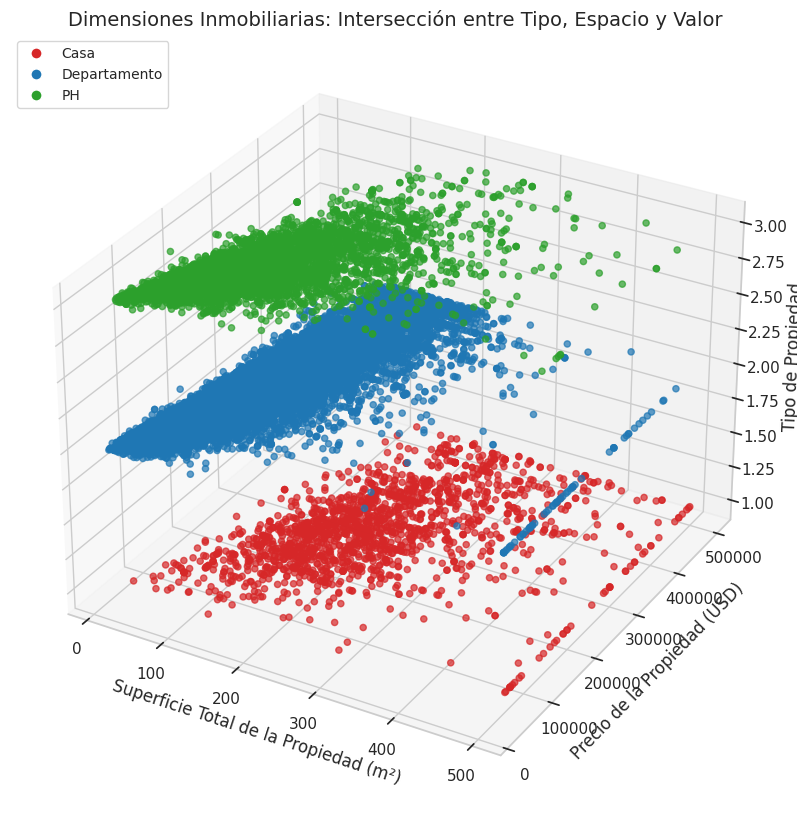

In [707]:
# Crear una figura y un conjunto de ejes tridimensionales
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Mapa de colores para los tipos de propiedad
color_mapping = {'Casa': 'tab:red', 'Departamento': 'tab:blue', 'PH': 'tab:green'}

# Asignar un valor numérico a cada tipo de propiedad
property_type_mapping = {'Casa': 1, 'Departamento': 2, 'PH': 3}
property_type_numeric = [property_type_mapping[prop_type] for prop_type in visu_prop_train['property_type']]

# Extraer las variables del dataframe
property_surface_total = visu_prop_train['property_surface_total'].clip(0, 500)
property_price = visu_prop_train['property_price']

# Graficar los puntos tridimensionales
scatter = ax.scatter(property_surface_total, property_price, property_type_numeric, c=[color_mapping[prop_type] for prop_type in visu_prop_train['property_type']], alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel('Superficie Total de la Propiedad (m²)', fontsize=12)
ax.set_ylabel('Precio de la Propiedad (USD)', fontsize=12)
ax.set_zlabel('Tipo de Propiedad', fontsize=12)

# Leyenda para los colores
legend_labels = ['Casa', 'Departamento', 'PH']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[prop_type], markersize=8, label=prop_type) for prop_type in legend_labels]
ax.legend(handles=legend_handles, labels=legend_labels, loc='upper left', fontsize=10)

# Añadir una rejilla de fondo
ax.grid(True)

# Título del gráfico
plt.title('Dimensiones Inmobiliarias: Intersección entre Tipo, Espacio y Valor', fontsize=14)

# Mostrar el gráfico
plt.show()

Este gráfico tridimensional permite visualizar la distribución de las propiedades en función de su tipo, tamaño y precio. Se pueden identificar patrones de agrupamiento o tendencias en el espacio tridimensional, lo que puede ser útil para comprender mejor el mercado inmobiliario y tomar decisiones informadas. Además, podría usarse para ajustar un modelo de regresión tridimensional para predecir el precio de una propiedad en función de su tipo y tamaño.

In [708]:
# Calcular el precio promedio por barrio
precio_promedio_por_barrio = visu_prop_train.groupby('place_l3')['property_price'].mean().reset_index()

# Crear el gráfico de burbujas agrupadas
fig = px.scatter(precio_promedio_por_barrio,
                 x='place_l3', y='property_price',
                 size='property_price',
                 color='place_l3',
                 hover_name='place_l3',
                 size_max=50,
                 title='Precio promedio por barrio',
                 labels={'place_l3': 'Barrio', 'property_price': 'Precio promedio'})
fig.show()

Esta visualización muestra un gráfico de burbujas agrupadas que representa el precio promedio de las propiedades en cada barrio.El gráfico de burbujas agrupadas proporciona una representación visual del precio promedio de las propiedades en cada barrio de interés. Cada burbuja representa un barrio, y el tamaño de la burbuja indica el precio promedio de las propiedades en ese barrio. Los colores de las burbujas pueden indicar diferentes barrios para facilitar la identificación visual, las burbujas más grandes representan barrios con precios promedio más altos, mientras que las burbujas más pequeñas representan barrios con precios promedio más bajos.El gráfico de burbujas agrupadas es interactivo, lo que permite a los usuarios explorar los datos con mayor detalle al pasar el cursor sobre las burbujas para ver información adicional, como el nombre del barrio y el precio promedio.

In [709]:
# Filtramos los Nan de latitud ya que es impresindible contar con este dato para asignarlo al mapa
visu_prop_train = visu_prop_train.dropna(subset=['latitud'])

def generar_mapa_con_registros_por_barrio(df):
    """
    Función para generar un mapa con los registros por barrio.

    Parámetros:
    - visu_prop_train: DataFrame que contiene los datos de las propiedades filtradas.

    Devuelve:
    - mapa: Objeto del mapa de Folium.
    """
    # Coordenadas del centro de la Ciudad Autónoma de Buenos Aires
    latitud_caba = -34.6037
    longitud_caba = -58.3816

    # Crear el mapa centrado en CABA
    mapa = folium.Map(location=[latitud_caba, longitud_caba], zoom_start=12)

    # Agregar un grupo de marcadores
    marker_cluster = MarkerCluster().add_to(mapa)

    # Contar la cantidad de registros por barrio
    registros_por_barrio = visu_prop_train['place_l3'].value_counts()

    # Agregar marcadores en el mapa para cada barrio
    for barrio, cantidad in registros_por_barrio.items():
        latitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['latitud'].iloc[0]
        longitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['longitud'].iloc[0]

        folium.Marker(location=[latitud, longitud],
                      tooltip=f"{barrio}: {cantidad} Propiedad en Venta").add_to(marker_cluster)

    return mapa

# Generar el mapa con los registros por barrio
mapa = generar_mapa_con_registros_por_barrio(visu_prop_train)

# Mostrar el mapa
mapa

La visualización proporciona un mapa interactivo que muestra la ubicación de las propiedades en venta en la Ciudad Autónoma de Buenos Aires (CABA), agrupadas por barrio.Cada marcador en el mapa representa una propiedad, y su ubicación específica está determinada por las coordenadas de latitud y longitud proporcionadas en los datos.Los grupos de marcadores en el mapa indican la concentración de propiedades en cada barrio, lo que puede proporcionar información sobre la popularidad y la demanda de viviendas en diferentes áreas de CABA.

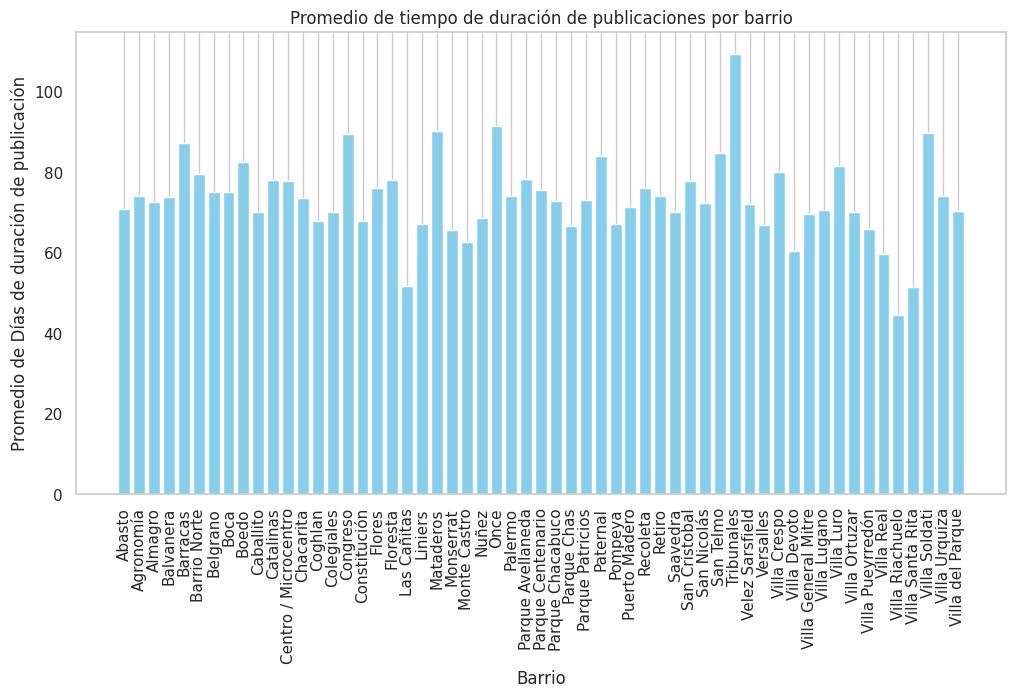

In [710]:
# Convertir las fechas a tipo datetime si no están en ese formato
visu_prop_train['start_date'] = pd.to_datetime(visu_prop_train['start_date'], errors='coerce')
visu_prop_train['end_date'] = pd.to_datetime(visu_prop_train['end_date'], errors='coerce')

# Calcular la duración de cada publicación
visu_prop_train['duracion_publicacion'] = (visu_prop_train['end_date'] - visu_prop_train['start_date']).dt.days

# Agrupar por barrio y calcular el promedio de duración de las publicaciones
promedio_duracion_por_barrio = visu_prop_train.groupby('place_l3')['duracion_publicacion'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(promedio_duracion_por_barrio['place_l3'], promedio_duracion_por_barrio['duracion_publicacion'], color='skyblue')
plt.title('Promedio de tiempo de duración de publicaciones por barrio')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Días de duración de publicación')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

Esta visualización presenta un gráfico de barras que muestra el promedio de tiempo de duración de las publicaciones por barrio en la Ciudad Autónoma de Buenos Aires (CABA). Cada barra en el gráfico representa un barrio específico, y su altura indica el promedio de días que las publicaciones permanecen activas en ese barrio.La visualización permite comparar fácilmente la duración promedio de las publicaciones entre diferentes barrios de la ciudad. Las barras más altas indican que las publicaciones en ese barrio tienden a permanecer activas por más tiempo, mientras que las barras más cortas indican una duración promedio más corta de las publicaciones.Los barrios con barras más altas pueden indicar áreas de la ciudad donde la demanda de propiedades es más alta o donde las propiedades tienden a permanecer en el mercado por períodos más prolongados. Esto puede ser útil para comprender las dinámicas del mercado inmobiliario en diferentes áreas de la ciudad.

## Datos Faltantes
En esta sección se va a realizar el análsis de la presencia de datos faltantes

### Análisis de datos faltantes a nivel columna

#### Análisis previo

In [711]:
ds_train = prop_train
ds_test = prop_test

In [712]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l3', 'place_l4', 'place_l5', 'place_l6', 'property_type',
       'property_rooms', 'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price'],
      dtype='object')

Para iniciar, vamos a analizar la cantidad de datos faltantes por columna y su porcentaje

In [713]:
def obtener_filas(ds):
  return ds.shape[0]

def obtener_columnas(ds):
  return ds.shape[1]

In [714]:
filas = obtener_filas(ds_train)
columnas = obtener_columnas(ds_train)
print("El dataset de entrenamiento tiene {} filas y {} columnas".format(filas,columnas))

El dataset de entrenamiento tiene 75399 filas y 16 columnas


Obtengo el porcentaje de cada columna que contiene datos nulos

In [715]:
def obtener_promedio_nulos(ds):
  return ds.isna().sum() / obtener_filas(ds) * 100

promedio_datos_nulos = obtener_promedio_nulos(ds_train)
promedio_datos_nulos

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.958938
longitud                      3.958938
place_l3                      0.431040
place_l4                     96.094113
place_l5                    100.000000
place_l6                    100.000000
property_type                 0.000000
property_rooms                1.127336
property_bedrooms            11.594318
property_surface_total        5.147283
property_surface_covered      3.519941
property_price                0.000000
dtype: float64

Muestro la cantidad de datos nulos por columna

In [716]:
def obtener_cantidad_nulos_ds(ds):
  return ds.isna().sum()

cant_datos_nulos = obtener_cantidad_nulos_ds(ds_train)
cant_datos_nulos

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                      2985
longitud                     2985
place_l3                      325
place_l4                    72454
place_l5                    75399
place_l6                    75399
property_type                   0
property_rooms                850
property_bedrooms            8742
property_surface_total       3881
property_surface_covered     2654
property_price                  0
dtype: int64

Grafico esta relación

<ipython-input-717-f848825aef01>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



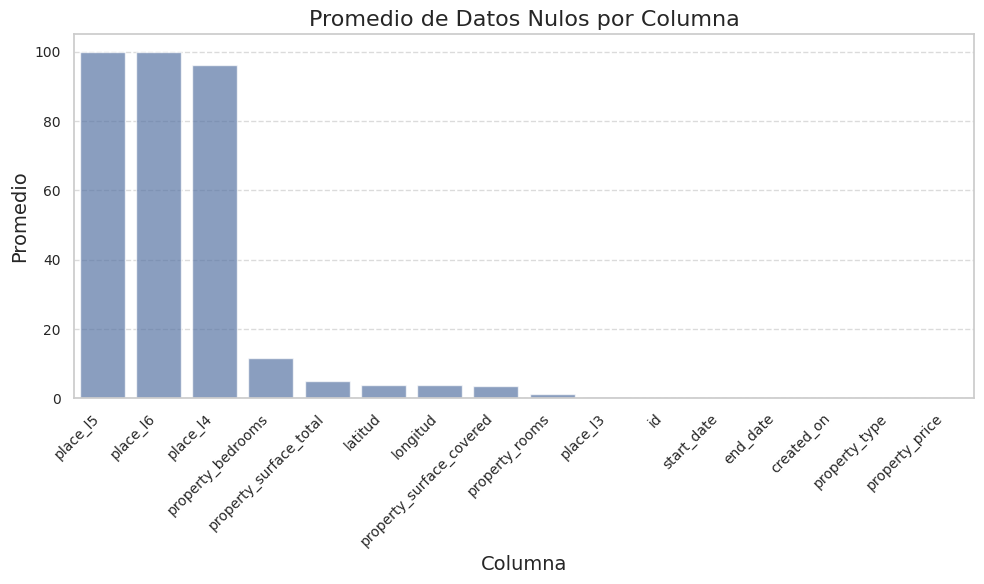

In [717]:
ds_porcentaje = promedio_datos_nulos

# Ordenar los valores en orden descendente
ds_porcentaje = ds_porcentaje.sort_values(ascending = False)

# Establecer el estilo del gráfico
sns.set_style("whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el gráfico de barras
bar_plot = sns.barplot(x=ds_porcentaje.index, y=ds_porcentaje.values, alpha=0.7)

# Agregar título y etiquetas
bar_plot.set_title("Promedio de Datos Nulos por Columna", fontsize=16)
bar_plot.set_xlabel("Columna", fontsize=14)
bar_plot.set_ylabel("Promedio", fontsize=14)

# Rotar etiquetas del eje x para una mejor legibilidad
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Agregar líneas de la cuadrícula y ajustar el tamaño de la fuente
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Entonces los datos que debo analizar son:

In [718]:
def obtener_cantidad_nulos(ds):
  promedio_datos_nulos = obtener_promedio_nulos(ds)
  promedio_datos_nulos.sort_values(ascending = False,inplace=True)
  filtro = promedio_datos_nulos!=0
  return promedio_datos_nulos[filtro] if not promedio_datos_nulos[filtro].empty else 'No existen valores NaN'

obtener_cantidad_nulos(ds_train)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.094113
property_bedrooms            11.594318
property_surface_total        5.147283
latitud                       3.958938
longitud                      3.958938
property_surface_covered      3.519941
property_rooms                1.127336
place_l3                      0.431040
dtype: float64

In [719]:
obtener_cantidad_nulos(ds_test)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.297082
property_bedrooms            11.909814
property_surface_total        5.108753
latitud                       3.952255
longitud                      3.952255
property_surface_covered      3.713528
property_rooms                1.029178
place_l3                      0.488064
dtype: float64

#### Elimino places (place_l6, place_l5, place_l4)

Al ver el gráfico y el análisis previo de nulos. Puedo eliminar las columnas ```place_l6```, ```place_l5``` y ```place_l4```, pues tienen en su totalidad de datos nulos. El ```place_l4``` tiene casi su totalidad de nulos.

Consideramos que las columnas ```place_l6```, ```place_l5``` son datos faltantes de tipo MCAR

In [720]:
columnas = ['place_l6','place_l5','place_l4']
ds_train.drop(columns=columnas, inplace=True)
ds_test.drop(columns=columnas, inplace=True)

In [721]:
ds_train.head()

id  start_date    end_date created_on  \
385730  qgnjg2cQkLeAALjoJhJl1g==  2021-02-10  2021-03-25 2021-02-10   
202765  nKtgSc3TcPeN26qcnF/A0Q==  2021-07-24  2021-07-28 2021-07-24   
365078  1RRkxV0svMP4wqr5D6tVQA==  2021-04-10  2021-04-25 2021-04-10   
12474   +H3z0pX0X4BUkNd++UJXaQ==  2021-07-06  2021-07-18 2021-07-06   
456343  jbTXXcCVj41WMxktWLRiBA==  2021-12-16  2022-02-09 2021-12-16   

          latitud   longitud          place_l3 property_type  property_rooms  \
385730 -34.623053 -58.447006         Caballito  Departamento             4.0   
202765 -34.604148 -58.414662           Almagro  Departamento             1.0   
365078 -34.617325 -58.417246           Almagro  Departamento             3.0   
12474  -34.597222 -58.398366          Recoleta  Departamento             1.0   
456343 -34.585957 -58.497433  Villa Pueyrredón  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
385730                5.0                   145.0                     135.0   
202765                NaN                    25.0                      23.0   
365078                2.0                    55.0                      51.0   
12474                 NaN                    36.0                      36.0   
456343                2.0                    64.0                      57.0   

        property_price  
385730        299000.0  
202765         44900.0  
365078        148900.0  
12474          67900.0  
456343        150000.0

In [722]:
ds_test.head()

id  start_date    end_date  created_on  \
143595  0Irfs6zKoLs+JEw9FeBUUw==  2021-06-08  2021-06-18  2021-06-08   
55201   413o8+6jQAleCNv/sDCWCA==  2021-01-11  2021-04-07  2021-01-11   
103890  VacndUMW+OWE44aKMZsB4Q==  2021-05-28  2021-06-08  2021-05-28   
78299   +SVYFISB3v2jKg9YZEUKdQ==  2021-06-21  2021-07-16  2021-06-21   
357641  yO6laL4zRYAWQx6JAmkcog==  2021-06-29  2021-11-03  2021-06-29   

          latitud   longitud      place_l3 property_type  property_rooms  \
143595 -34.611826 -58.516024  Villa Devoto  Departamento             3.0   
55201  -34.609708 -58.390333      Congreso  Departamento             3.0   
103890 -34.618497 -58.380279     Monserrat  Departamento             4.0   
78299  -34.619026 -58.433734     Caballito  Departamento             4.0   
357641 -34.618506 -58.511219  Villa Devoto          Casa             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
143595                2.0                    84.0                      62.0   
55201                 2.0                   120.0                     105.0   
103890                3.0                   100.0                     100.0   
78299                 3.0                   183.0                     137.0   
357641                3.0                   146.0                     105.0   

        property_price  
143595        204700.0  
55201         120000.0  
103890        210000.0  
78299         419900.0  
357641        315000.0

In [723]:
nulos_preimputacion = obtener_cantidad_nulos(ds_train)

In [724]:
obtener_cantidad_nulos(ds_test)

property_bedrooms           11.909814
property_surface_total       5.108753
latitud                      3.952255
longitud                     3.952255
property_surface_covered     3.713528
property_rooms               1.029178
place_l3                     0.488064
dtype: float64

#### Generar funciones para análisis

In [725]:
# establezco si son o no nulos
def generar_ds_nulo(columnas):
  return ds_train[columnas].isna()

def filtrar_nulo(columna,ds):
  return ds[columna]==True

def filtrar_no_nulo(columna,ds):
  return ds[columna]==False

def aplicar_filtro(ds,filtro,columna,nulidad):
  ds.loc[filtro,columna] = nulidad
  return ds

In [726]:
def contar_ds(ds,columna):
  return ds[columna].value_counts()

def imprimir_cantidades(nulos,no_nulos,columna):
  print("Cantidad de datos NULOS en {}: {}".format(columna,nulos))
  print("Cantidad de datos NO NULOS en {}: {}".format(columna,no_nulos))

In [727]:
def generar_grafico(ds, columna):
  # Ajustar el tamaño de la figura
  plt.figure(figsize=(10, 6))

  # Agrupar por 'longitud' y obtener el tamaño de cada grupo, luego trazar el gráfico de barras horizontales
  ds.groupby(columna).size().plot(kind='barh', color=sns.color_palette('Dark2'))

  # Ocultar los ejes superior y derecho
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  titulo = 'Tamaño de Grupo por ' + columna
  # Configurar el tamaño de la letra del título y las etiquetas
  plt.title(titulo, fontsize=16)
  plt.xlabel('Cantidad', fontsize=14)
  plt.ylabel(columna, fontsize=14)

  # Mostrar el gráfico
  plt.show()

#### Latitud y longitud
Vamos a anlizar los nulos de estas dos variables

In [728]:
latatitud_longitud = generar_ds_nulo(['latitud','longitud'])
# filtros latitud
v_filtro_latitud = filtrar_nulo('latitud',latatitud_longitud)
f_filtro_latitud = filtrar_no_nulo('latitud',latatitud_longitud)
# filtros longitud
v_filtro_longitud = filtrar_nulo('longitud',latatitud_longitud)
f_filtro_longitud = filtrar_no_nulo('longitud',latatitud_longitud)
# aplico los filtros
latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_latitud,'latitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_latitud,'latitud','no nulo')

latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_longitud,'longitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_longitud,'longitud','no nulo')

latatitud_longitud.head()



latitud longitud
385730  no nulo  no nulo
202765  no nulo  no nulo
365078  no nulo  no nulo
12474   no nulo  no nulo
456343  no nulo  no nulo

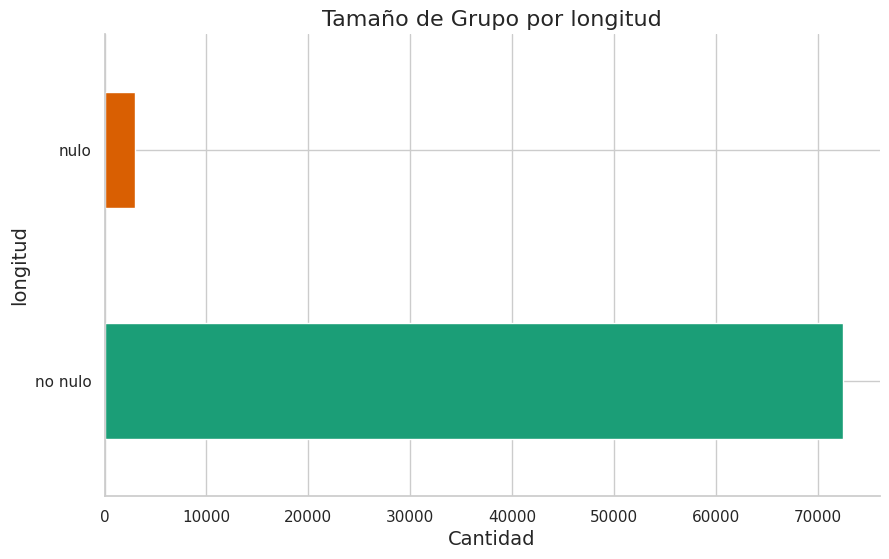

In [729]:
generar_grafico(latatitud_longitud,'longitud')

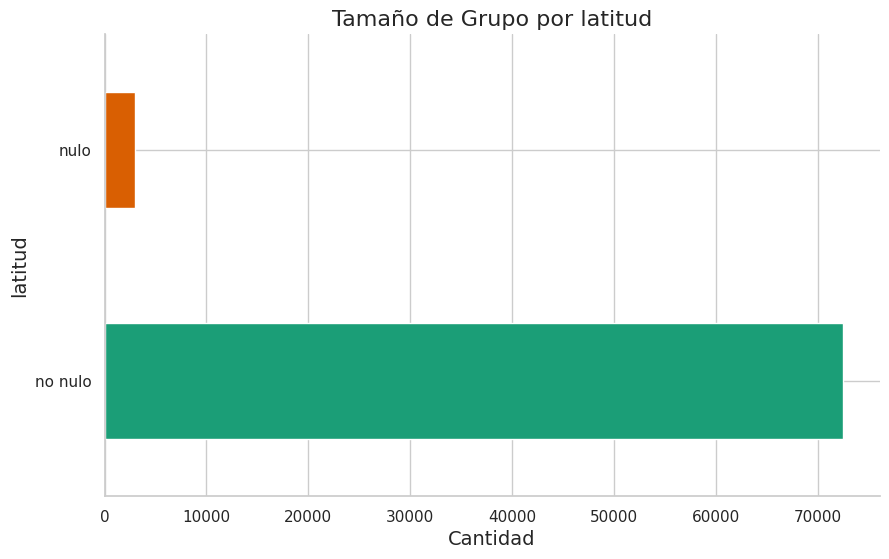

In [730]:
generar_grafico(latatitud_longitud,'latitud')

In [731]:
imprimir_cantidades(latatitud_longitud.value_counts()[1], latatitud_longitud.value_counts()[0], 'longitud')

Cantidad de datos NULOS en longitud: 2985
Cantidad de datos NO NULOS en longitud: 72414


In [732]:
imprimir_cantidades(latatitud_longitud.value_counts()[1], latatitud_longitud.value_counts()[0], 'latitud')

Cantidad de datos NULOS en latitud: 2985
Cantidad de datos NO NULOS en latitud: 72414


#### Superficie total y Superficie cubierta (property_surface_total, property_surface_covered)

In [733]:
# establezco si son o no nulos
sup_total_cubierta = generar_ds_nulo(['property_surface_total','property_surface_covered'])
# creo filtro si son o no nulos
v_filtro_total =  filtrar_nulo('property_surface_total',sup_total_cubierta)
f_filtro_total =  filtrar_no_nulo('property_surface_total',sup_total_cubierta)

v_filtro_cubierto =  filtrar_nulo('property_surface_covered',sup_total_cubierta)
f_filtro_cubierto =  filtrar_no_nulo('property_surface_covered',sup_total_cubierta)
# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_total,'property_surface_total','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_total,'property_surface_total','no nulo')

# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_cubierto,'property_surface_covered','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_cubierto,'property_surface_covered','no nulo')

sup_total_cubierta.head()

property_surface_total property_surface_covered
385730                no nulo                  no nulo
202765                no nulo                  no nulo
365078                no nulo                  no nulo
12474                 no nulo                  no nulo
456343                no nulo                  no nulo

In [734]:
imprimir_cantidades(sup_total_cubierta.value_counts()[1], sup_total_cubierta.value_counts()[0], 'property_surface_total')

Cantidad de datos NULOS en property_surface_total: 3881
Cantidad de datos NO NULOS en property_surface_total: 68864


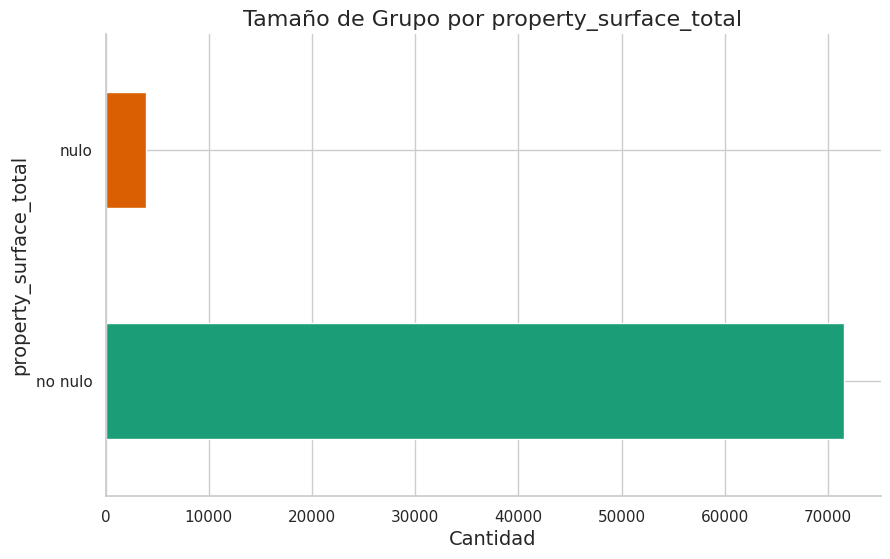

In [735]:
generar_grafico(sup_total_cubierta,'property_surface_total')

In [736]:
imprimir_cantidades(sup_total_cubierta.value_counts()[1], sup_total_cubierta.value_counts()[0], 'property_surface_covered')

Cantidad de datos NULOS en property_surface_covered: 3881
Cantidad de datos NO NULOS en property_surface_covered: 68864


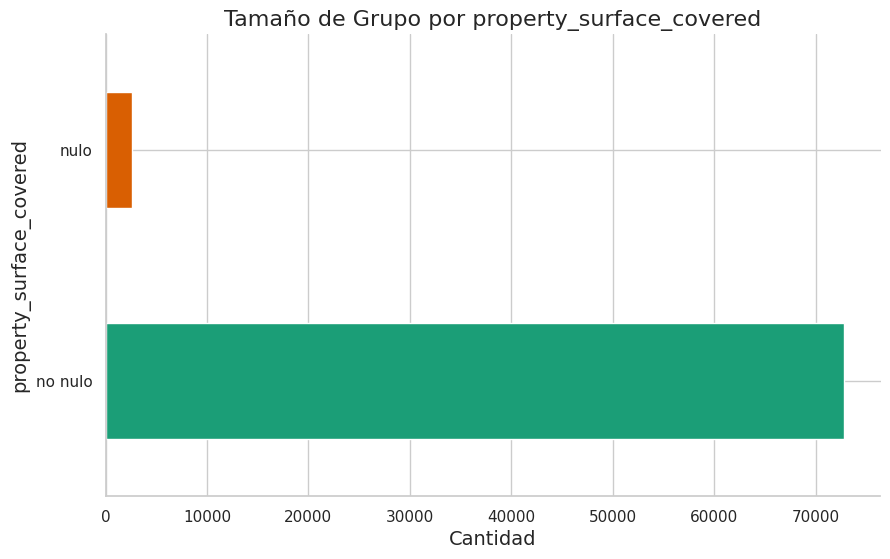

In [737]:
generar_grafico(sup_total_cubierta,'property_surface_covered')

#### Habitaciones y dormitorios (property_rooms, property_bedrooms)

In [738]:
# establezco si son o no nulos
habitaciones_dormis = generar_ds_nulo(['property_rooms','property_bedrooms'])
# creo filtro si son o no nulos
v_filtro_hab = filtrar_nulo('property_rooms',habitaciones_dormis)
f_filtro_hab =  filtrar_no_nulo('property_rooms',habitaciones_dormis)

v_filtro_dormis =  filtrar_nulo('property_bedrooms',habitaciones_dormis)
f_filtro_dormis =  filtrar_no_nulo('property_bedrooms',habitaciones_dormis)

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_hab,'property_rooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_hab,'property_rooms','no nulo')

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_dormis,'property_bedrooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_dormis,'property_bedrooms','no nulo')

habitaciones_dormis.head()

property_rooms property_bedrooms
385730        no nulo           no nulo
202765        no nulo              nulo
365078        no nulo           no nulo
12474         no nulo              nulo
456343        no nulo           no nulo

In [739]:
imprimir_cantidades(habitaciones_dormis.value_counts()[1], habitaciones_dormis.value_counts()[0], 'property_rooms')

Cantidad de datos NULOS en property_rooms: 8399
Cantidad de datos NO NULOS en property_rooms: 66150


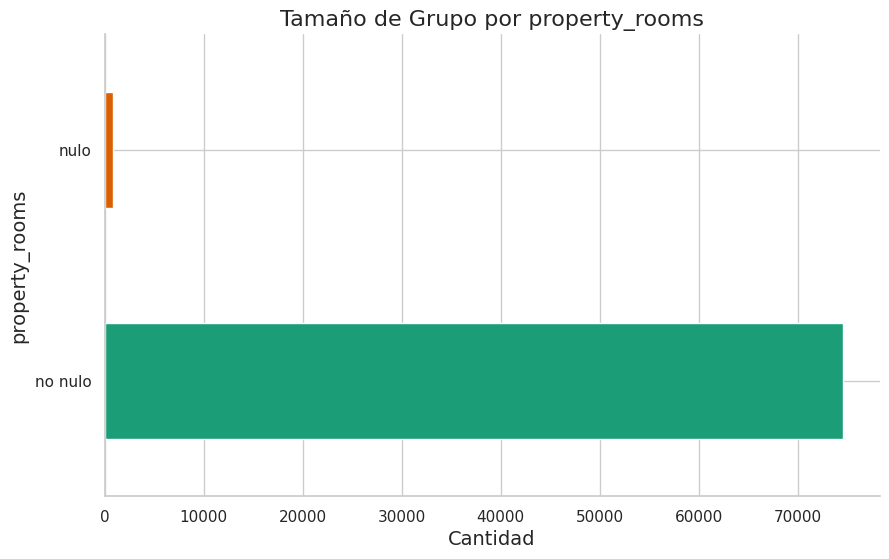

In [740]:
generar_grafico(habitaciones_dormis,'property_rooms')

In [741]:
imprimir_cantidades(habitaciones_dormis.value_counts()[1], habitaciones_dormis.value_counts()[0], 'property_bedrooms')

Cantidad de datos NULOS en property_bedrooms: 8399
Cantidad de datos NO NULOS en property_bedrooms: 66150


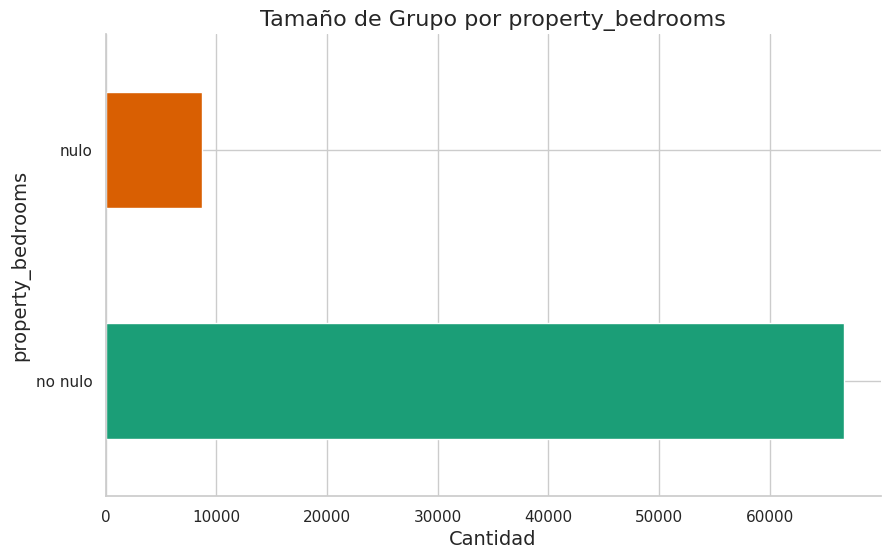

In [742]:
generar_grafico(habitaciones_dormis,'property_bedrooms')

#### Barrio (place_l3)

In [743]:
# establezco si son o no nulos
barrio = generar_ds_nulo('place_l3')
# creo filtro si son o no nulos
v_filtro_barrio =  barrio == True
f_filtro_barrio =  barrio == False
# establezco los nulos y no nulos
barrio.loc[v_filtro_barrio] = 'nulo'
barrio.loc[f_filtro_barrio] = 'no nulo'

barrio.head()

385730    no nulo
202765    no nulo
365078    no nulo
12474     no nulo
456343    no nulo
Name: place_l3, dtype: object

In [744]:
imprimir_cantidades(barrio.value_counts()[1], barrio.value_counts()[0], 'place_l3')

Cantidad de datos NULOS en place_l3: 325
Cantidad de datos NO NULOS en place_l3: 75074


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable place_l3'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

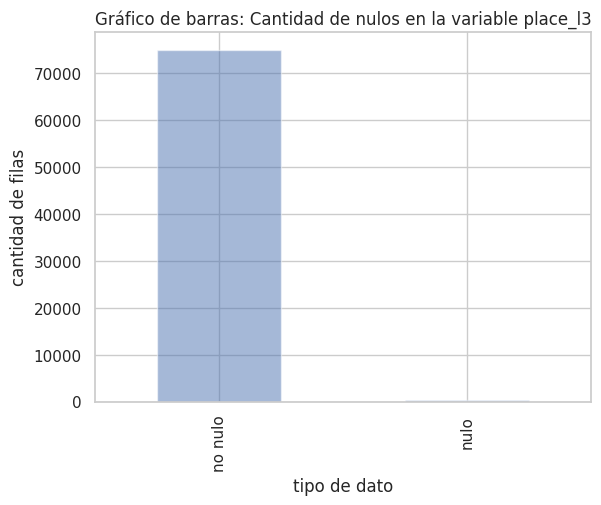

In [745]:
barrio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable place_l3", xlabel="tipo de dato" , ylabel="cantidad de filas")

#### Precio

In [746]:
precio = generar_ds_nulo('property_price')
# creo filtro si son o no nulos
v_filtro_precio =  precio == True
f_filtro_precio =  precio == False
# establezco los nulos y no nulos
precio.loc[v_filtro_precio] = 'nulo'
precio.loc[f_filtro_precio] = 'no nulo'

precio.head()

385730    no nulo
202765    no nulo
365078    no nulo
12474     no nulo
456343    no nulo
Name: property_price, dtype: object

In [747]:
print("Cantidad de datos NO NULOS en property_price: {}".format(precio.value_counts()))

Cantidad de datos NO NULOS en property_price: property_price
no nulo    75399
Name: count, dtype: int64


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_price'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

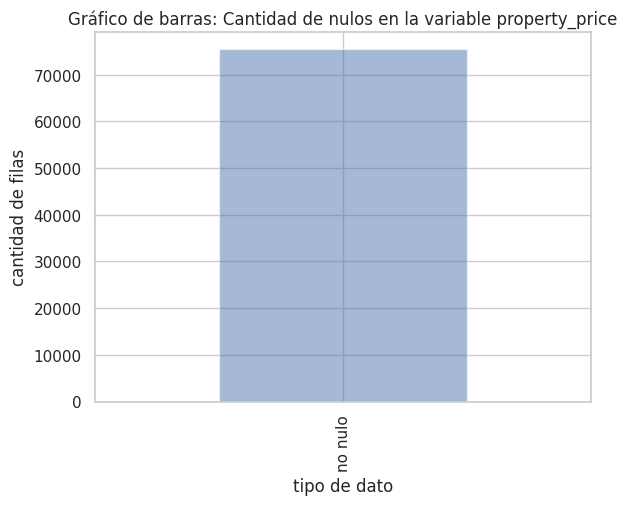

In [748]:
precio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_price", xlabel="tipo de dato" , ylabel="cantidad de filas")

### Análisis de datos faltantes a nivel fila

Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos
faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de
faltantes por fila en el dataset.


In [749]:
# Calcular la cantidad de filas nulas
cantidad_filas_nulas = ds_train.isna().sum(axis=1)
filtro = cantidad_filas_nulas > 0
cantidad_filas_nulas = cantidad_filas_nulas[filtro]
print("La cantidad de filas que tienen al menos un dato nulo es: ",len(cantidad_filas_nulas))

La cantidad de filas que tienen al menos un dato nulo es:  17049


<Axes: title={'center': 'Gráfico de barras: Cantidad de filas nulas en ds_train'}, xlabel='cantidad de nulos', ylabel='cantidad de filas'>

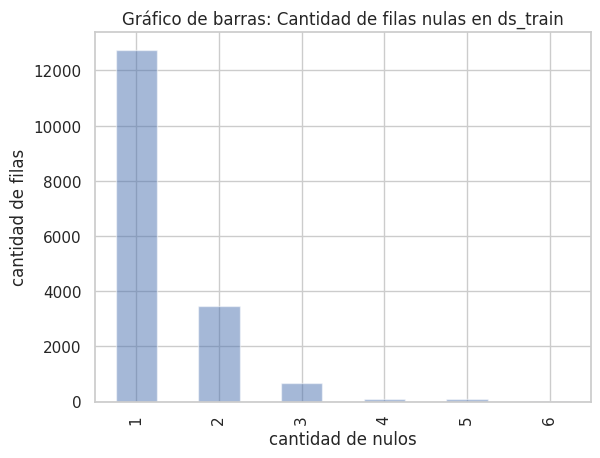

In [750]:
cantidad_filas_nulas.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de filas nulas en ds_train", xlabel="cantidad de nulos" , ylabel="cantidad de filas")

### Revisión de datos faltantes o mal ingresados

Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de
valores, eliminación de registros incompletos, etc.

Recordemos los datos nulos que tenemos en ds_train

In [751]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.594318
property_surface_total       5.147283
latitud                      3.958938
longitud                     3.958938
property_surface_covered     3.519941
property_rooms               1.127336
place_l3                     0.431040
dtype: float64

Veremos unas de las estrategias para para trabajar con datos faltantes. Procederemos a imputar datos

#### Imputación Cold Deck
Vamos a trabajar con los datos ```latitud``` y ```longitud``` para completar la variable ```place_l3```.
Para ello vamos a utilizar el csv ```barrios.csv``` provisto por [GCBA](https://data.buenosaires.gob.ar/dataset/barrios/resource/juqdkmgo-191-resource) que nos da la localización y límites geográficos de los barrios de la Ciudad.

Antes de imputar vamos a hacer una copia para analizar la imputación en el siguiente punto.

In [752]:
ds_pre_imputacion = ds_train.copy()

Para ello vamos a usar Geopandas correspondiente a la documentación wkt

In [753]:
ds_barrios = pd.read_csv(barrios_file, header=0,sep=';')
def completar_barrios(ds):
  for index, propiedad in ds.iterrows():
    if isinstance(propiedad["place_l3"], str):
      continue

    for index,barrio in ds_barrios.iterrows():
      barrio_aux = barrio['BARRIO']
      if barrio_aux == '' or barrio_aux is None:
        continue
      coordenada = Point(propiedad['longitud'],propiedad['latitud'])
      # uso wkt Para deserializar una cadena y obtener un nuevo objeto geométrico del tipo apropiado
      # uso covers para ver si está cubierta la coordenada de ds_barrios por lo que tiene mi ds
      if wkt.loads(barrio['WKT']).covers(coordenada):
        ds.loc[index,'place_l3'] = barrio_aux

  return

completar_barrios(ds_train)
completar_barrios(ds_test)

Visualizamos el dataset para ver si podemos ver algún nulo rápido.

In [754]:
# Ordenar el DataFrame por 'place_l3'
ds_train_sorted = ds_train.sort_values(by='place_l3')

# Extraer la columna 'place_l3'
place_l3_column = ds_train_sorted['place_l3']

# Elimino la columna 'place_l3' del DataFrame
ds_train_sorted.drop(columns=['place_l3'], inplace=True)

# Inserto la columna 'place_l3' en la primera posición
ds_train_sorted.insert(0, 'place_l3', place_l3_column)

# Ahora ds_train_sorted tiene 'place_l3' como la primera columna
# para visualizarlo mejor
ds_train_sorted

place_l3                        id  start_date    end_date created_on  \
4       ALMAGRO                       NaN         NaN         NaN        NaT   
255581   Abasto  j8nH8SYyneMiiFOaNfQ6xw==  2021-11-03  2022-01-27 2021-11-03   
208108   Abasto  lM2OtqFKnMmRvXp0sJBvCg==  2021-02-01  2021-02-23 2021-02-01   
166970   Abasto  yTd4STZJdLQK3lY7+/qaBQ==  2021-04-30  2021-06-05 2021-04-30   
17447    Abasto  iEXx0uWddgU7AI6bykkdug==  2021-08-28  2022-01-27 2021-08-28   
...         ...                       ...         ...         ...        ...   
241085      NaN  j/qJT+DHmdmfygjem/H1sw==  2021-04-11  2021-04-12 2021-04-11   
84656       NaN  uMiS8fNvUsWxMiZxFL/VqA==  2021-03-26  2021-04-05 2021-03-26   
241662      NaN  MKUbLxaAzotEHRijSe9a0w==  2021-04-01  2021-04-19 2021-04-01   
318281      NaN  bv4GZQnngc8/BdnPLZupdQ==  2021-03-17  2021-11-04 2021-03-17   
25          NaN  CyZu6IaZgmQYGk8jmPajCg==  2021-09-09  2021-09-26 2021-09-09   

          latitud   longitud property_type  property_rooms  property_bedrooms  \
4             NaN        NaN           NaN             NaN                NaN   
255581 -34.595596 -58.412708  Departamento             2.0                1.0   
208108 -34.602874 -58.410708  Departamento             3.0                2.0   
166970 -34.603385 -58.408605  Departamento             1.0                1.0   
17447  -34.604270 -58.409539  Departamento             1.0                NaN   
...           ...        ...           ...             ...                ...   
241085        NaN        NaN          Casa             NaN                2.0   
84656  -31.212801 -69.796143  Departamento             1.0                1.0   
241662 -26.616670 -54.133330          Casa             4.0                3.0   
318281        NaN        NaN          Casa             3.0                NaN   
25            NaN        NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  
4                          NaN                       NaN             NaN  
255581                     NaN                      34.0         85000.0  
208108                    69.0                      58.0        185000.0  
166970                    37.0                      37.0         95000.0  
17447                     33.0                      30.0         62000.0  
...                        ...                       ...             ...  
241085                   131.0                      85.0        100000.0  
84656                     31.0                      31.0         50000.0  
241662                   230.0                     200.0        255000.0  
318281                   150.0                     110.0        220000.0  
25                       171.0                     133.0        210000.0  

[75418 rows x 13 columns]

Vemos que hay datos NaN en el barrio

In [755]:
ds_train['place_l3'].isna().value_counts()

place_l3
False    75093
True       325
Name: count, dtype: int64

Estos datos en NaN pueden ser datos mal ingresados. Se ingresó mal la coordenada de la propiedad y se la clasificó como Capital Federal. Lo mismo puede suceder de que no tengan latitud ni longitud. Procedo a eliminar dichos datos

In [756]:
columnas_a_eliminar = ['latitud','longitud','place_l3']
ds_train = ds_train.dropna(subset=columnas_a_eliminar)
ds_test =  ds_test.dropna(subset=columnas_a_eliminar)

Verifico mis datos_nulos en mi dataset

In [757]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.480630
property_surface_total       5.049428
property_surface_covered     3.487664
property_rooms               0.989948
dtype: float64

#### Análisis de property's
Ahora vamos a seguir con el análisis de las siguientes variables:
*     property_bedrooms
*     property_rooms
*     property_surface_total
*     property_surface_covered

Podemos identificar que estas variables son tipos de datos faltantes MAR.

##### Análisis de ceros

Para empezar verifico si alguno de estos datos es negativo. Pues valores negativos para alguno de estos atributos no tiene sentido.

In [758]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                          True
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Vemos que existen valores menores o iguales que 0 en el atributo ```property_bedrooms```. Procedo a ver cuantos registros cumplen con esta condición.

In [759]:
filtro = ds_propiedades_filtradas['property_bedrooms'] < 1
ds_propiedades_filtradas[filtro]

id  start_date    end_date  created_on  \
406880  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18  2021-01-07   

          latitud   longitud         place_l2       place_l3 place_l4  \
406880 -34.577595 -58.495185  Capital Federal  Villa Urquiza      NaN   

       place_l5  place_l6 operation property_type  property_rooms  \
406880      NaN       NaN     Venta  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
406880               -1.0                    61.0                      43.0   

        property_price property_currency  \
406880        125000.0               USD   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...

Como hay un registro, procederemos a asignarlo nulo.

In [760]:
ds_train.loc[ds_train['property_bedrooms'] < 1,'property_bedrooms'] = np.nan

Se verifica si hay valores menores o iguales que cero.

In [761]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Se realiza el mismo análisis con ds_test

In [762]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_test[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

##### Análisis de duplicados

Verificamos si hay datos duplicados en estas columnas

In [763]:
ds_train[ds_train.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [764]:
ds_test[ds_test.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Procederemos a eliminar filas duplicadas

In [765]:
size_antes = len(ds_train)
ds_train_filtrado = ds_train.drop_duplicates()
size_despues = len(ds_train_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_train")

Se eliminaron: 0 filas duplicadas de ds_train


In [766]:
ds_train_filtrado.reset_index(drop=True, inplace=True)

In [767]:
size_antes = len(ds_test)
ds_test_filtrado = ds_test.drop_duplicates()
size_despues = len(ds_test_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_test")

Se eliminaron: 0 filas duplicadas de ds_test


In [768]:
ds_test_filtrado.reset_index(drop=True, inplace=True)

##### Completacion de las columnas de forma multivariada

Como las variables faltantes son datos de tipo MAR (Missing At Random), elijiremos el proceso de imputación de datos MICE (Multivariate Imputation by Chained Equations)

In [769]:
# la variable columnas_con_numeros tiene las columnas a analizar
lr = LinearRegression()
imp = IterativeImputer(
    estimator=lr,
    missing_values = np.nan,
    max_iter = 20,
    verbose = 0,
    random_state = 0,
    min_value = 1
)


def rellenar_variables(ds,columnas):
  df_eliminar_nans_op3_completo = ds[columnas].copy()
  ds[columnas] = imp.fit_transform(df_eliminar_nans_op3_completo)

rellenar_variables(ds_train,columnas_con_numeros)
rellenar_variables(ds_test,columnas_con_numeros)

ds_train[columnas_con_numeros] = ds_train[columnas_con_numeros].round()
ds_test[columnas_con_numeros] = ds_test[columnas_con_numeros].round()


<ipython-input-769-2db52bbdb419>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-769-2db52bbdb419>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-769-2db52bbdb419>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-769-

In [770]:
obtener_promedio_nulos(ds_train)

id                          0.0
start_date                  0.0
end_date                    0.0
created_on                  0.0
latitud                     0.0
longitud                    0.0
place_l3                    0.0
property_type               0.0
property_rooms              0.0
property_bedrooms           0.0
property_surface_total      0.0
property_surface_covered    0.0
property_price              0.0
dtype: float64

In [771]:
obtener_cantidad_nulos(ds_train)

'No existen valores NaN'

### Comparación de distribuciones
En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con
la distribución anterior a la imputación de los datos faltantes.

Para ello veamos nuestro ```ds_pre_imputacion```

In [772]:
ds_pre_imputacion.head()

id  start_date    end_date created_on  \
385730  qgnjg2cQkLeAALjoJhJl1g==  2021-02-10  2021-03-25 2021-02-10   
202765  nKtgSc3TcPeN26qcnF/A0Q==  2021-07-24  2021-07-28 2021-07-24   
365078  1RRkxV0svMP4wqr5D6tVQA==  2021-04-10  2021-04-25 2021-04-10   
12474   +H3z0pX0X4BUkNd++UJXaQ==  2021-07-06  2021-07-18 2021-07-06   
456343  jbTXXcCVj41WMxktWLRiBA==  2021-12-16  2022-02-09 2021-12-16   

          latitud   longitud          place_l3 property_type  property_rooms  \
385730 -34.623053 -58.447006         Caballito  Departamento             4.0   
202765 -34.604148 -58.414662           Almagro  Departamento             1.0   
365078 -34.617325 -58.417246           Almagro  Departamento             3.0   
12474  -34.597222 -58.398366          Recoleta  Departamento             1.0   
456343 -34.585957 -58.497433  Villa Pueyrredón  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
385730                5.0                   145.0                     135.0   
202765                NaN                    25.0                      23.0   
365078                2.0                    55.0                      51.0   
12474                 NaN                    36.0                      36.0   
456343                2.0                    64.0                      57.0   

        property_price  
385730        299000.0  
202765         44900.0  
365078        148900.0  
12474          67900.0  
456343        150000.0

Recordemos que datos imputamos

In [773]:
nulos_preimputacion

property_bedrooms           11.594318
property_surface_total       5.147283
latitud                      3.958938
longitud                     3.958938
property_surface_covered     3.519941
property_rooms               1.127336
place_l3                     0.431040
dtype: float64

In [774]:
nulos_preimputacion.index.tolist()

['property_bedrooms',
 'property_surface_total',
 'latitud',
 'longitud',
 'property_surface_covered',
 'property_rooms',
 'place_l3']

Para ver la distribuciones de las variables imputadas vamos a utilizar un gráfico de distribución continua BoxPlot. El cual nos va a ayudar a visualizar la distribución de los datos y la asimetría de los mismos mediante la visualización de cuartiles y promedios de los datos.

#### Funciones de distribución

In [775]:
def generar_distribucion(variable):
  # Configuración de estilo y colores
  sns.set(style="whitegrid")
  sns.set_palette("pastel")

  # Creo la cuadrícula de subgráficos con una fila y dos columnas
  fig, axes = plt.subplots(1, 2, figsize=(12, 12))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0], width=0.5)
  axes[0].set_title("Boxplot {} pre-imputación".format(variable), fontsize=14)
  axes[0].set_ylabel("Valor", fontsize=12)
  axes[0].set_xlabel("", fontsize=12)

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1], width=0.5)
  axes[1].set_title("Boxplot {} post-imputación".format(variable), fontsize=14)
  axes[1].set_ylabel("Valor", fontsize=12)
  axes[1].set_xlabel("", fontsize=12)

  # Ajusto el diseño
  plt.tight_layout()

  plt.show()

  return

In [776]:
def generar_distribucion_zoom(variable):
  fig, axes = plt.subplots(1, 2, figsize=(12, 12))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0])
  axes[0].set_title("Boxplot {} pre-imputacion".format(variable))
  axes[0].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1])
  axes[1].set_title("Boxplot {} post-imputacion".format(variable))
  axes[1].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Ajustar el diseño
  plt.tight_layout()

  plt.show()
  return

In [777]:
def obtener_cantidad_variables(ds,columna):
  analisis = ds[columna].value_counts().reset_index()
  analisis.columns = [columna, 'cantidad']
  return analisis

In [778]:
def comparar_imputacion(pre, post, columna):
    longitud_post = len(post)
    longitud_pre = len(pre)

    for i in range(longitud_post):
        # Verificar si i es mayor que la longitud de pre
        if i >= longitud_pre:
            print("i es mayor que la longitud de pre. Se corta el bucle.")
            break

        registros_imputados = post['cantidad'][i] - pre['cantidad'][i]
        registros_imputados = abs(registros_imputados)  # Tomar el valor absoluto
        print("{} registros se imputaron con el valor de {} {}".format(registros_imputados, post[columna][i], columna))

    return

#### Comparación property_bedrooms

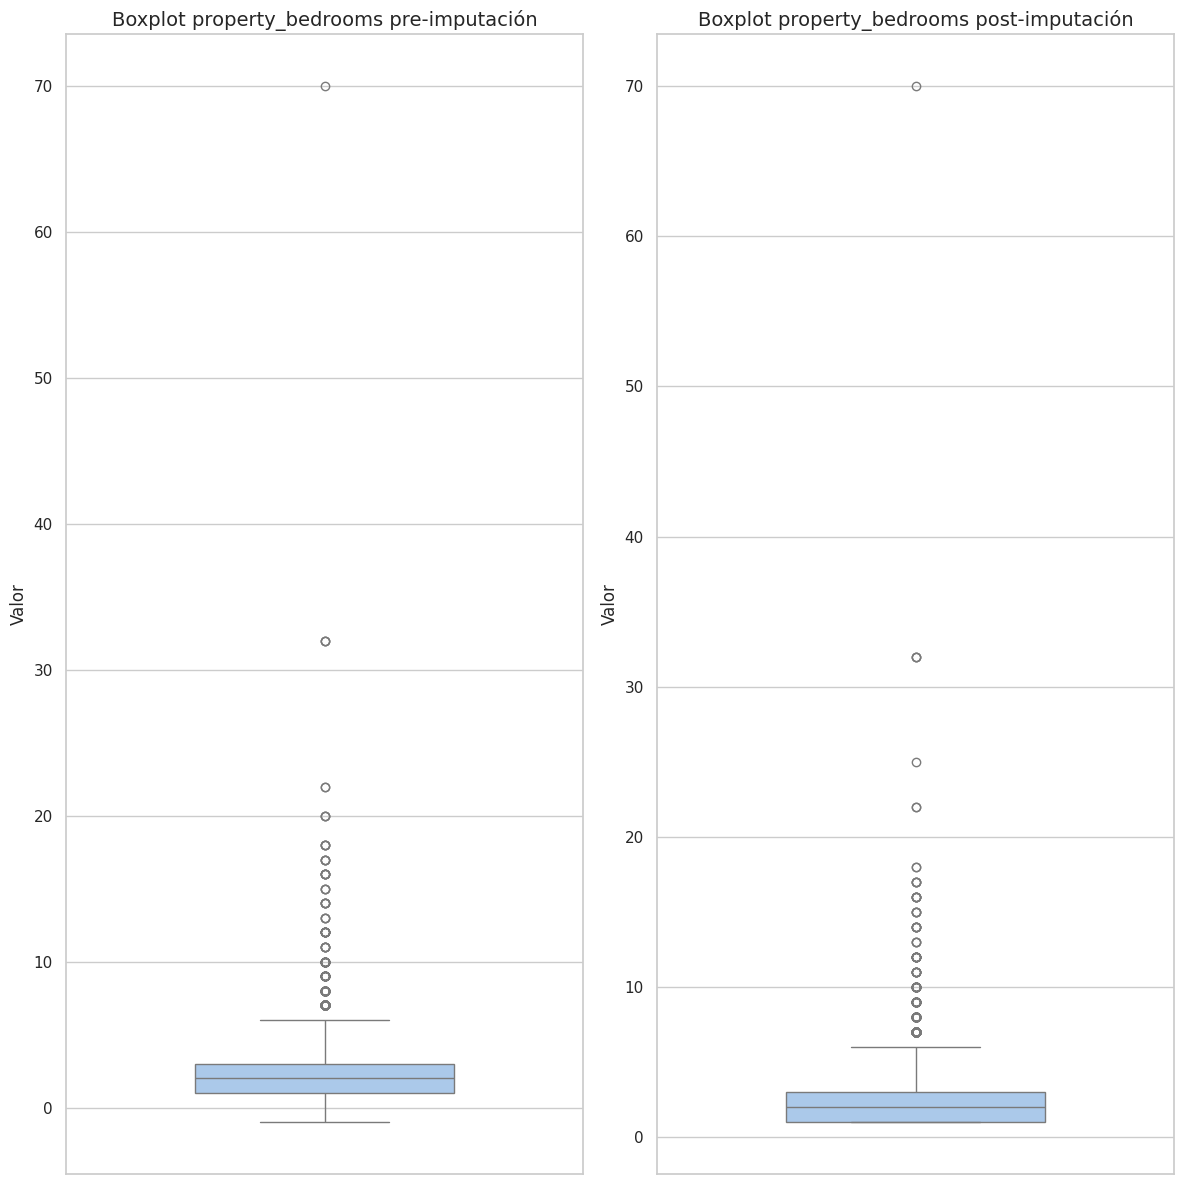

In [779]:
generar_distribucion("property_bedrooms")

Un poco de zoom

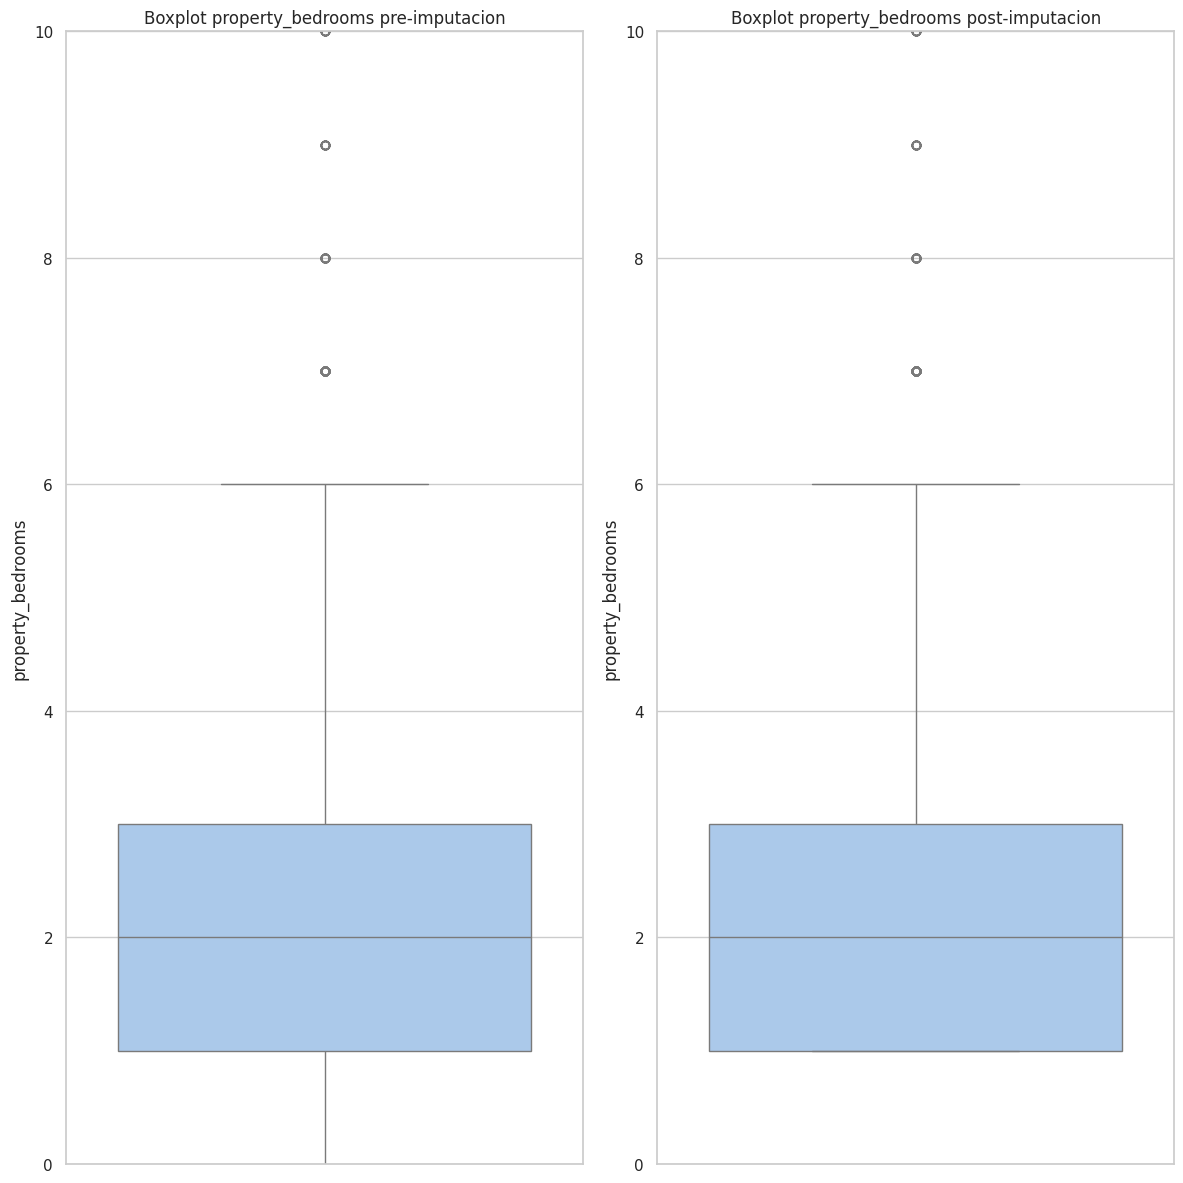

In [780]:
generar_distribucion_zoom("property_bedrooms")

La comparación de los boxplots revela una gran coherencia en la distribución de la variable entre los conjuntos de datos antes y después de la imputación. Aunque se observa una discrepancia leve entre los valores de aproximadamente 20 y 30, esta diferencia es mínima en comparación con la totalidad de los datos. Esto sugiere que las imputaciones se realizaron de manera consistente y dentro de los límites razonables de la variable, sin introducir valores atípicos o extremos.

Vamos a analizar cada property_bedrooms

In [781]:
pre_bedrooms = obtener_cantidad_variables(ds_pre_imputacion,'property_bedrooms')
pre_bedrooms.head()

property_bedrooms  cantidad
0                1.0     25547
1                2.0     21984
2                3.0     14092
3                4.0      3858
4                5.0       752

In [782]:
post_bedrooms = obtener_cantidad_variables(ds_train,'property_bedrooms')
post_bedrooms.head()

property_bedrooms  cantidad
0                1.0     32157
1                2.0     21680
2                3.0     13595
3                4.0      3665
4                5.0       707

Con esto podemos ver la cantidad de imputaciones que se hicieron gracias al método MICE.

In [783]:
comparar_imputacion(pre_bedrooms,post_bedrooms,'property_bedrooms')

6610 registros se imputaron con el valor de 1.0 property_bedrooms
304 registros se imputaron con el valor de 2.0 property_bedrooms
497 registros se imputaron con el valor de 3.0 property_bedrooms
193 registros se imputaron con el valor de 4.0 property_bedrooms
45 registros se imputaron con el valor de 5.0 property_bedrooms
10 registros se imputaron con el valor de 6.0 property_bedrooms
4 registros se imputaron con el valor de 7.0 property_bedrooms
0 registros se imputaron con el valor de 8.0 property_bedrooms
3 registros se imputaron con el valor de 9.0 property_bedrooms
1 registros se imputaron con el valor de 10.0 property_bedrooms
1 registros se imputaron con el valor de 12.0 property_bedrooms
1 registros se imputaron con el valor de 11.0 property_bedrooms
1 registros se imputaron con el valor de 14.0 property_bedrooms
1 registros se imputaron con el valor de 16.0 property_bedrooms
0 registros se imputaron con el valor de 17.0 property_bedrooms
0 registros se imputaron con el valor 

Podemos concluir que la mayoría de los datos nulos en la variable property_bedrooms fueron llenados con la cantidad de un dormitorio

#### Comparación property_rooms

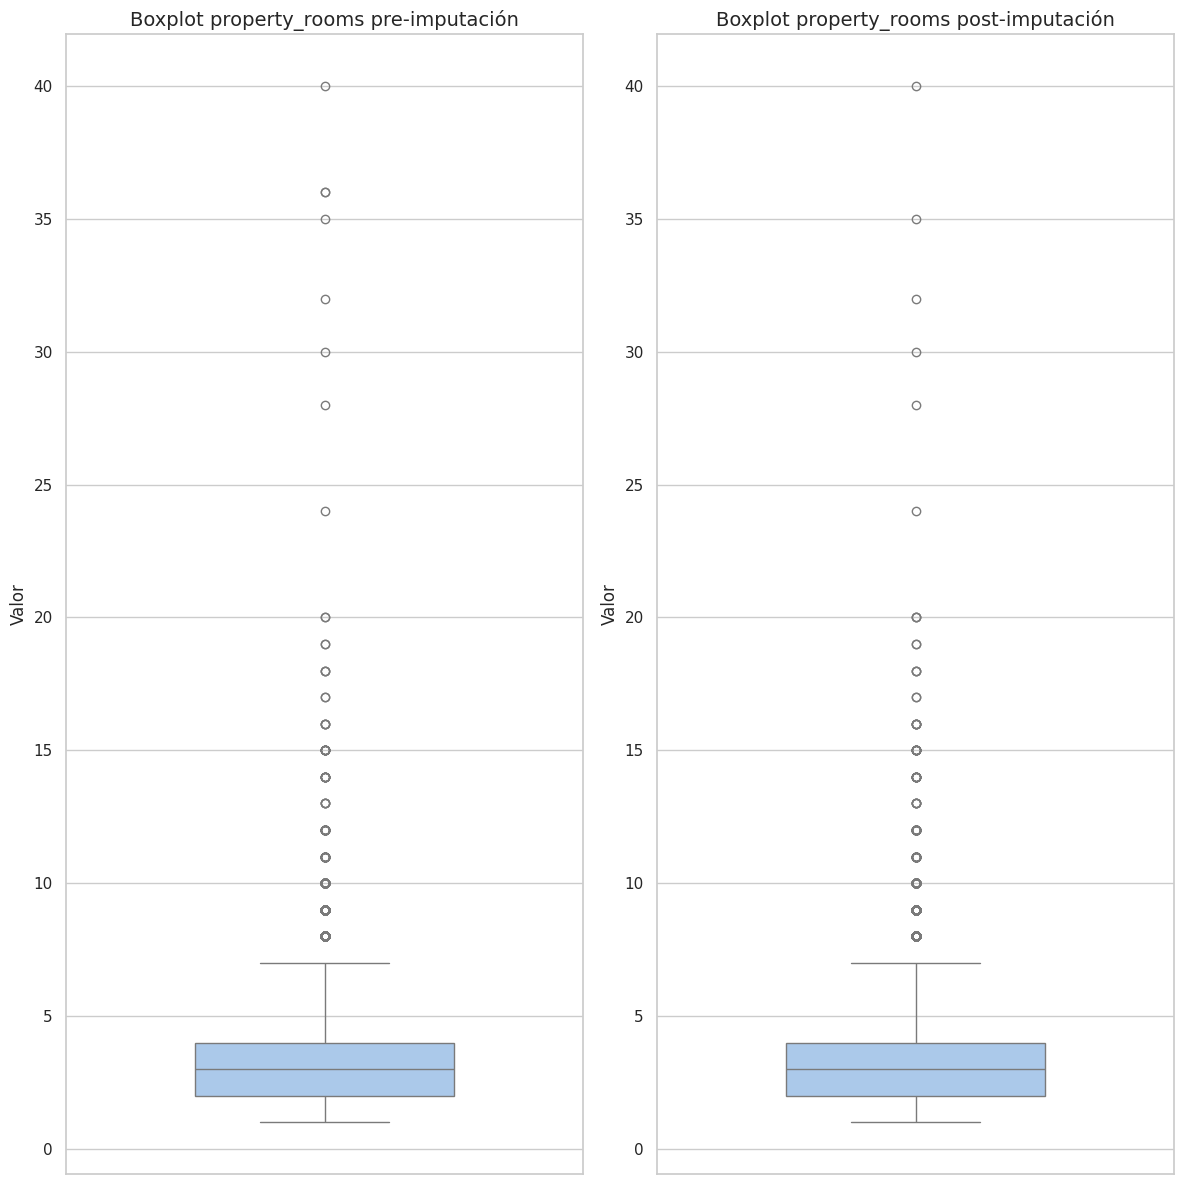

In [784]:
generar_distribucion("property_rooms")

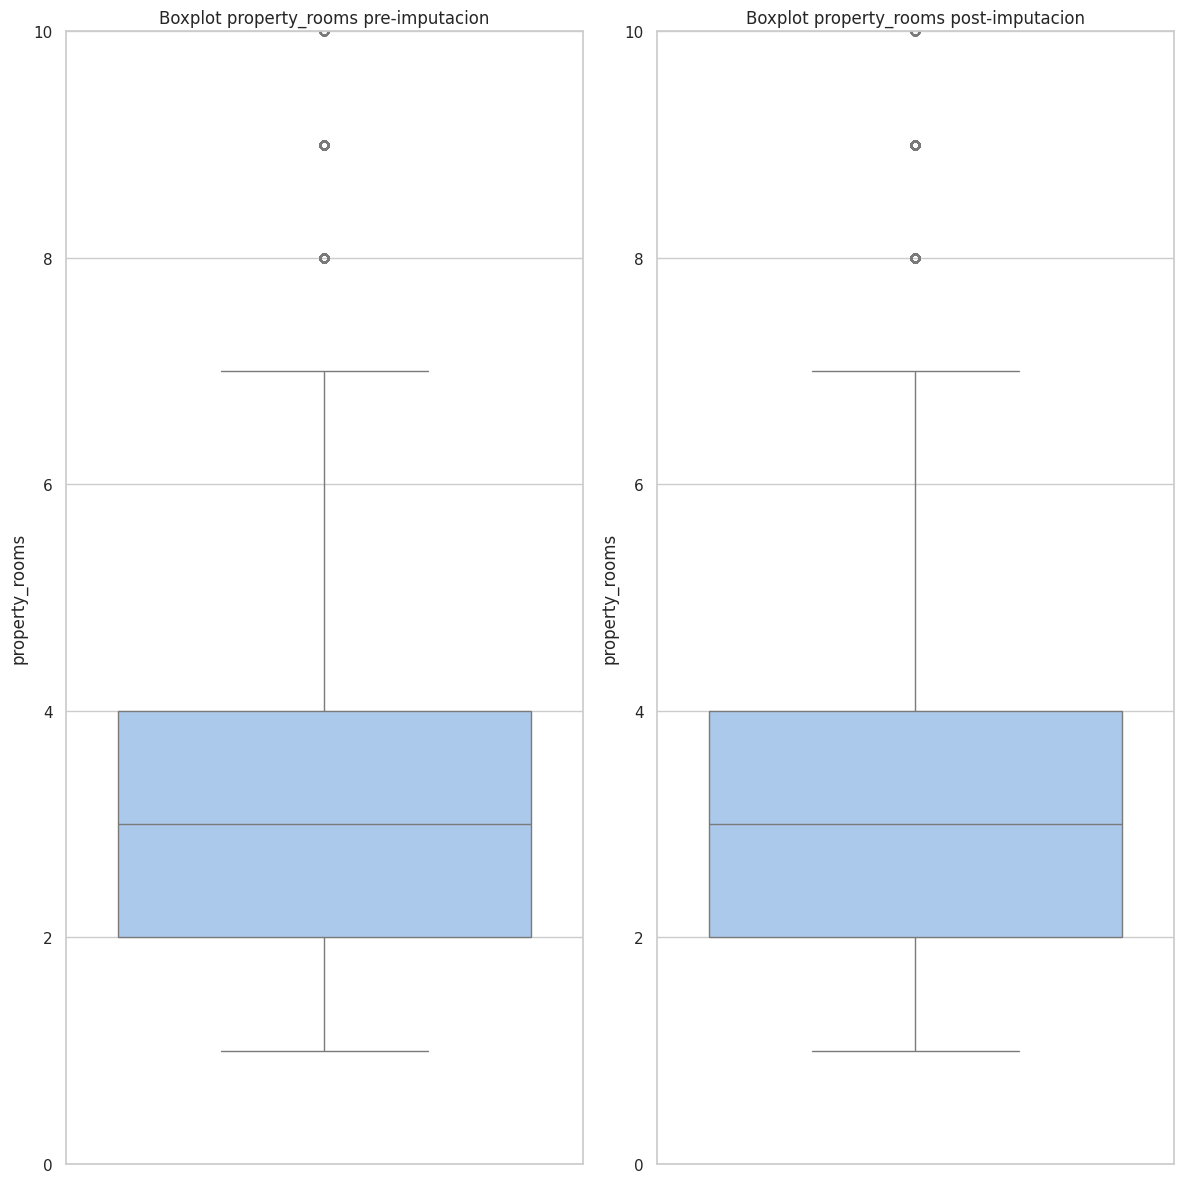

In [785]:
generar_distribucion_zoom("property_rooms")

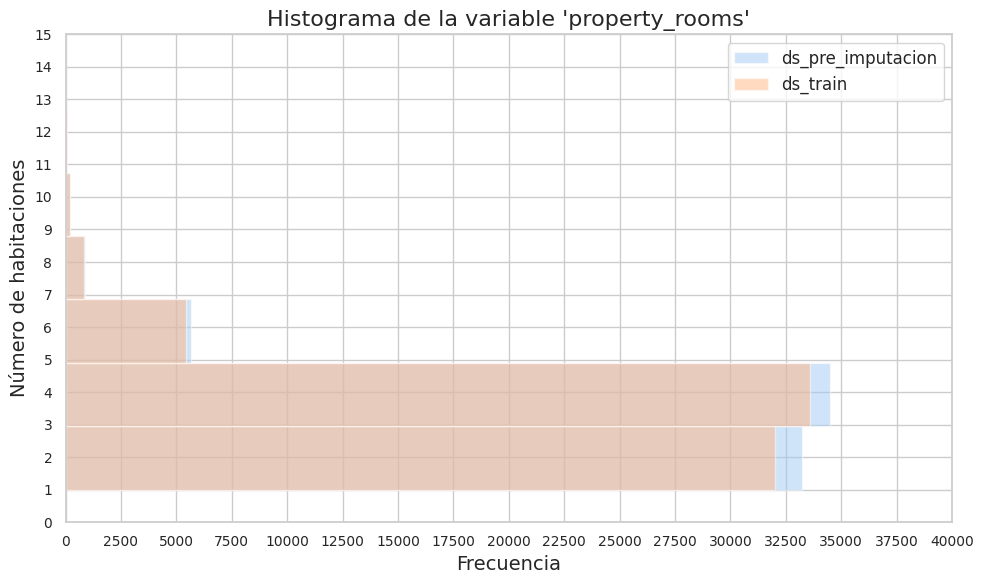

In [786]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Histograma para ds_pre_imputacion en el eje y (invertido)
plt.hist(ds_pre_imputacion['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_pre_imputacion')

# Histograma para ds_train en el eje y (invertido)
plt.hist(ds_train['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_train')

# Ajustes de título y etiquetas
plt.title("Histograma de la variable 'property_rooms'", fontsize=16)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Número de habitaciones", fontsize=14)

# Ajustes de límites de los ejes (zoom)
plt.ylim(0, 15)
plt.xlim(0, 40000)

# Establecer intervalos del eje x
plt.xticks(np.arange(0, 40001, 2500), fontsize=10)

# Añadir leyenda
plt.legend(fontsize=12)

# Establecer intervalos del eje y
plt.yticks(np.arange(16), fontsize=10)

plt.tight_layout()
plt.show()

<Axes: xlabel='property_rooms'>

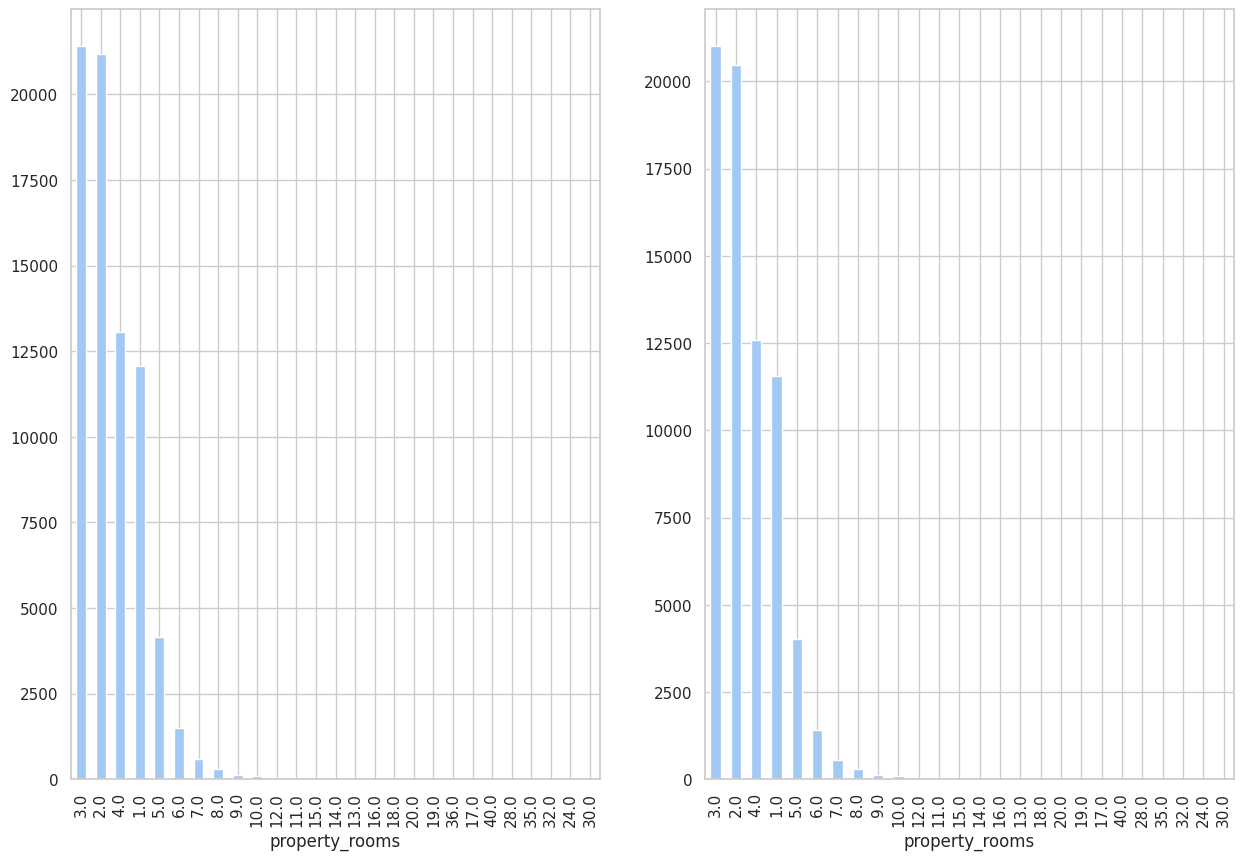

In [787]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
ds_pre_imputacion["property_rooms"].value_counts().plot.bar(ax=axes[0])
ds_train["property_rooms"].round().value_counts().plot.bar(ax=axes[1])

A través de estos gráficos, se observan sutiles discrepancias al asignar la cantidad de habitaciones a la hora de realizar la imputación.

In [788]:
pre_rooms = obtener_cantidad_variables(ds_pre_imputacion,'property_rooms')
pre_rooms.head()

property_rooms  cantidad
0             3.0     21416
1             2.0     21166
2             4.0     13054
3             1.0     12073
4             5.0      4147

In [789]:
post_rooms = obtener_cantidad_variables(ds_train,'property_rooms')
post_rooms.head()

property_rooms  cantidad
0             3.0     21019
1             2.0     20459
2             4.0     12579
3             1.0     11557
4             5.0      4026

In [790]:
comparar_imputacion(pre_rooms,post_rooms,'property_rooms')

397 registros se imputaron con el valor de 3.0 property_rooms
707 registros se imputaron con el valor de 2.0 property_rooms
475 registros se imputaron con el valor de 4.0 property_rooms
516 registros se imputaron con el valor de 1.0 property_rooms
121 registros se imputaron con el valor de 5.0 property_rooms
76 registros se imputaron con el valor de 6.0 property_rooms
33 registros se imputaron con el valor de 7.0 property_rooms
16 registros se imputaron con el valor de 8.0 property_rooms
7 registros se imputaron con el valor de 9.0 property_rooms
3 registros se imputaron con el valor de 10.0 property_rooms
9 registros se imputaron con el valor de 12.0 property_rooms
0 registros se imputaron con el valor de 11.0 property_rooms
1 registros se imputaron con el valor de 15.0 property_rooms
2 registros se imputaron con el valor de 14.0 property_rooms
2 registros se imputaron con el valor de 16.0 property_rooms
1 registros se imputaron con el valor de 13.0 property_rooms
0 registros se imput

Podemos inferir que la mayoría de los valores faltantes en la variable "property_rooms" fueron sustituidos por la cantidad de dos habitaciones.

#### Comparación property_surface_total

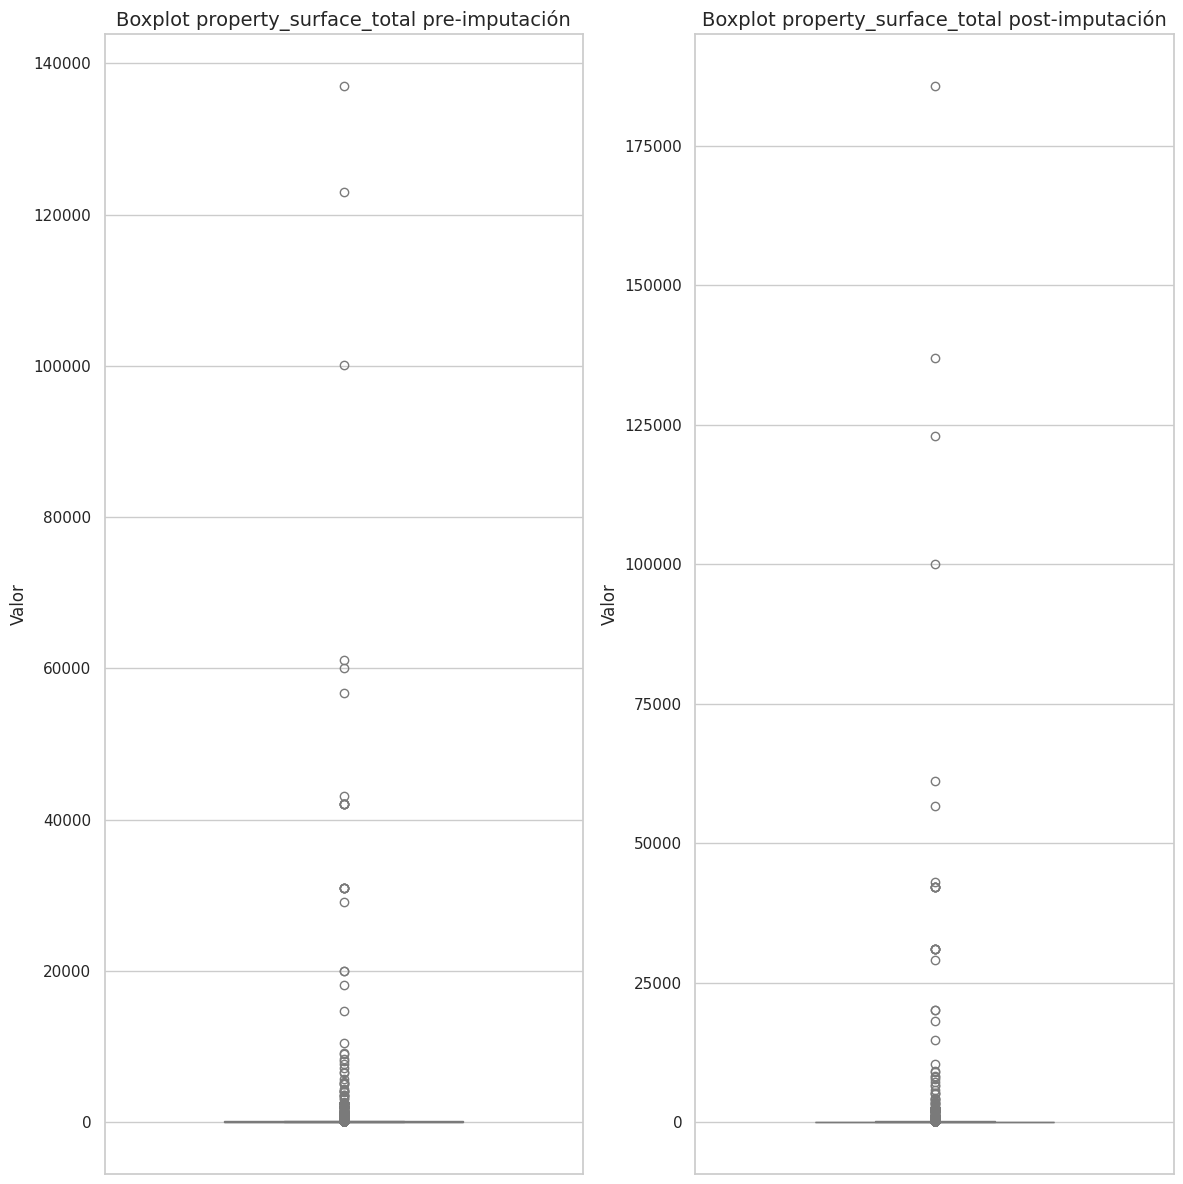

In [791]:
generar_distribucion("property_surface_total")

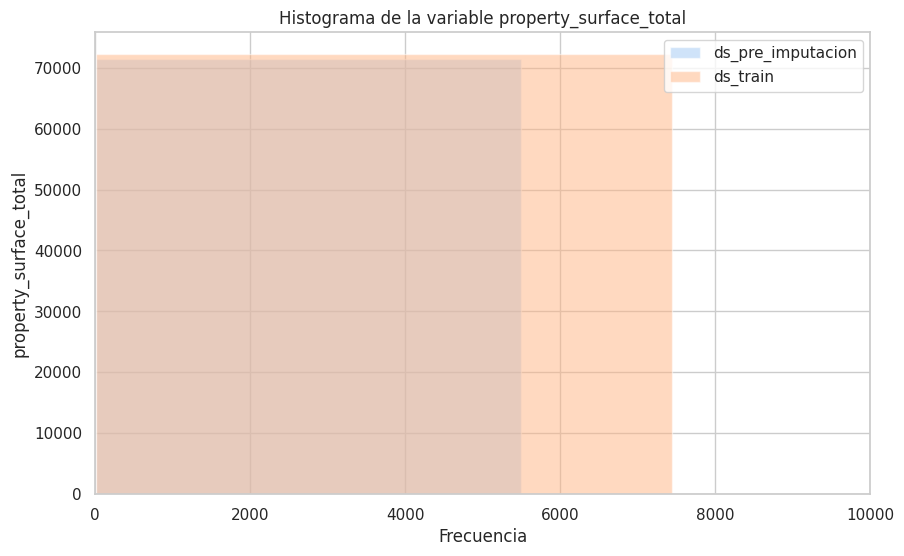

In [792]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_total'], bins=25, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_total'], bins=25, alpha=0.5, label='ds_train')

plt.title("Histograma de la variable property_surface_total")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_total")

plt.xlim(0, 10000)

plt.legend()

plt.show()

Observamos una notable disparidad en la cantidad de datos faltantes antes de la imputación de la variable "superficie total".

In [793]:
pre_total = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_total')
pre_total.head()

property_surface_total  cantidad
0                    50.0      1441
1                    40.0      1385
2                    45.0      1273
3                    42.0      1255
4                    60.0      1242

In [794]:
post_total = obtener_cantidad_variables(ds_train,'property_surface_total')
post_total.head()

property_surface_total  cantidad
0                    50.0      1451
1                    40.0      1394
2                    45.0      1260
3                    42.0      1252
4                    60.0      1227

In [795]:
comparar_imputacion(pre_total,post_total,'property_surface_total')

10 registros se imputaron con el valor de 50.0 property_surface_total
9 registros se imputaron con el valor de 40.0 property_surface_total
13 registros se imputaron con el valor de 45.0 property_surface_total
3 registros se imputaron con el valor de 42.0 property_surface_total
15 registros se imputaron con el valor de 60.0 property_surface_total
18 registros se imputaron con el valor de 35.0 property_surface_total
17 registros se imputaron con el valor de 38.0 property_surface_total
46 registros se imputaron con el valor de 55.0 property_surface_total
4 registros se imputaron con el valor de 43.0 property_surface_total
15 registros se imputaron con el valor de 37.0 property_surface_total
5 registros se imputaron con el valor de 44.0 property_surface_total
4 registros se imputaron con el valor de 47.0 property_surface_total
8 registros se imputaron con el valor de 36.0 property_surface_total
0 registros se imputaron con el valor de 52.0 property_surface_total
15 registros se imputaron c

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_total" fueron reemplazados con una superficie total de 49 m²


#### Comparación property_surface_covered

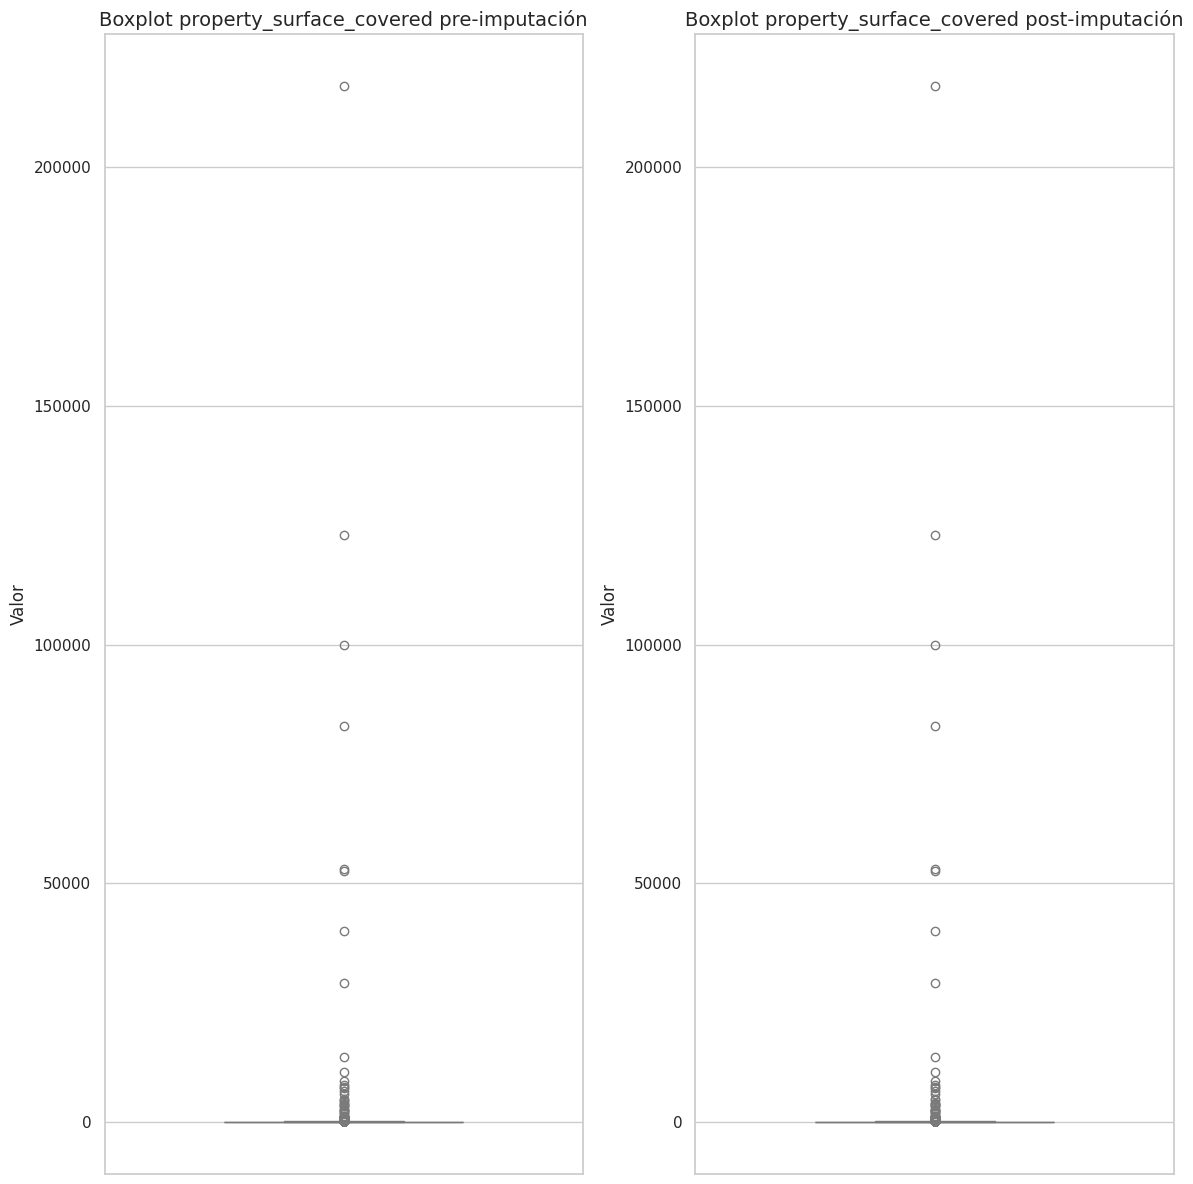

In [796]:
generar_distribucion("property_surface_covered")

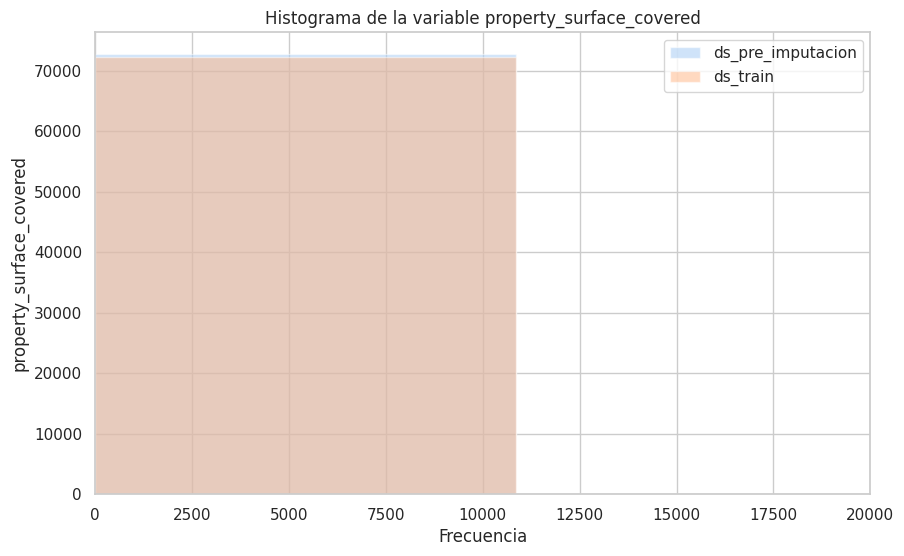

In [797]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_covered'], bins=20, alpha=0.5,  label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_covered'], bins=20, alpha=0.5,  label='ds_train')


plt.title("Histograma de la variable property_surface_covered")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_covered")


plt.xlim(0,20000)

plt.legend()

plt.show()

Se observa una ligera disparidad en los datos faltantes. Se puede inferir que se imputaron pocos datos para la variable "property_surface_covered", ya que esta variable tenía entre los menos valores nulos.

In [798]:
pre_cubierto = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_covered')
pre_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1904
1                      38.0      1602
2                      50.0      1598
3                      45.0      1549
4                      35.0      1486

In [799]:
post_cubierto = obtener_cantidad_variables(ds_train,'property_surface_covered')
post_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1891
1                      50.0      1568
2                      38.0      1538
3                      45.0      1520
4                      42.0      1464

In [800]:
comparar_imputacion(pre_cubierto,post_cubierto,'property_surface_covered')

13 registros se imputaron con el valor de 40.0 property_surface_covered
34 registros se imputaron con el valor de 50.0 property_surface_covered
60 registros se imputaron con el valor de 38.0 property_surface_covered
29 registros se imputaron con el valor de 45.0 property_surface_covered
22 registros se imputaron con el valor de 42.0 property_surface_covered
22 registros se imputaron con el valor de 35.0 property_surface_covered
34 registros se imputaron con el valor de 60.0 property_surface_covered
4 registros se imputaron con el valor de 37.0 property_surface_covered
26 registros se imputaron con el valor de 36.0 property_surface_covered
8 registros se imputaron con el valor de 32.0 property_surface_covered
11 registros se imputaron con el valor de 34.0 property_surface_covered
24 registros se imputaron con el valor de 30.0 property_surface_covered
32 registros se imputaron con el valor de 33.0 property_surface_covered
26 registros se imputaron con el valor de 43.0 property_surface_co

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_covered" fueron completados con una superficie cubierta de 32 m²

#### Comparación latitud

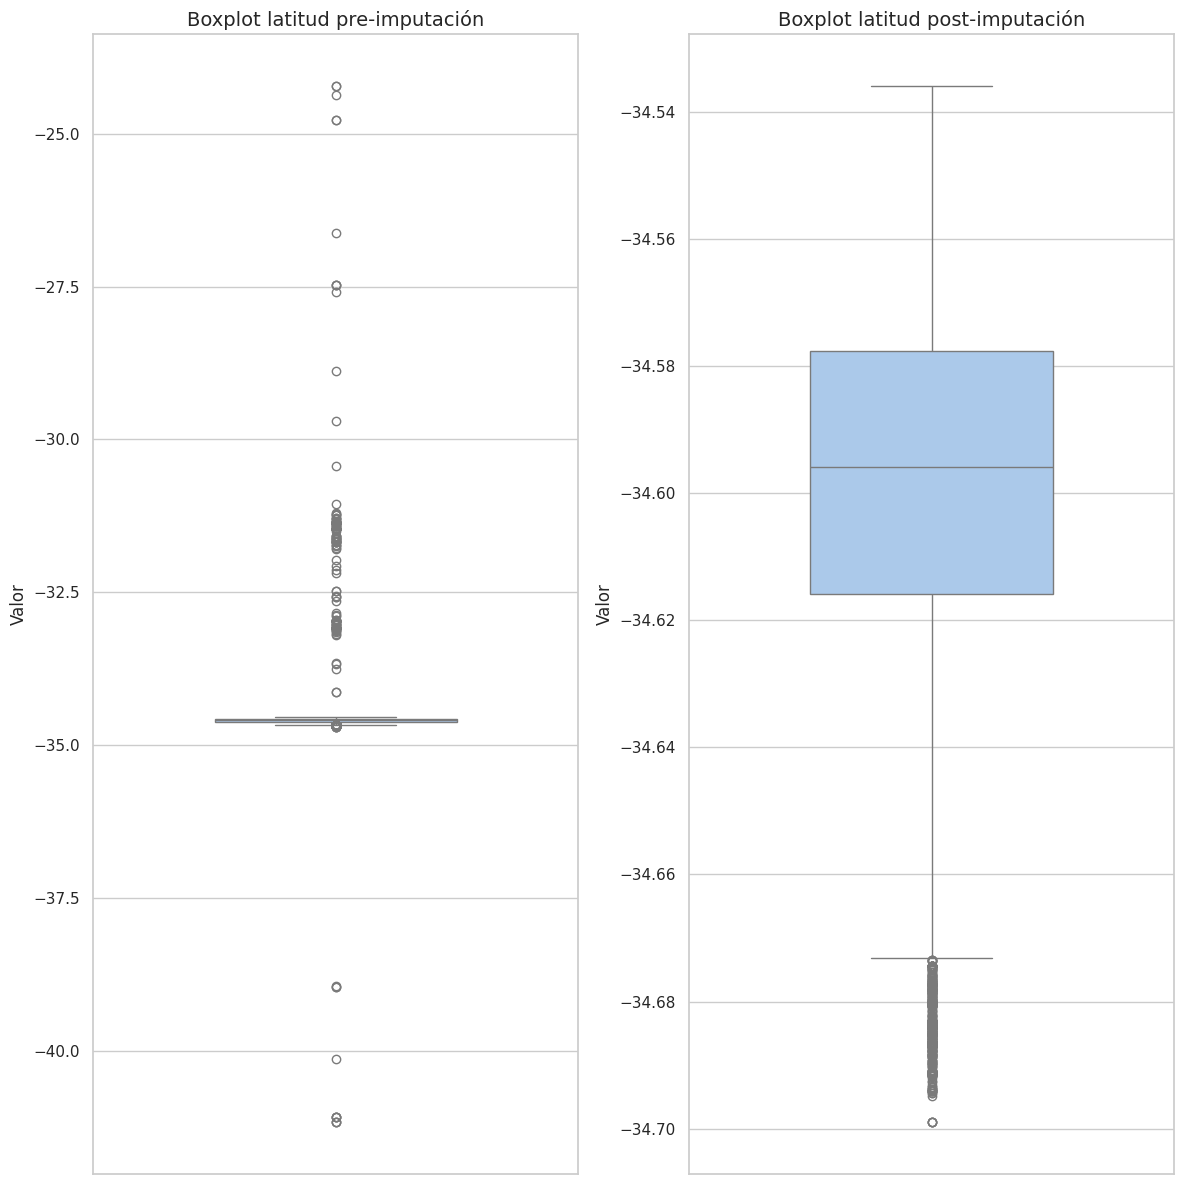

In [801]:
generar_distribucion("latitud")

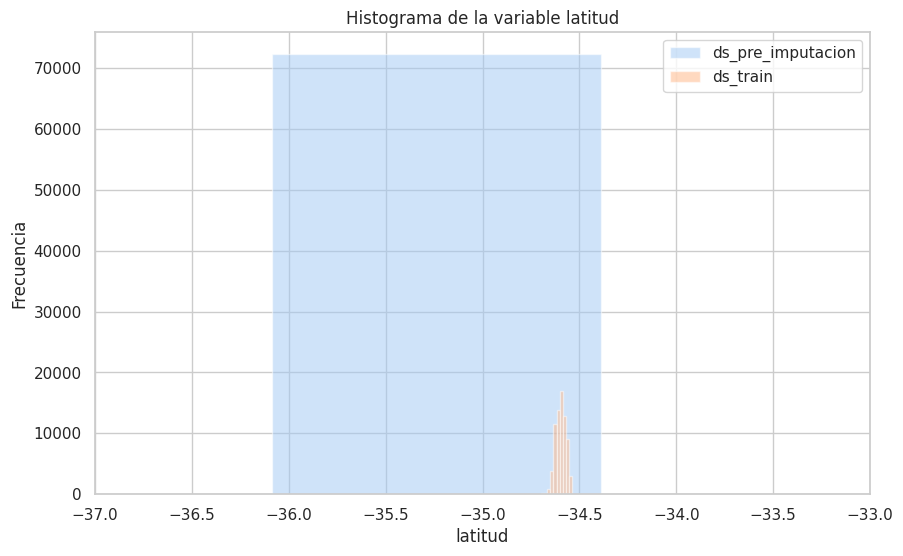

In [802]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['latitud'], bins=10, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['latitud'], bins=10, alpha=0.5, label='ds_train')

plt.xlim(-37, -33)

plt.title("Histograma de la variable latitud")
plt.xlabel("latitud")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

Se puede observar que antes de la imputación, la latitud tenía una frecuencia constante para todos sus valores. Sin embargo, al imputar los datos, la frecuencia varía más, generando una distribución en forma de campana de Gauss. Se destaca que la latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -34.58.

In [803]:
pre_latitud = obtener_cantidad_variables(ds_pre_imputacion,'latitud')
pre_latitud

latitud  cantidad
0     -34.541250       118
1     -34.619406        99
2     -34.604538        86
3     -34.541616        84
4     -34.581910        79
...          ...       ...
39318 -34.599809         1
39319 -34.605188         1
39320 -34.577547         1
39321 -34.591818         1
39322 -34.570696         1

[39323 rows x 2 columns]

In [804]:
post_latitud = obtener_cantidad_variables(ds_train,'latitud')
post_latitud

latitud  cantidad
0     -34.541250       118
1     -34.619406        99
2     -34.604538        86
3     -34.541616        84
4     -34.581910        79
...          ...       ...
39186 -34.621354         1
39187 -34.599809         1
39188 -34.605188         1
39189 -34.577547         1
39190 -34.570696         1

[39191 rows x 2 columns]

Parecieran ser iguales... pero lo hemos imputado

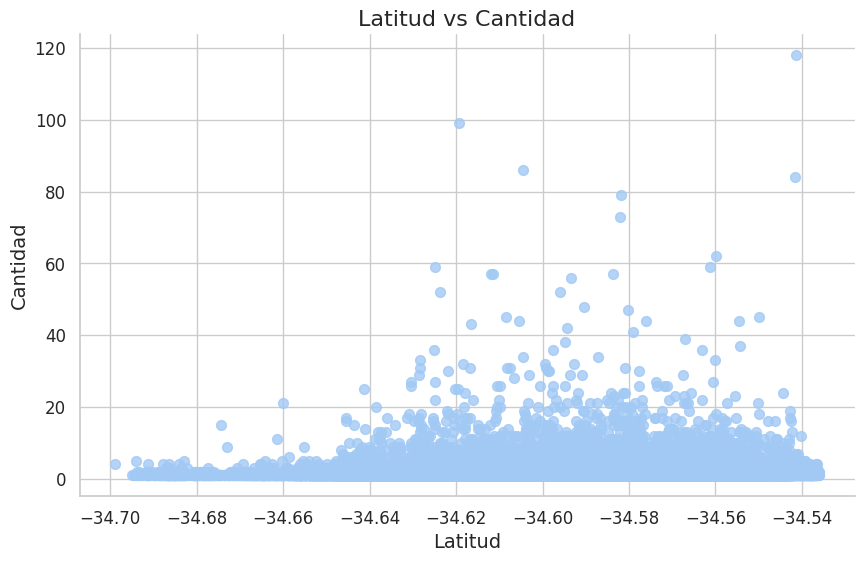

In [805]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_latitud['latitud'], post_latitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Latitud vs Cantidad", fontsize=16)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [806]:
pre_latitud.equals(post_latitud)

False

In [807]:
print(len(pre_latitud))
print(len(post_latitud))
print('diferencia: {}'.format(len(pre_latitud)-len(post_latitud)))

39323
39191
diferencia: 132


#### Comparación longitud

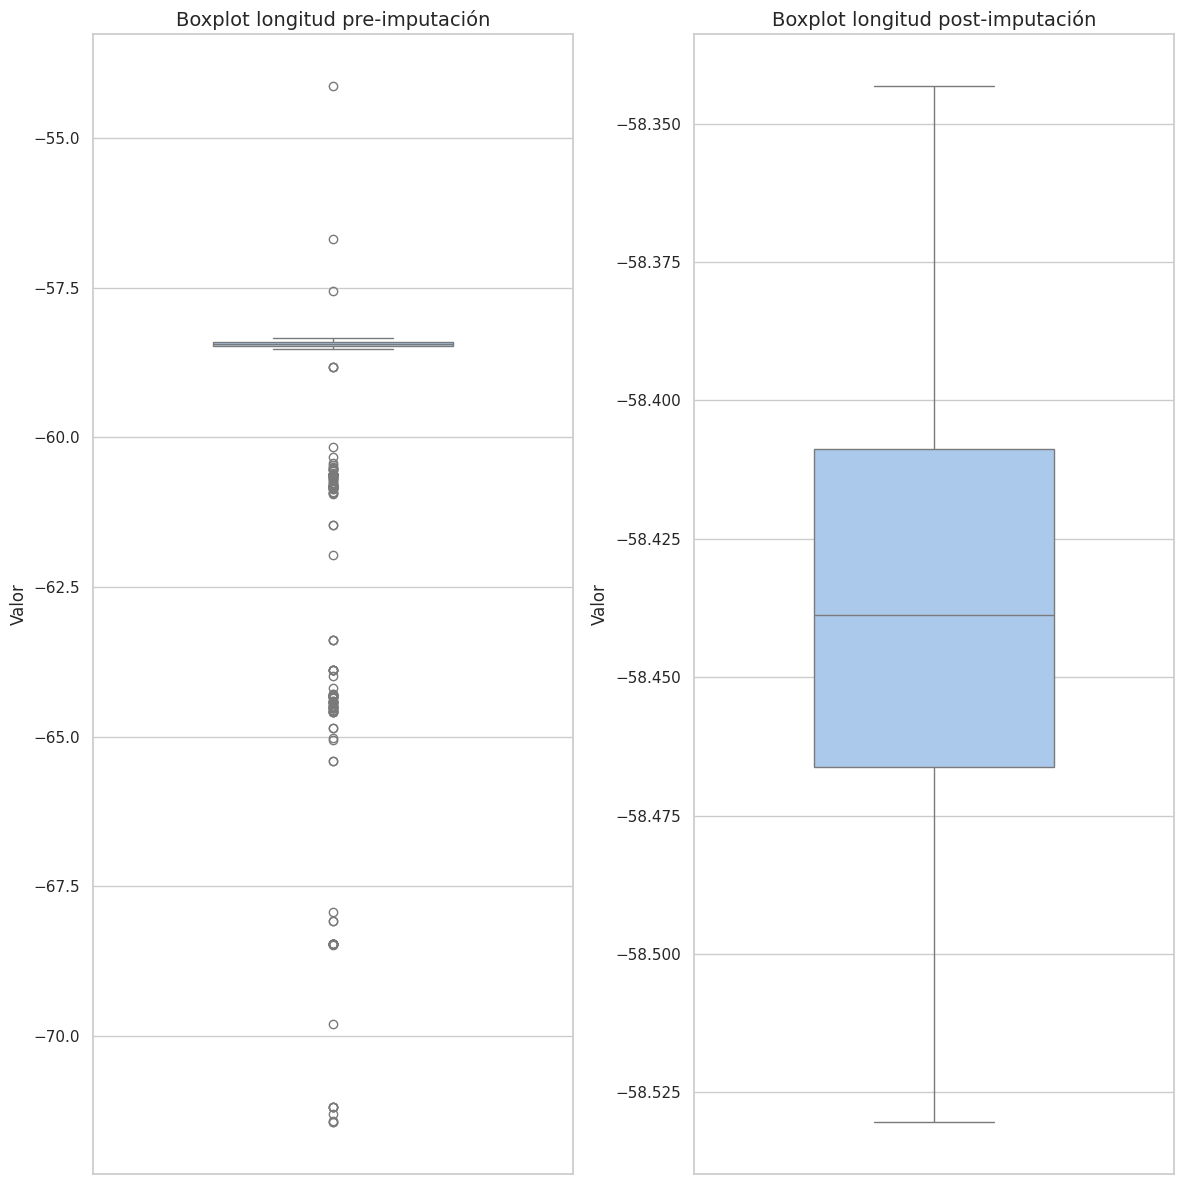

In [808]:
generar_distribucion("longitud")

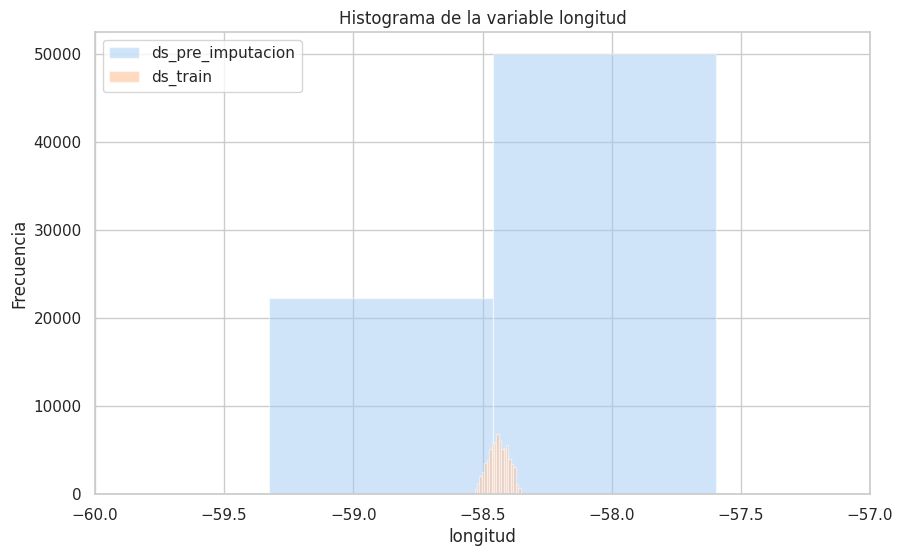

In [809]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['longitud'], bins=20, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['longitud'], bins=20, alpha=0.5, label='ds_train')


plt.title("Histograma de la variable longitud")
plt.xlabel("longitud")
plt.ylabel("Frecuencia")

plt.xlim(-60, -57)

plt.legend()

plt.show()

Todos los valores que se mencionarán en el siguiente párrafo se consideran aproximados.

Antes de la imputación, se observa que la latitud tenía una frecuencia medianamente constante. Desde la latitud -59.5 hasta -58.5, la frecuencia es de aproximadamente 18000, luego aumenta en más de 50000 hasta llegar a la latitud -57.5.

Tras la imputación de los datos, se observa una variación en la frecuencia que genera una distribución en forma de campana de Gauss. La latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -58.400.

In [810]:
pre_longitud = obtener_cantidad_variables(ds_pre_imputacion,'longitud')
pre_longitud.head()

longitud  cantidad
0 -58.472966       118
1 -58.451999        99
2 -58.424956        86
3 -58.473377        84
4 -58.449381        79

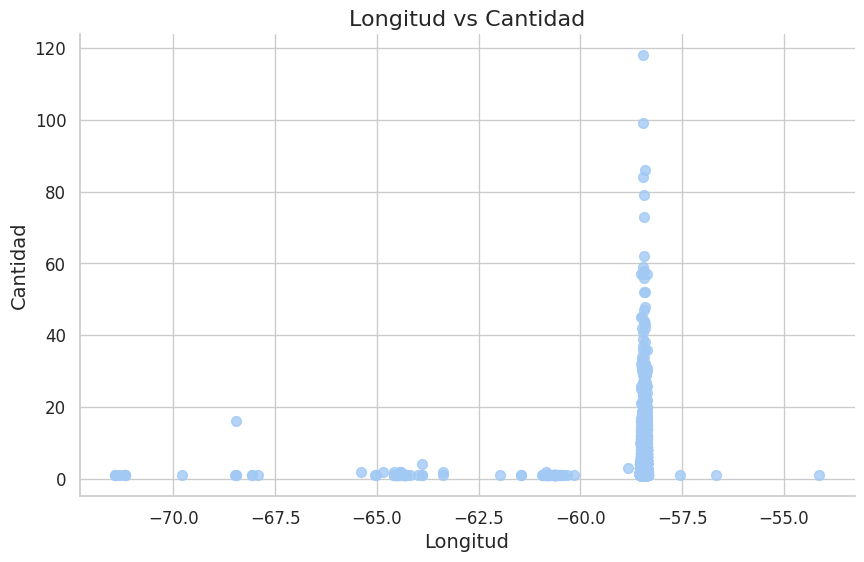

In [811]:
# @title longitud vs cantidad

# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(pre_longitud['longitud'], pre_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [812]:
post_longitud = obtener_cantidad_variables(ds_train,'longitud')
post_longitud.head()

longitud  cantidad
0 -58.472966       118
1 -58.451999        99
2 -58.424956        86
3 -58.473377        84
4 -58.449381        79

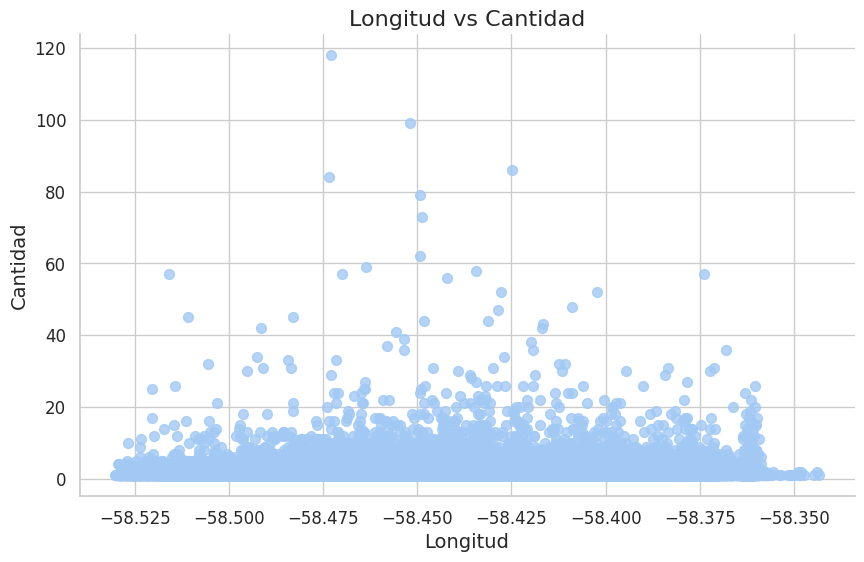

In [813]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_longitud['longitud'], post_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [814]:
pre_longitud.equals(post_longitud)

False

In [815]:
print(len(pre_longitud))
print(len(post_longitud))
print('diferencia: {}'.format(len(pre_longitud)-len(post_longitud)))

39139
39007
diferencia: 132


#### Comparación place_l3

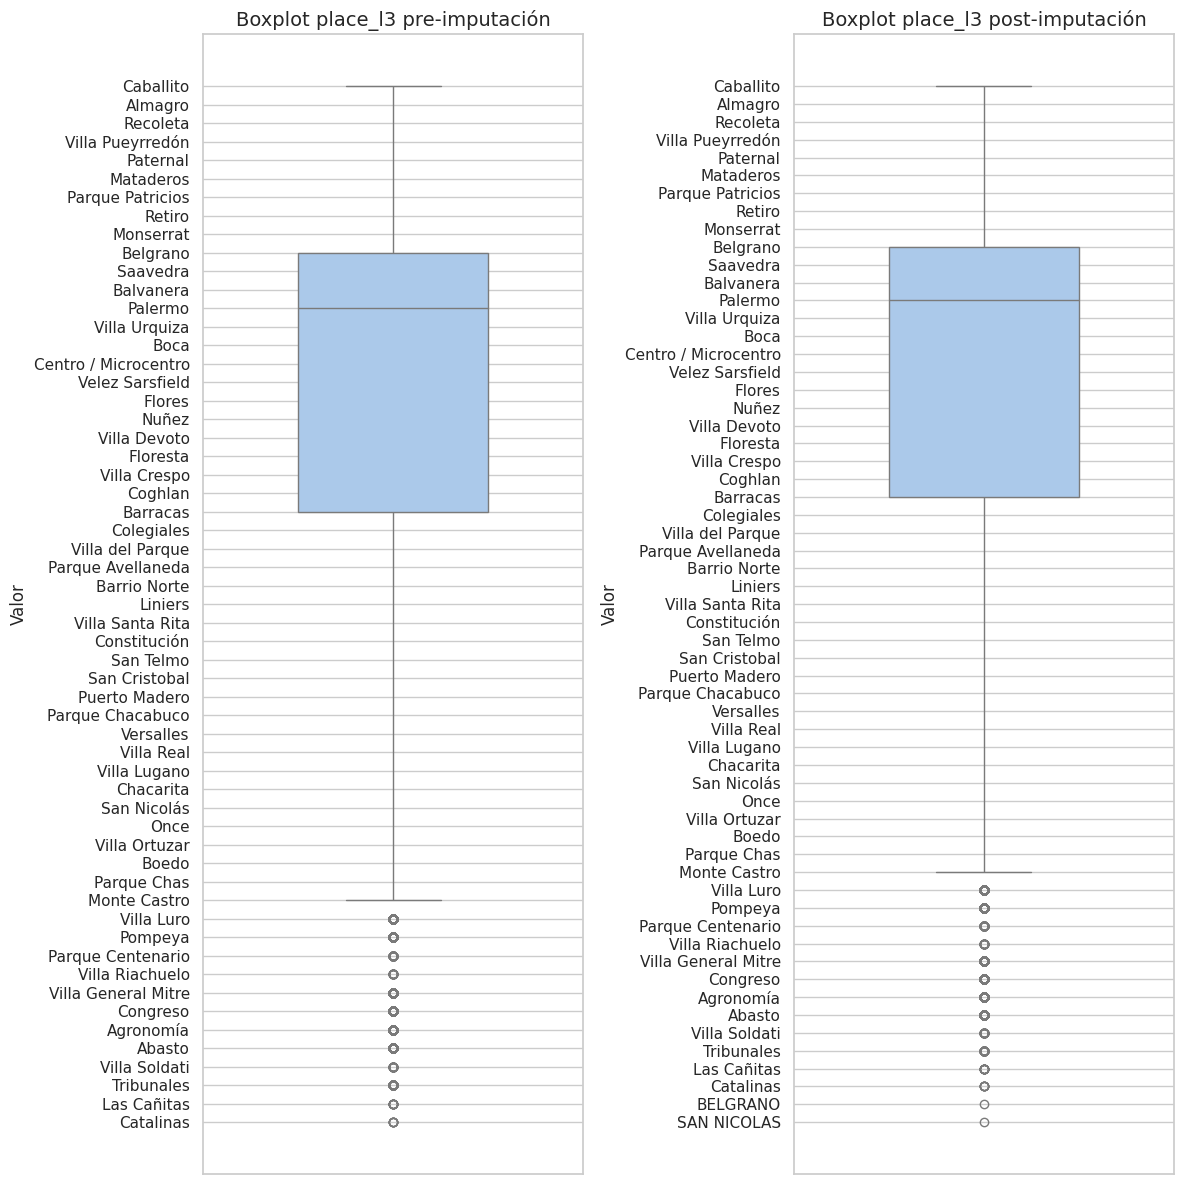

In [816]:
generar_distribucion("place_l3")

Como los datos nulos en la variable place_l3 era de 0.454913. No se observan grandes cambios en el gráfico.
Podemos notar que la media de Balbanera se mantiene, lo mismo con Villa Devoto y Almagro.

In [817]:
pre_barrio = obtener_cantidad_variables(ds_pre_imputacion,'place_l3')
pre_barrio.head()

place_l3  cantidad
0        Palermo     11439
1       Belgrano      7097
2      Caballito      5677
3       Recoleta      5073
4  Villa Urquiza      3710

In [818]:
post_barrio = obtener_cantidad_variables(ds_train,'place_l3')
post_barrio.head()

place_l3  cantidad
0        Palermo     10711
1       Belgrano      6584
2      Caballito      5547
3       Recoleta      4894
4  Villa Urquiza      3597

In [819]:
comparar_imputacion(pre_barrio,post_barrio,'place_l3')

728 registros se imputaron con el valor de Palermo place_l3
513 registros se imputaron con el valor de Belgrano place_l3
130 registros se imputaron con el valor de Caballito place_l3
179 registros se imputaron con el valor de Recoleta place_l3
113 registros se imputaron con el valor de Villa Urquiza place_l3
130 registros se imputaron con el valor de Almagro place_l3
191 registros se imputaron con el valor de Nuñez place_l3
94 registros se imputaron con el valor de Villa Crespo place_l3
95 registros se imputaron con el valor de Flores place_l3
148 registros se imputaron con el valor de Barrio Norte place_l3
68 registros se imputaron con el valor de Balvanera place_l3
7 registros se imputaron con el valor de Villa Devoto place_l3
9 registros se imputaron con el valor de Colegiales place_l3
9 registros se imputaron con el valor de Villa del Parque place_l3
7 registros se imputaron con el valor de Saavedra place_l3
52 registros se imputaron con el valor de Puerto Madero place_l3
73 regist

Podemos concluir que la mayoría de los valores faltantes en la variable "place_l3" fueron completados con el nombre del barrio "Palermo".

## Valores atípicos

### *Prefacio*

Recordando lo visto en la sección de variables cualitativas en Exploración inicial.

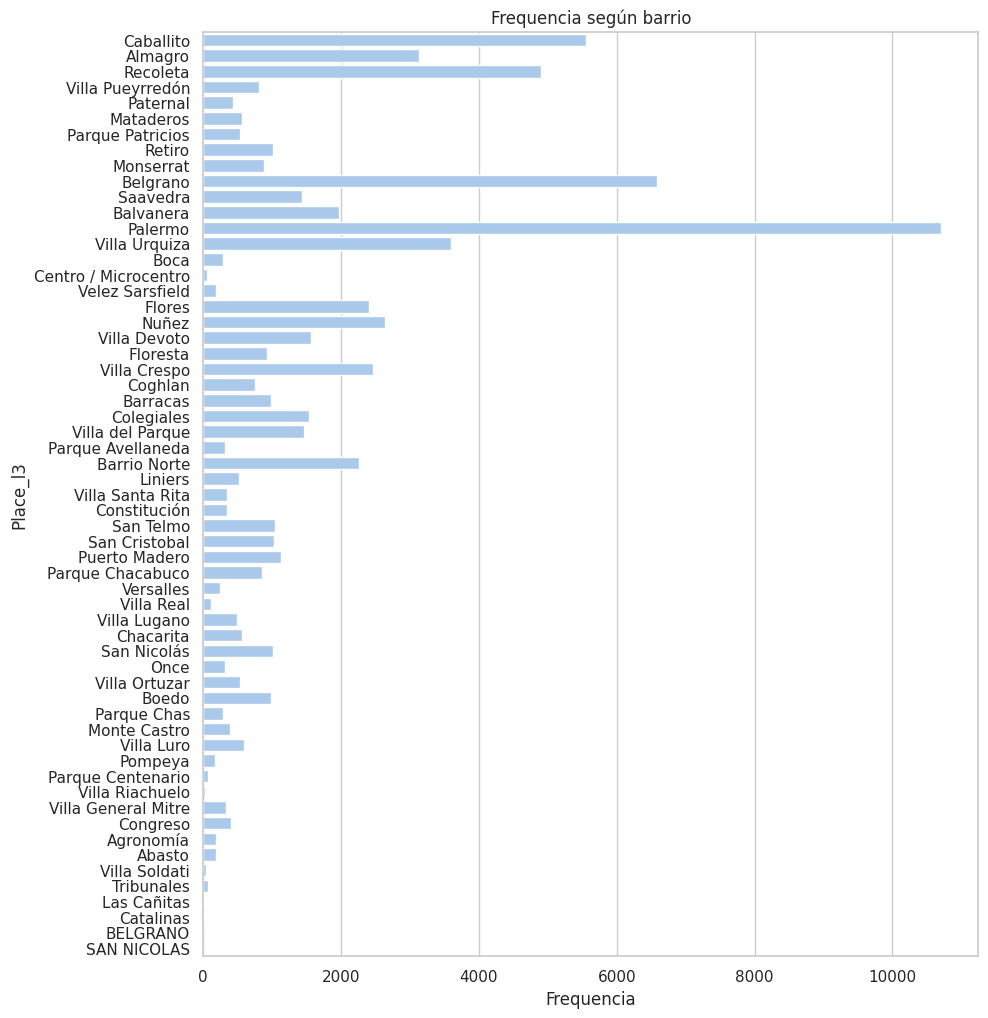

In [820]:
# Hacemos un gráfico de frecuencias de los barrios
plt.figure(figsize=(10, 12))
sns.countplot(y=ds_train.place_l3)
plt.xlabel('Frequencia')
plt.ylabel('Place_l3')
plt.title('Frequencia según barrio')
plt.show()

Las Cañitas, Catalinas, San Nicolas tienen una representación nula/casi nula.
Villa Soldati, Microcentro, Parque Centenario, Villa Riachuelo, Tribunales tienen una representación tan pequeña que tenemos que tener en cuenta que los registros pueden ser casos aislados/no representativos de la realidad de las ventas de inmuebles en el barrio.

In [821]:
# Hacemos una copia del dataset hasta el momento
ds_atipicos = ds_train.copy()

Funciones auxiliares para el análisis:



In [822]:
#Función para cálculo de limite superior e inferior de outliers según cuartiles
def limite_rango_iq(df, variable):
  # Cuartiles
  Q1 = np.quantile(df[variable], 0.25)
  Q3 = np.quantile(df[variable], 0.75)

  # Rango intercuartil
  IQR = Q3 - Q1

  # Limite inferior Outliers
  out_inf = Q1 - 1.5 * IQR

  # Limite superior Outliers
  out_sup = Q1 + 1.5 * IQR

  return out_inf, out_sup

# Funcion para cálculo de Z Score normal
def calculo_z_score(serie):
  media = np.mean(serie)
  std = np.std(serie)
  return (serie - media) / std

#Función para calculo de Z Score modificado
def calculo_z_mod(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  return (serie - median) * 0.6745 / MAD

# Grafico comparativo
def plot_comparativo(df_antes, df_despues, var):

  # Create subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  # Plot for df_antes
  sns.boxplot(y=df_antes[var], ax=axs[0])
  axs[0].set_title('Antes')

  # Plot for df_despues
  sns.boxplot(y=df_despues[var], ax=axs[1])
  axs[1].set_title('Después')

  # Show plots
  plt.tight_layout()
  plt.show()
  return

# Boxplot por barrio de la variable a evaluar
def plot_por_barrio(df, var):
  # Lista de barrios
  barrios = ['Coghlan','Colegiales','Abasto','Nuñez','Constitución',
             'Boedo', 'San Nicolás', 'Retiro', 'Liniers', 'Almagro',
             'Boca', 'Palermo', 'Balvanera','Barracas', 'Caballito',
             'Villa Ortuzar', 'Villa Luro', 'Puerto Madero', 'Pompeya', 'Saavedra',
             'Parque Chacabuco', 'Belgrano', 'Recoleta', 'Floresta', 'Monserrat',
             'Villa del Parque', 'San Telmo', 'Villa Crespo', 'Tribunales', 'Once',
             'Barrio Norte', 'Villa Lugano', 'Congreso', 'Villa Urquiza', 'Mataderos',
             'Villa Devoto', 'Recoleta', 'San Cristobal', 'Villa Pueyrredon', 'Congreso']

  # Subplots
  fig, axs = plt.subplots(8, 5, figsize=(16, 24))
  axs = axs.flatten()

  for i, barrio in enumerate(barrios):
      filtered_data = df[df['place_l3'] == barrio]

      sns.boxplot(y=filtered_data[var], ax=axs[i])

      axs[i].set_title(f'{var} en {barrio}')

  # Adjust layout
  plt.tight_layout()
  # Show the plot
  plt.show()
  return



### Análisis univariado

Vamos a intentar identificar los outliers univariados utilizando los IQR y el Z Score.

#### *Análisis según cantidad de habitaciones(property_bedrooms)*

<Axes: ylabel='property_bedrooms'>

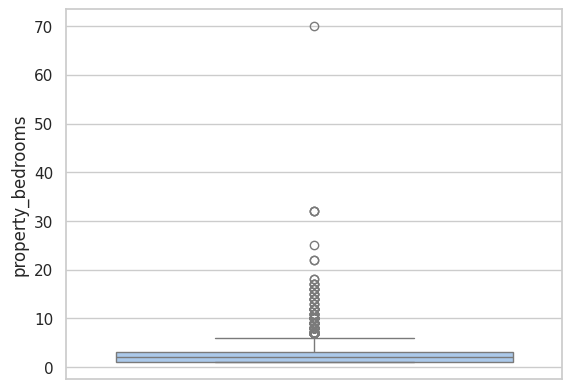

In [823]:
sns.boxplot(y=ds_train.property_bedrooms)

In [824]:
limite_rango_iq(ds_train, 'property_bedrooms')

(-2.0, 4.0)

Primero analizamos el outlier más notorio y verificamos si es un valor posible.

In [825]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 40]
outlier

id  start_date    end_date created_on    latitud  \
94998  4TbEkLoqy/0c3zakd66/FQ==  2021-09-24  2022-01-27 2021-09-24 -34.646632   

        longitud    place_l3 property_type  property_rooms  property_bedrooms  \
94998 -58.497902  Villa Luro  Departamento             3.0               70.0   

       property_surface_total  property_surface_covered  property_price  
94998                   811.0                      70.0        135000.0

Es un departamento de 3 ambientes con 70 habitaciones, lo cual no es posible. Tampoco podemos asumir que es un error de tipeo. A su vez, la superficie total es exagerada en comparación de la superficie cubierta y el precio de la propiedad.  Vamos a eliminar el outlier y visualizar nuevamente el código.  

<ipython-input-826-a0f165733f40>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: ylabel='property_bedrooms'>

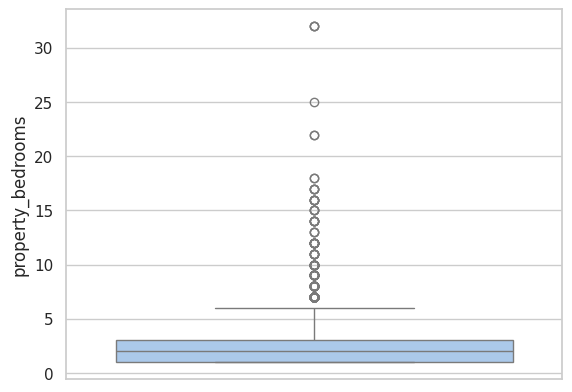

In [826]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_bedrooms'] > 40].index
ds_train.drop(id_outlier,inplace=True)

# Visualizamos
sns.boxplot(y=ds_train.property_bedrooms)

Existen muchos valores atípicos por sobre el umbral marcado por los cuartiles, pero teniendo en cuenta que estamos trabajando con casas, PH y departamentos unicamente, revisaremos las anomalías mayores a 15, a partir de donde no hay muchas ocurrencias.



In [827]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 15]
outlier

id  start_date    end_date created_on  \
366101  8o3ZwoXgOddHoex/irib7g==  2021-04-10  2021-06-05 2021-04-10   
48279   r3sXlEIiCgBG5TtUkN93mw==  2021-03-14  2021-06-05 2021-03-14   
307211  uqM9/WXFJkEJnXEQefcpRQ==  2021-09-19  2021-09-19 2021-09-19   
362676  Gj3g5KCtRbYcwZIuh/wJGg==  2021-01-16  2021-08-06 2021-01-16   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   
150885  X3WGOe/PrGS1u+xozM5elA==  2021-03-24  2021-06-05 2021-03-24   
32758   KA441xdi8PtuWBvjcAbGOQ==  2021-02-08  2021-03-01 2021-02-08   
208593  CtbHDgBLf3+kTc20y2iVhw==  2021-11-29  2022-01-14 2021-11-29   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   
285222  WHu8kgA8Vu692UM8Dz3gnA==  2021-02-24  2022-02-09 2021-02-24   
49960   O/JMW/VVo7OmWF7SkXtBuA==  2021-10-16  2021-12-24 2021-10-16   
346602  yzI9zylc11wllHX16av6jA==  2021-09-30  2021-11-02 2021-09-30   
332857  760pAR/aW7whZAZRLML/ZA==  2021-09-17  2022-02-25 2021-09-17   
140832  2aHER3AXQs3zb3EegLhmgg==  2021-12-08  2022-01-27 2021-12-08   
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
362696  KuzGWi8jCNPL9nvKAUqLKw==  2021-01-16  2021-08-06 2021-01-16   
402448  9OrT+9jZlW4rMGyZYsmNPA==  2021-09-07  2022-02-09 2021-09-07   
354668  +SPkA/Y4DHEHf+HIppYFKg==  2021-03-31  2021-04-16 2021-03-31   

          latitud   longitud          place_l3 property_type  property_rooms  \
366101 -34.648922 -58.380522          Barracas          Casa            18.0   
48279  -34.608645 -58.485619  Villa del Parque  Departamento             4.0   
307211 -34.611905 -58.382384         Monserrat            PH            15.0   
362676 -34.618485 -58.377993         San Telmo          Casa            16.0   
389282 -34.570959 -58.458106          Belgrano          Casa            28.0   
150885 -34.642037 -58.438995  Parque Chacabuco  Departamento            35.0   
32758  -34.632698 -58.360514              Boca            PH            19.0   
208593 -34.629796 -58.363928              Boca            PH            18.0   
90004  -34.633236 -58.480313          Floresta            PH            32.0   
285222 -34.638432 -58.369712          Barracas            PH            20.0   
49960  -34.630186 -58.389156  Parque Patricios  Departamento             1.0   
346602 -34.632537 -58.360577              Boca  Departamento            19.0   
332857 -34.611905 -58.382384         Monserrat  Departamento            18.0   
140832 -34.588454 -58.385257          Recoleta  Departamento             5.0   
292167 -34.616487 -58.371596         San Telmo            PH            24.0   
362696 -34.618485 -58.377993         San Telmo  Departamento            16.0   
402448 -34.611413 -58.389221         Monserrat          Casa            17.0   
354668 -34.611905 -58.382384         Monserrat            PH            15.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
366101               17.0                   515.0                     515.0   
48279                32.0                    83.0                      75.0   
307211               16.0                   587.0                     276.0   
362676               16.0                  1078.0                     943.0   
389282               16.0                   845.0                     845.0   
150885               25.0                    37.0                      33.0   
32758                18.0                   372.0                     318.0   
208593               17.0                   386.0                     323.0   
90004                32.0                   535.0                     435.0   
285222               17.0                   807.0                     470.0   
49960                32.0                    32.0                      32.0   
346602               18.0                   372.0                     318.0   
332857               17.0                   554.0                     334.0   
140832               22.0                   383.0    

Tenemos 230 anomalías. Los casos donde el número de ambientes es razonable, parece error de tipeo. Lo corregimos

In [828]:
condition = (ds_train['property_bedrooms'] > 15) & (ds_train['property_rooms'] < 10)
ds_train.loc[condition, 'property_surface_covered'] /= 10

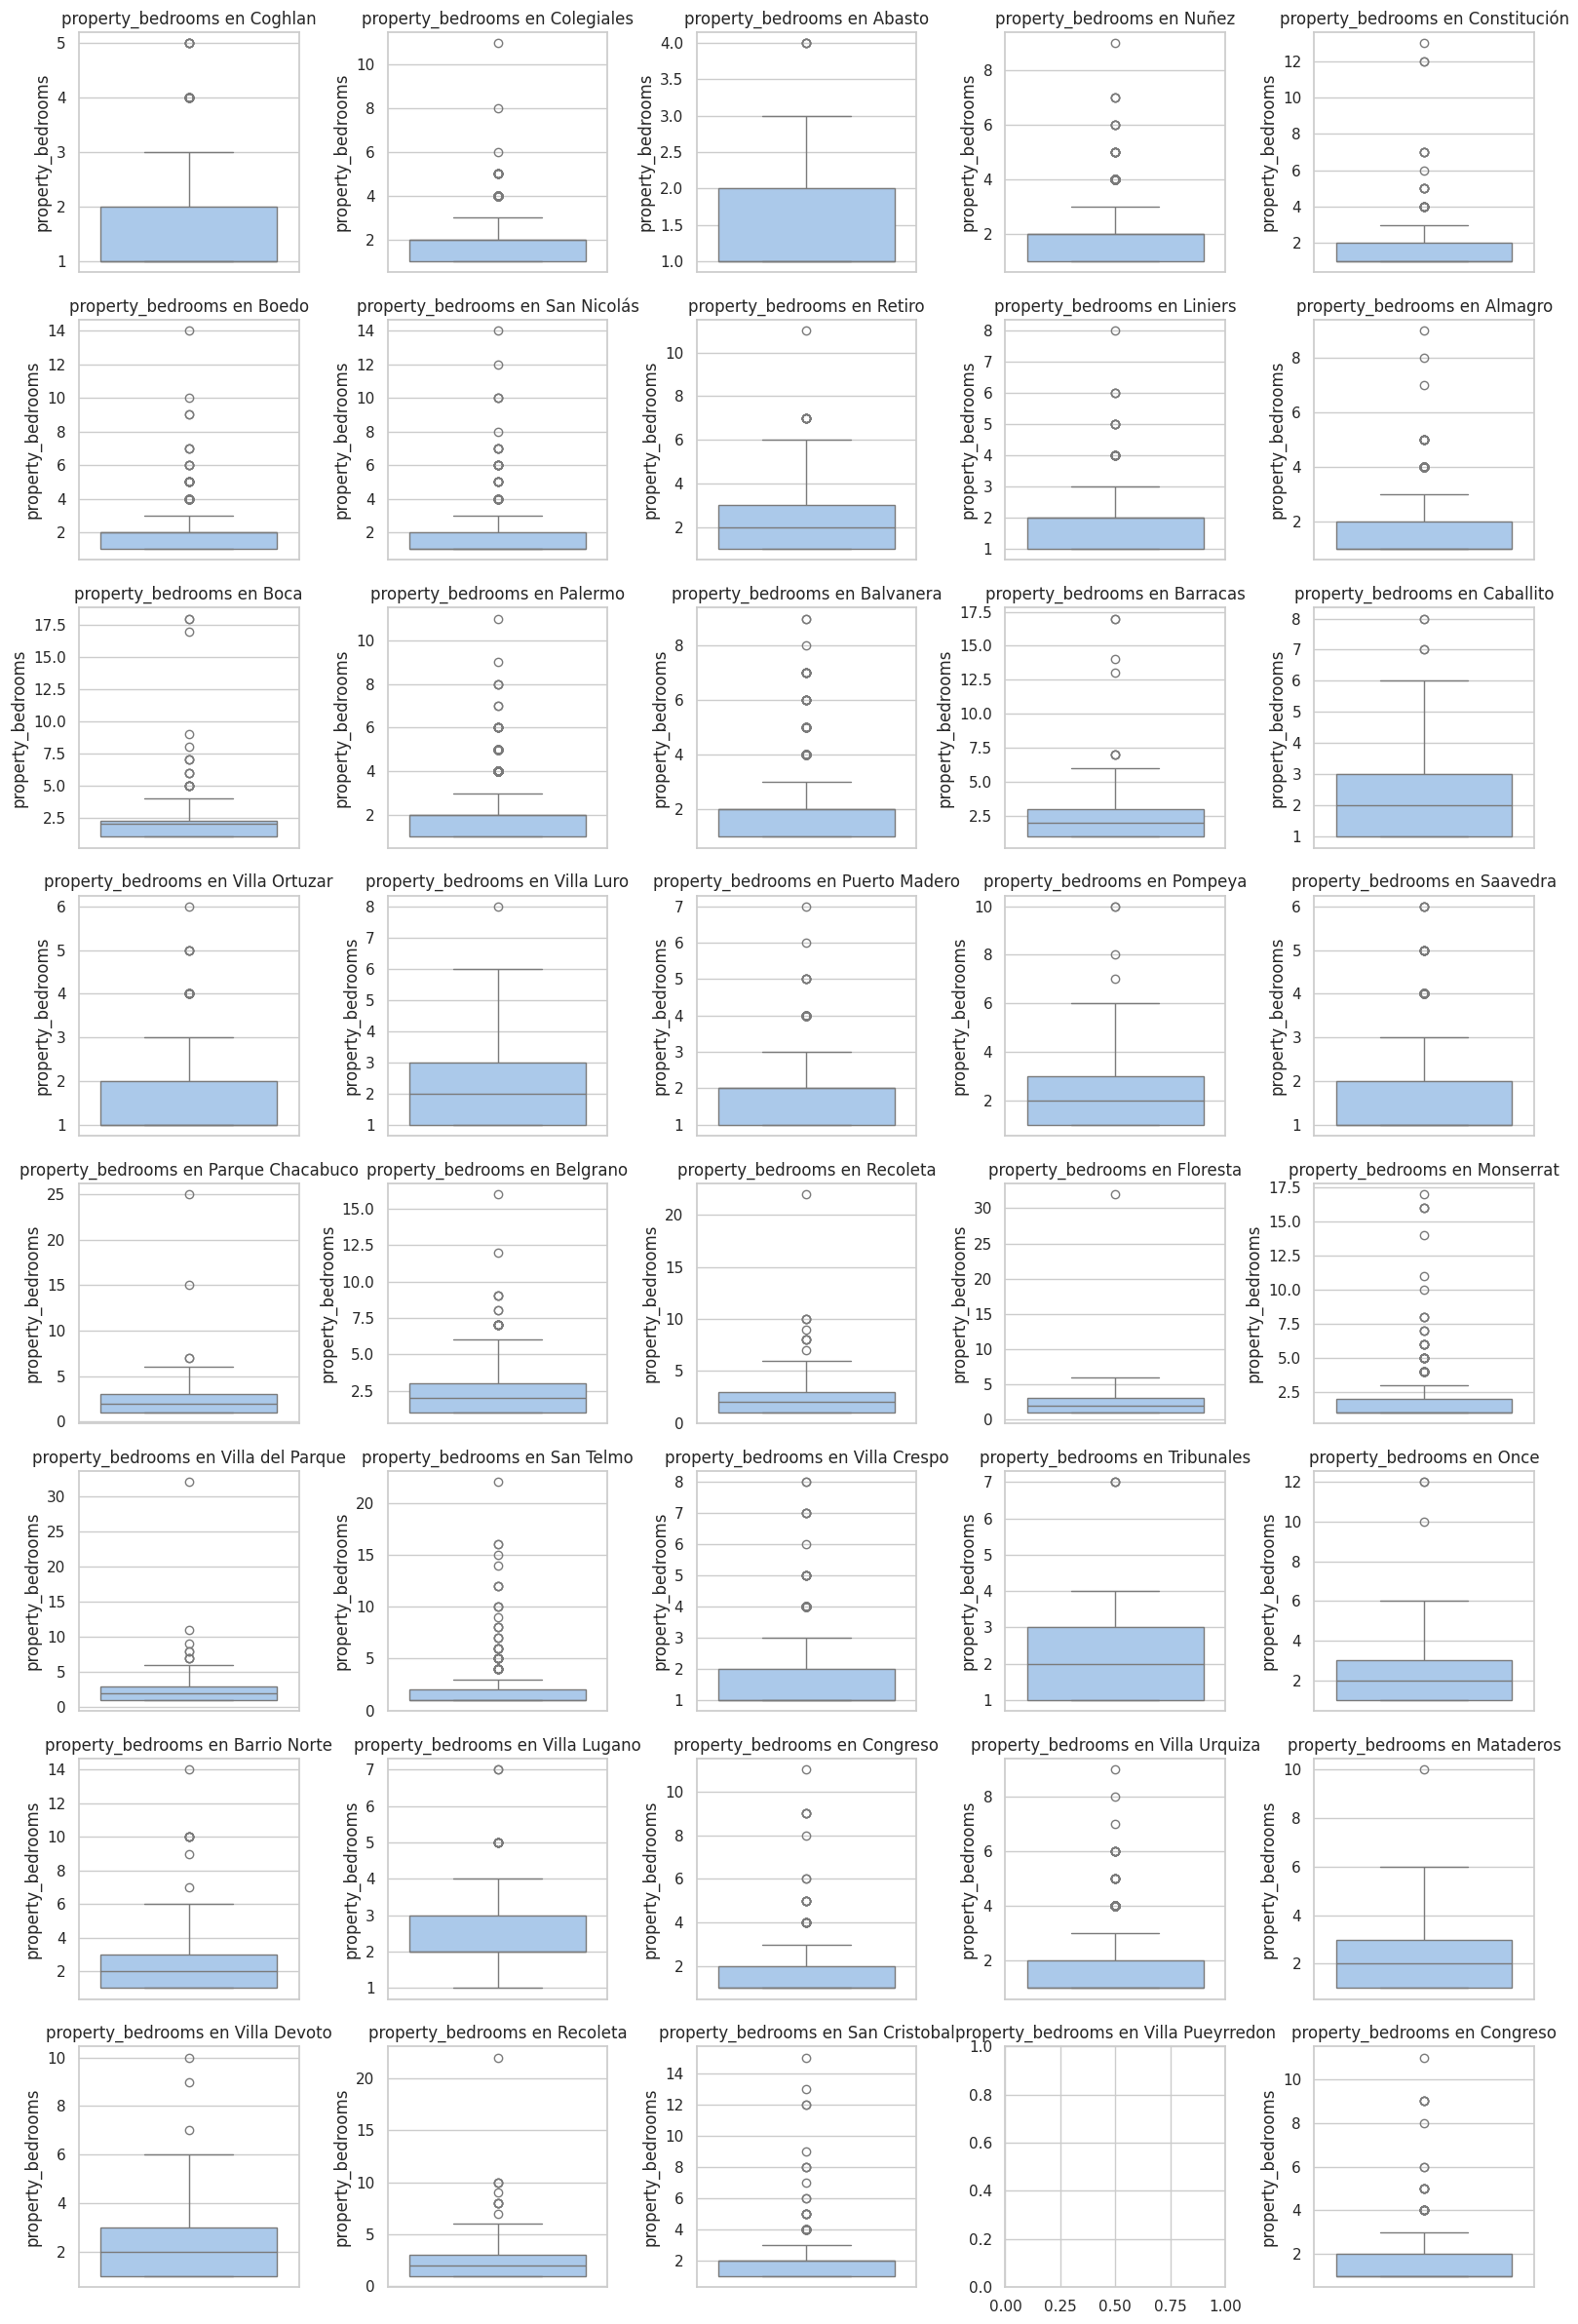

In [829]:
plot_por_barrio(ds_train, 'property_bedrooms')

Analizando los boxplot de la cantidad de habitaciones pero dividido según el barrio en el que se encuentra la propiedad, podemos ver aún teniendo en cuenta las variaciones, que aquellos casos de casas con más de 8 habitaciones son outliers extremos y decidimos normalizarlas utilizando una transformación logaritmica.

Nota: el limite intercuartil en general para la zona de CABA era 4, pero como vemos en barrios como Caballito esto se encuentra totalmente dentro de la norma.

In [830]:
ds_train.loc[ds_train['property_bedrooms'] > 7.0, 'property_bedrooms'] = np.log(ds_train['property_bedrooms'])

In [831]:
ds_train[ds_train['property_bedrooms'] > 6]

id  start_date    end_date created_on  \
351821  SioTWvNhCyTDPmU9CtHJSw==  2021-06-25  2021-07-04 2021-06-25   
448242  DtvwUdyN8mhShkCjkovMfg==  2021-12-16  2022-02-09 2021-12-16   
420396  O8oyYGBUdY3jPaEa1NK6Xg==  2021-12-01  2021-12-30 2021-12-01   
94758   IcX9fpFRmmNTKfmbAv3IUA==  2021-09-24  2022-02-09 2021-09-24   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   
...                          ...         ...         ...        ...   
378703  MY6zqzqyQR1/W31MWOg/uA==  2021-05-19  2021-06-05 2021-05-19   
251719  tkgMQvyN0MdOcGZnW/yx5Q==  2021-06-18  2021-11-04 2021-06-18   
72640   RBSIx9grSfooVB473NbCfA==  2021-05-29  2021-07-22 2021-05-29   
61528   KHwLuu0LRaR667XLg9rrBg==  2021-05-01  2021-05-26 2021-05-01   
285215  39gIlCwATjuInXStOisUeA==  2021-02-24  2021-03-01 2021-02-24   

          latitud   longitud       place_l3 property_type  property_rooms  \
351821 -34.615136 -58.376863      Monserrat          Casa             7.0   
448242 -34.635382 -58.355539           Boca            PH             8.0   
420396 -34.593316 -58.377201         Retiro  Departamento             9.0   
94758  -34.616128 -58.394715      Balvanera          Casa             8.0   
239181 -34.572554 -58.469842       Belgrano          Casa             8.0   
...           ...        ...            ...           ...             ...   
378703 -34.548947 -58.450237          Nuñez          Casa             7.0   
251719 -34.569861 -58.444716       Belgrano            PH            10.0   
72640  -34.602843 -58.386216    San Nicolás  Departamento             8.0   
61528  -34.595844 -58.447351   Villa Crespo          Casa             8.0   
285215 -34.610226 -58.360748  Puerto Madero  Departamento             9.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
351821                7.0                   258.0                     258.0   
448242                7.0                   395.0                     319.0   
420396                7.0                   380.0                     350.0   
94758                 7.0                   164.0                     143.0   
239181                7.0                   400.0                     400.0   
...                   ...                     ...                       ...   
378703                7.0                   501.0                     351.0   
251719                7.0                   714.0                     714.0   
72640                 7.0                   195.0                     190.0   
61528                 7.0                   244.0                     244.0   
285215                7.0                   448.0                     448.0   

        property_price  
351821        329000.0  
448242        135000.0  
420396        650000.0  
94758         215000.0  
239181        920000.0  
...                ...  
378703        900000.0  
251719        525000.0  
72640         198000.0  
61528         500000.0  
285215       2770000.0  

[97 rows x 13 columns]

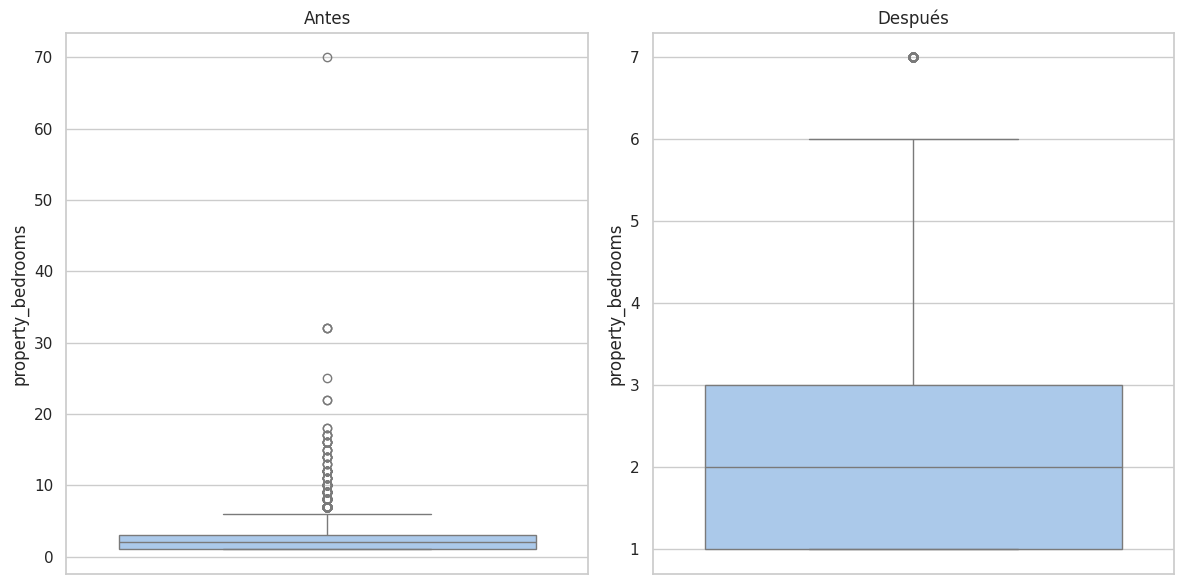

In [832]:
plot_comparativo(ds_atipicos, ds_train, 'property_bedrooms')

Podemos ver que se han solucionado la mayoría de las anomalías. Dejaremos las restantes (84 registros) para el análisis multivariado.

#### *Análisis según cantidad de ambientes (property_rooms)*

<Axes: ylabel='property_rooms'>

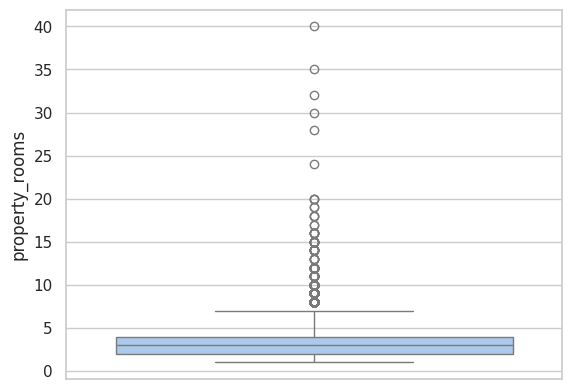

In [833]:
sns.boxplot(y=ds_train.property_rooms)

In [834]:
limite_rango_iq(ds_train, 'property_rooms')

(-1.0, 5.0)

El limite intercuartil superior es 5.0. Vemos que si bien hay muchos outliers por sobre el limite de 5 ambientes, esto se acentúa una vez que se superan los 20 ambientes.



In [835]:
# Observación anómala
outlier = ds_train[ds_train['property_rooms'] > 20]
outlier

id  start_date    end_date created_on  \
356618  +e6yeZZqYElYRYq4/cd9qg==  2021-11-18  2021-12-02 2021-11-18   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   
150885  X3WGOe/PrGS1u+xozM5elA==  2021-03-24  2021-06-05 2021-03-24   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
21009   bmop3OsDu5kJmbAVgJ5wzA==  2021-03-15  2021-06-05 2021-03-15   

          latitud   longitud          place_l3 property_type  property_rooms  \
356618 -34.588742 -58.422459           Palermo  Departamento            40.0   
389282 -34.570959 -58.458106          Belgrano          Casa            28.0   
150885 -34.642037 -58.438995  Parque Chacabuco  Departamento            35.0   
90004  -34.633236 -58.480313          Floresta            PH            32.0   
292167 -34.616487 -58.371596         San Telmo            PH            24.0   
21009  -34.616391 -58.456038         Caballito  Departamento            30.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
356618           3.000000                    75.0                      68.0   
389282           2.772589                   845.0                     845.0   
150885           3.218876                    37.0                      33.0   
90004            3.465736                   535.0                     435.0   
292167           3.091042                   800.0                     650.0   
21009            2.000000                    79.0                      79.0   

        property_price  
356618        145000.0  
389282        950000.0  
150885         67000.0  
90004         300000.0  
292167        350000.0  
21009         230000.0

Si bien los datos de habitaciones y ambientes no son posibles, por ahora no serán borrados ya que el resto (superficie cubierta, precio) parecen coherentes con el resto del dataset y pueden ser útiles.

Controlaremos según barrio.

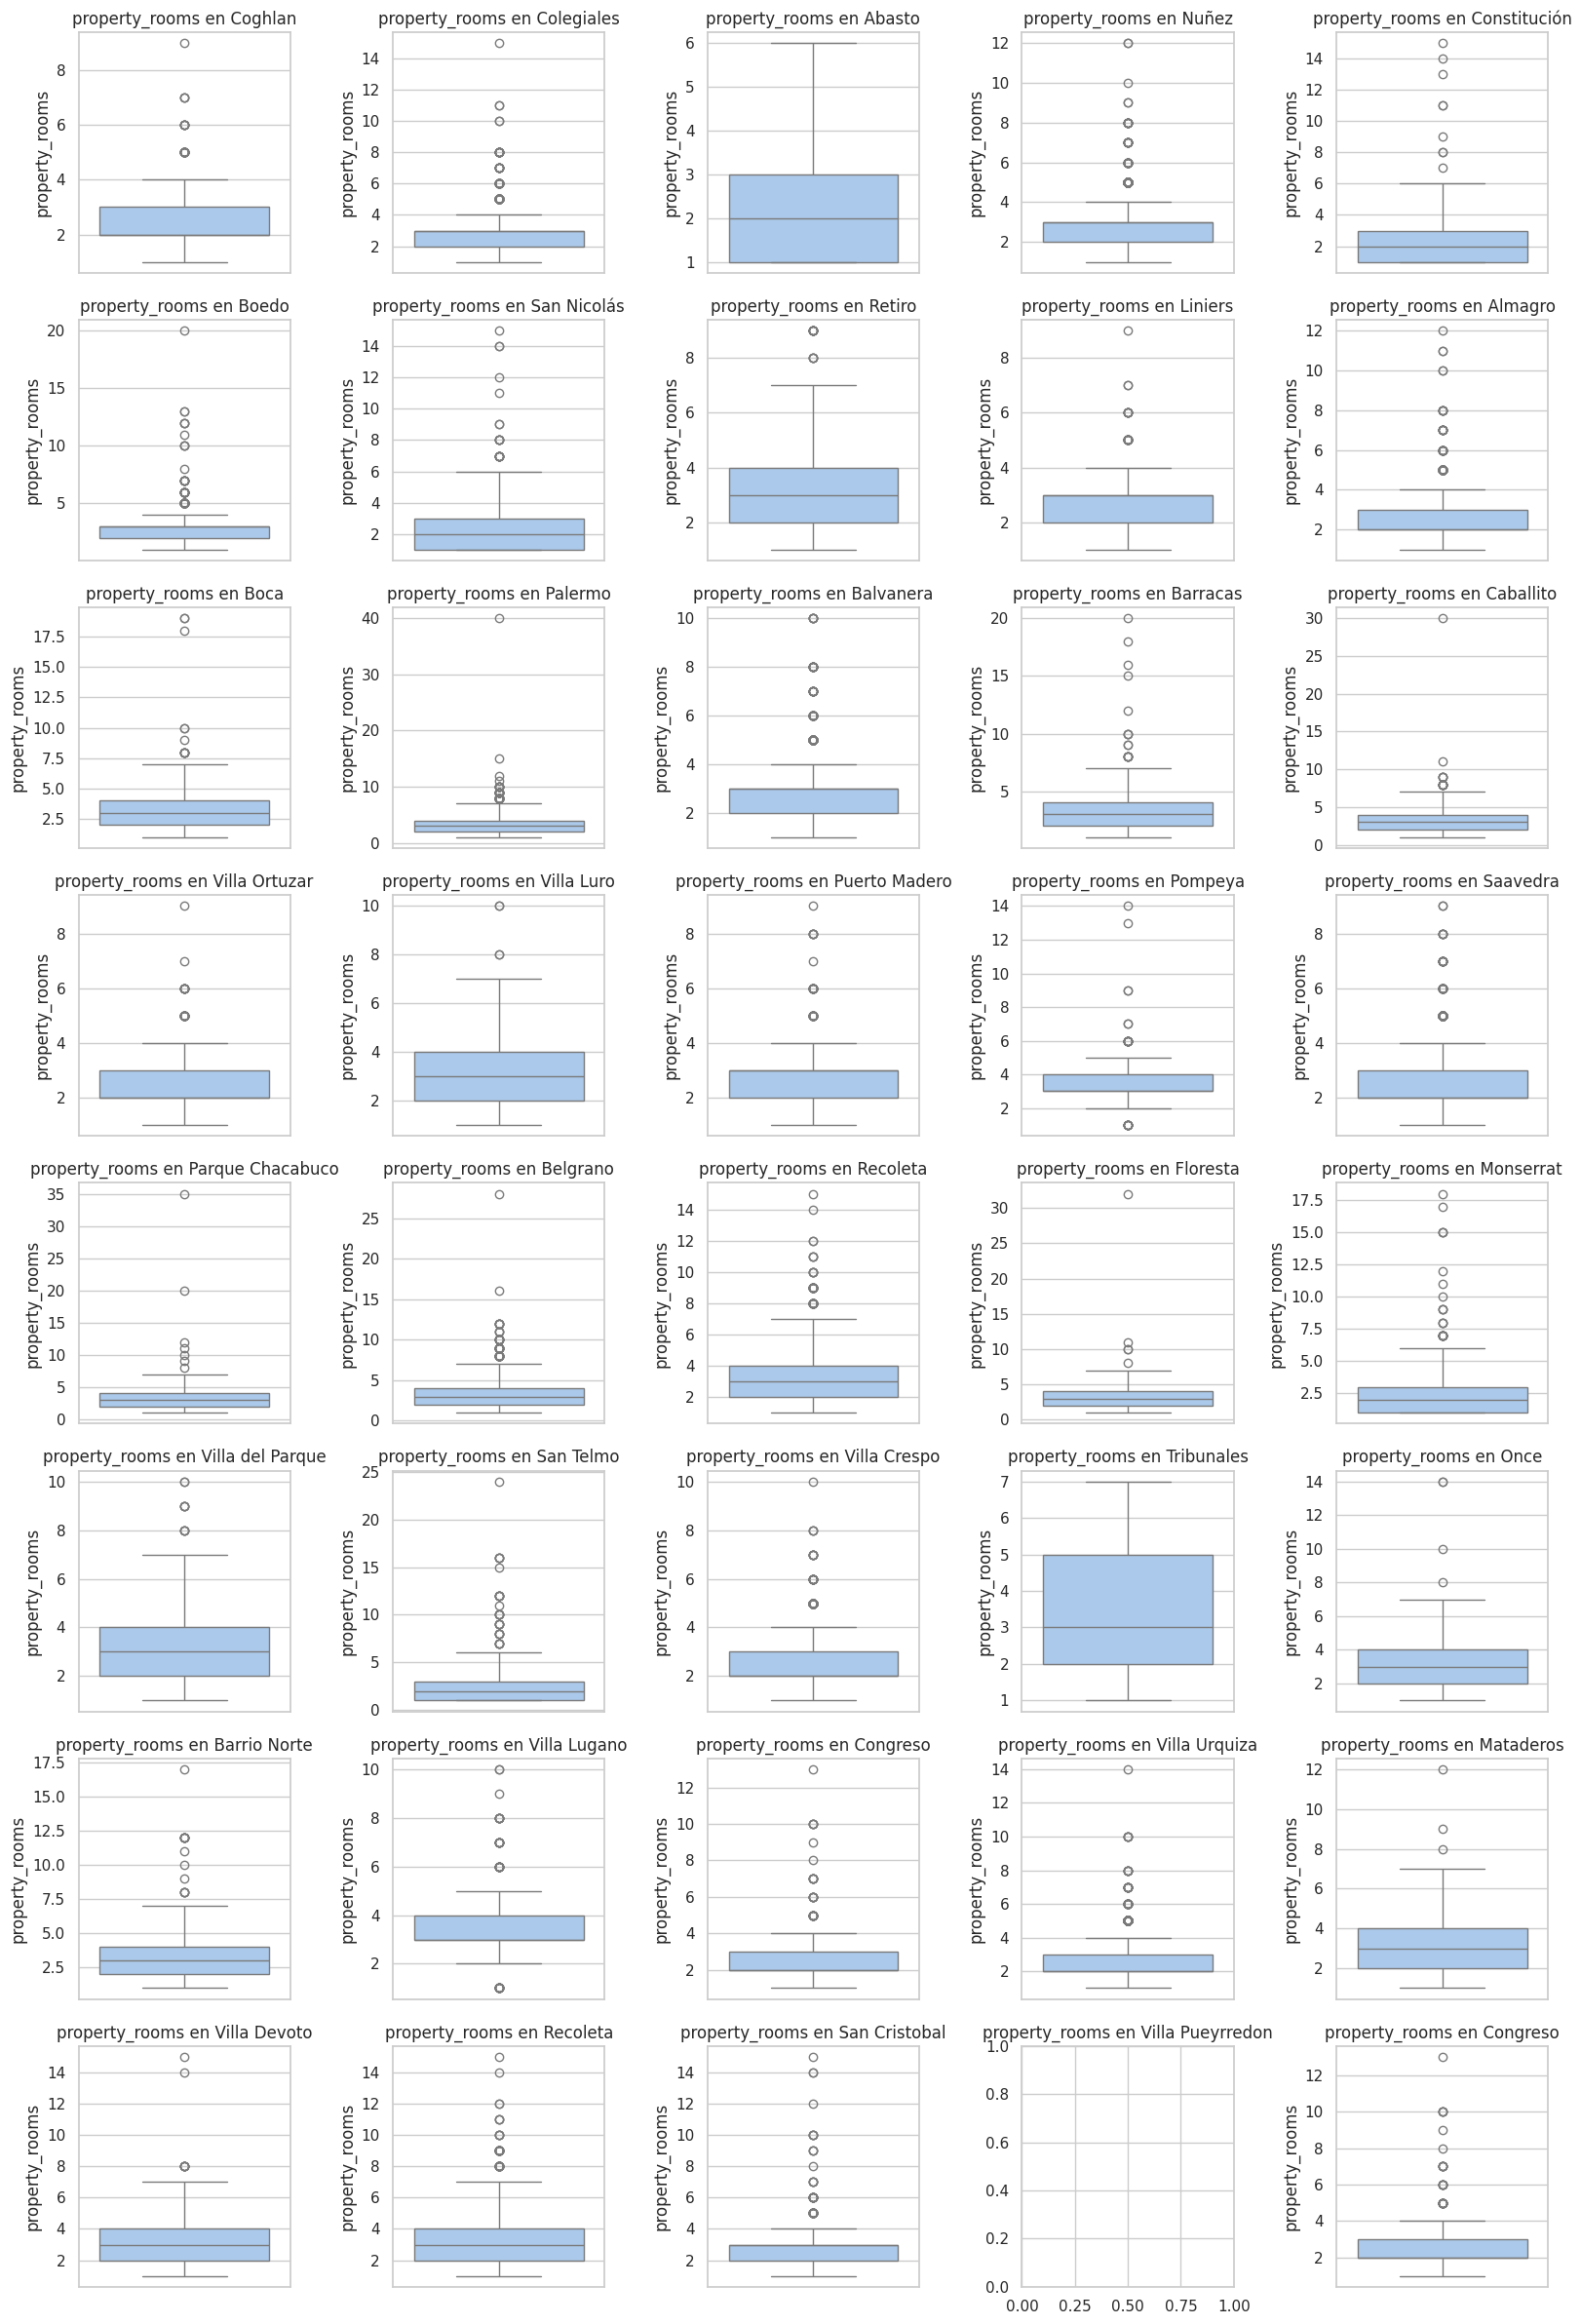

In [836]:
plot_por_barrio(ds_train, 'property_rooms')

Si bien nuestro límite intercuartil era de 5.0 vemos una tendencia un poco superior al ver los boxplot por barrio, así que realizaremos una corrección en aquellos registros atípicos que superen los 10 ambientes.

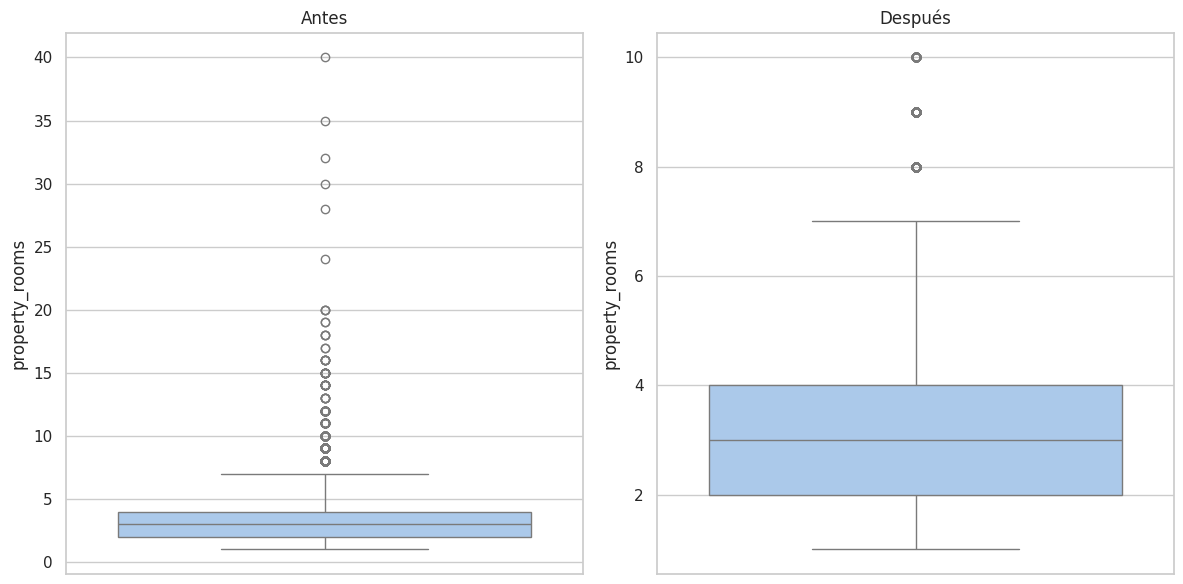

In [837]:
#Normalizacion logaritmica
ds_train.loc[ds_train['property_rooms'] > 10.0, 'property_rooms'] = np.log(ds_train['property_rooms'])

#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_rooms')

In [838]:
ds_train[(ds_train['property_rooms'] > 7.0)]

id  start_date    end_date created_on  \
253516  wuSXgx7IjeHfS7jONb6HcA==  2021-08-20  2022-01-27 2021-08-20   
170999  KlZw1lj+bU2Mg2arL5k50g==  2021-04-19  2021-06-05 2021-04-19   
253438  dSnRy/PkDo5KjZMIYSirQw==  2021-08-20  2022-01-27 2021-08-20   
260380  WoyTUcPl6DweuVhiaE4vgQ==  2021-04-14  2021-05-06 2021-04-14   
251696  IZc9KxIdx9KTd6qtQnnu/g==  2021-06-18  2022-02-09 2021-06-18   
...                          ...         ...         ...        ...   
426989  jgubqOHhytMJav8CBkqrKw==  2021-12-16  2022-02-09 2021-12-16   
40268   X6juWRNE+c/E7vsCzQiO9w==  2021-07-19  2021-09-07 2021-07-19   
61528   KHwLuu0LRaR667XLg9rrBg==  2021-05-01  2021-05-26 2021-05-01   
285215  39gIlCwATjuInXStOisUeA==  2021-02-24  2021-03-01 2021-02-24   
251730  vXmGzBZMbI0esKoned0qmA==  2021-06-18  2021-07-17 2021-06-18   

          latitud   longitud       place_l3 property_type  property_rooms  \
253516 -34.571517 -58.467665       Belgrano          Casa             8.0   
170999 -34.578002 -58.409141        Palermo  Departamento             8.0   
253438 -34.547416 -58.460177          Nuñez          Casa             8.0   
260380 -34.578491 -58.408168        Palermo  Departamento             8.0   
251696 -34.632753 -58.423905          Boedo            PH             8.0   
...           ...        ...            ...           ...             ...   
426989 -34.650824 -58.392362       Barracas            PH            10.0   
40268  -34.573576 -58.467816       Belgrano          Casa             9.0   
61528  -34.595844 -58.447351   Villa Crespo          Casa             8.0   
285215 -34.610226 -58.360748  Puerto Madero  Departamento             9.0   
251730 -34.614835 -58.392287      Balvanera            PH            10.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
253516                6.0                   367.0                     298.0   
170999                5.0                   316.0                     315.0   
253438                4.0                   380.0                     300.0   
260380                4.0                   366.0                     366.0   
251696                6.0                   204.0                     185.0   
...                   ...                     ...                       ...   
426989                5.0                   325.0                     235.0   
40268                 6.0                   600.0                     600.0   
61528                 7.0                   244.0                     244.0   
285215                7.0                   448.0                     448.0   
251730                4.0                   461.0                     375.0   

        property_price  
253516        930000.0  
170999       1200000.0  
253438        675000.0  
260380       1600000.0  
251696        220000.0  
...                ...  
426989        143000.0  
40268        2200000.0  
61528         500000.0  
285215       2770000.0  
251730        590000.0  

[495 rows x 13 columns]

Tenemos 502 valores por sobre el máximo marcado por el bigote en el boxplot actual y que pueden ser considerados outliers. Reveeremos estos valores en otros análisis.

#### *Análisis según precio de la propiedad (property_price)*

<Axes: ylabel='property_price'>

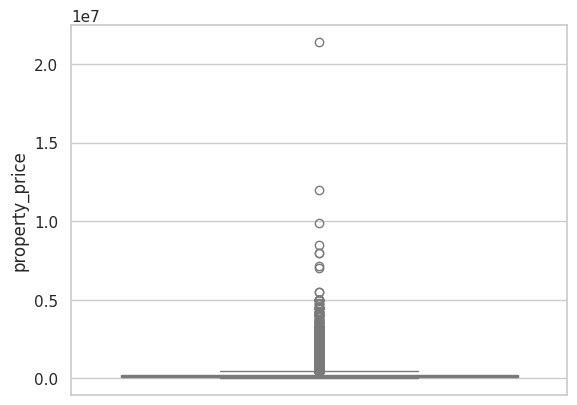

In [839]:
sns.boxplot(y=ds_train.property_price)

In [840]:
limite_rango_iq(ds_train, 'property_price')

(-115000.0, 305000.0)

Primero analizamos las anomalías más extremas, valores mayores o iguales a 8M.

In [841]:
# Observación anómala
outlier = ds_train[ds_train['property_price'] >= 8000000]
outlier

id  start_date    end_date created_on  \
60073   uoM9HDKq3jZKQKgHXTIGkg==  2021-01-25  2022-05-13 2021-01-25   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   
156777  8ChrVZoOYyEqAJMIP/pXoQ==  2021-02-17  2021-02-19 2021-02-17   
248285  I3+CMvLB+tmeXtDg3XmSBA==  2021-09-13  2021-09-16 2021-09-13   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   

          latitud   longitud     place_l3 property_type  property_rooms  \
60073  -34.616044 -58.458621    Caballito  Departamento             3.0   
85725  -34.572494 -58.462433     Belgrano          Casa             5.0   
156777 -34.608300 -58.371200    Monserrat          Casa             3.0   
248285 -34.596801 -58.383768     Recoleta  Departamento             8.0   
148534 -34.565947 -58.442326     Belgrano          Casa             9.0   
1140   -34.605781 -58.376705  San Nicolás  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
60073                 2.0                    68.0                      64.0   
85725                 4.0                  3197.0                    3367.0   
156777                2.0                   225.0                      93.0   
248285                2.0                   900.0                     150.0   
148534                5.0                  1763.0                    1763.0   
1140                  2.0                 10500.0                   10500.0   

        property_price  
60073       21400000.0  
85725       12000000.0  
156777       8500000.0  
248285       8000000.0  
148534       8000000.0  
1140         9900000.0

Buscando propiedades actualmente en venta en barrios y tamaños similares, parecería haber un error. Sin embargo, incluso haciendo un reducción de un decimo (valores más coherentes para esos varrios y tamaños de casas), estaríamos por sobre el límite intercuartil, asi que por ahora no haremos transformaciones.

Analicemos según barrio:

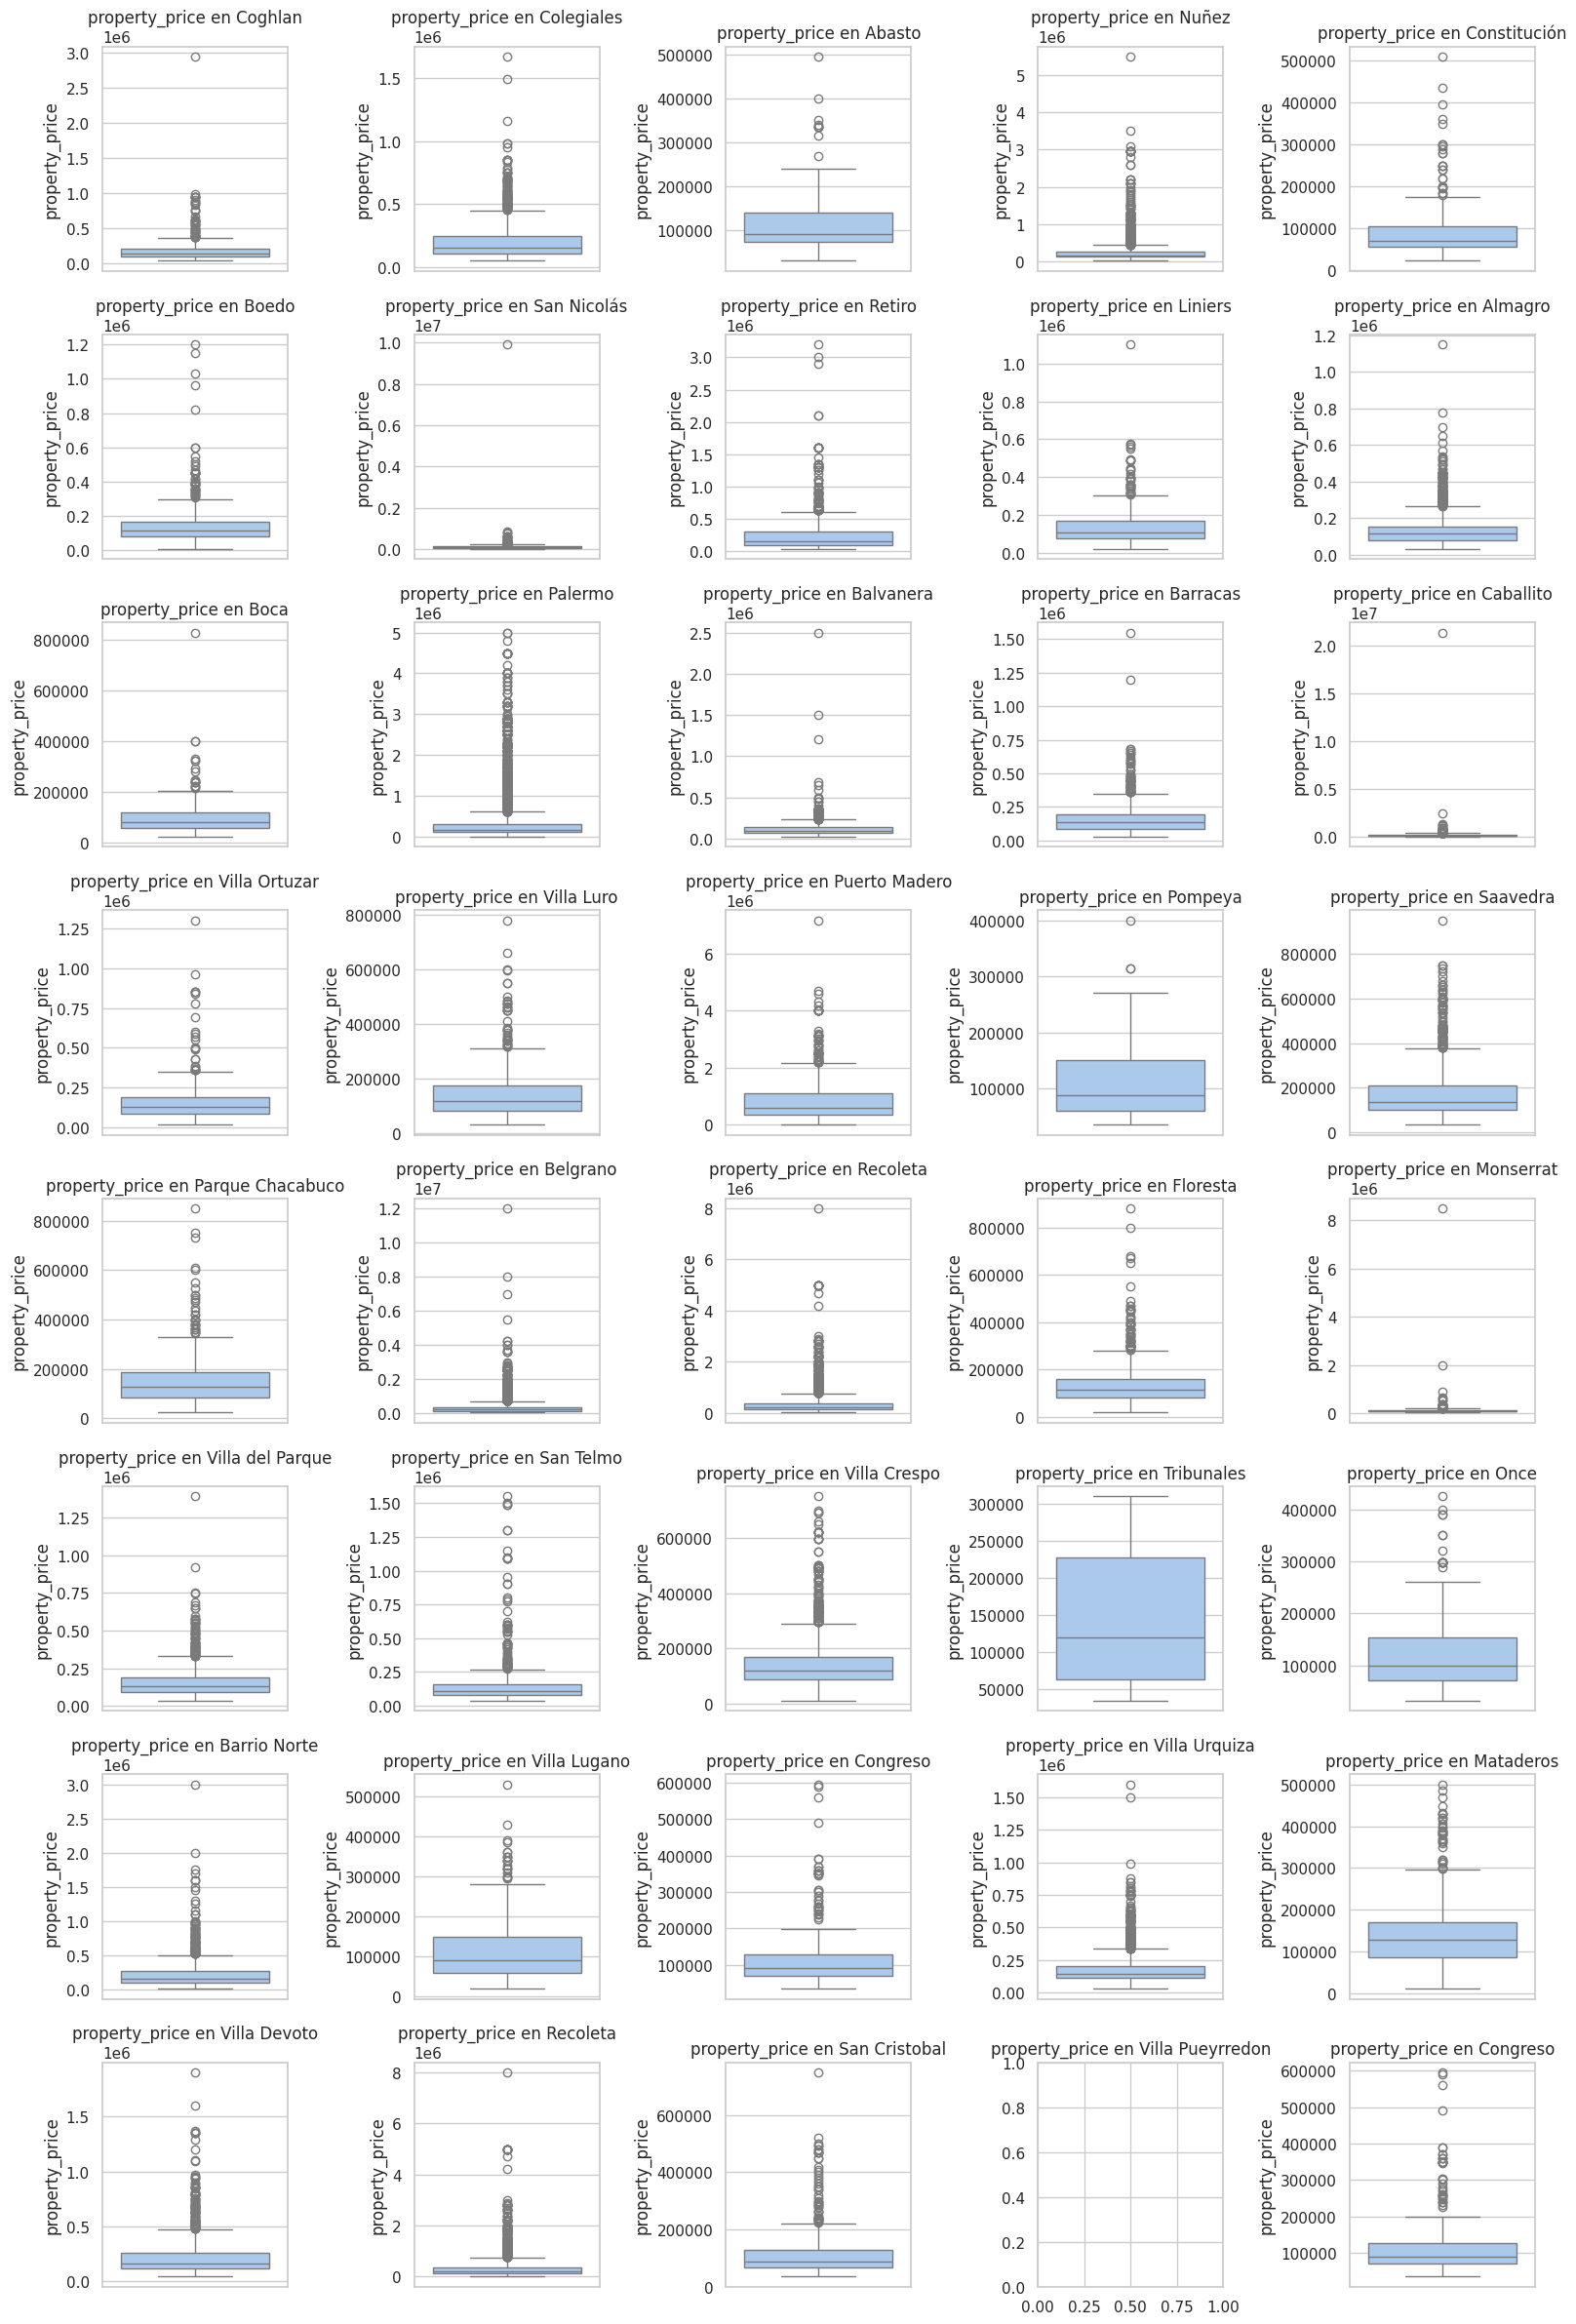

In [842]:
plot_por_barrio(ds_train, 'property_price')

Hasta el momento, este el analisis según barrio menos homogéneo. Si tomamos el limite superior intercuartil general (305m), se distorcionarían totalmente los datos de barrios como Palermo y Puerto Madero. Teniendo en cuenta lo relevante que es éste dato a la hora de que se establezca el precio de una propiedad, solo trabajaremos con los outliers que sean extremos en el contexto de cada barrio (analisis multivariado).

*Análisis según superficie cubierta (property_surface_covered)*

<Axes: ylabel='property_surface_covered'>

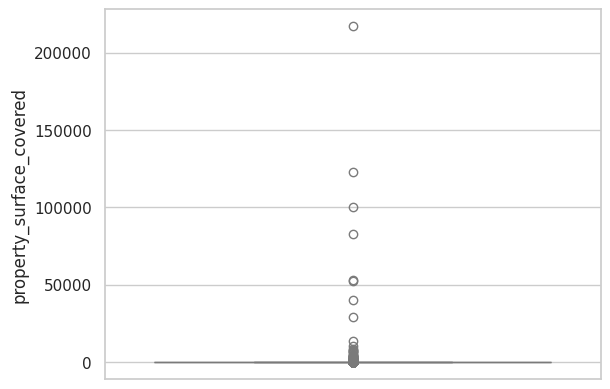

In [843]:
sns.boxplot(y=ds_train.property_surface_covered)

In [844]:
limite_rango_iq(ds_train, 'property_surface_covered')

(-32.0, 112.0)

In [845]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_covered'] <= 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [846]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_covered'].idxmin()
ds_train.loc[min_surface_index]

id                          YNuqkhLF1npCRPI60DbVkA==
start_date                                2021-07-16
end_date                                  9999-12-31
created_on                       2021-07-16 00:00:00
latitud                                   -34.589748
longitud                                  -58.439341
place_l3                                Villa Crespo
property_type                           Departamento
property_rooms                                   1.0
property_bedrooms                                1.0
property_surface_total                          26.0
property_surface_covered                         1.0
property_price                               60000.0
Name: 108954, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [847]:
ds_train[ds_train['property_surface_covered'] < 15]

id  start_date    end_date created_on  \
376503  cb7SZC3hZE8/d49Xm45e0Q==  2021-03-18  2021-06-05 2021-03-18   
151947  xbz2In0pyB3kabcr2bN7gQ==  2021-08-05  2021-08-28 2021-08-05   
149693  SXOEETY9QiPb9DxMopgwuw==  2021-05-12  2021-05-18 2021-05-12   
131323  O49dzPxW9gyX0Gxky1iEvw==  2021-05-27  2021-06-05 2021-05-27   
108954  YNuqkhLF1npCRPI60DbVkA==  2021-07-16  9999-12-31 2021-07-16   
...                          ...         ...         ...        ...   
7218    Szu4ImXLR6ZG3kQu+dyyqQ==  2021-02-09  9999-12-31 2021-02-09   
114731  xWAuT6U7rrLeSjafz3v4Jg==  2021-12-07  2022-01-27 2021-12-07   
259169  Tw+6aPmyc1RSYopYTeLwfQ==  2021-12-13  2022-01-27 2021-12-13   
119209  4zRZ5LRtr4rLWV4AYj1pOA==  2021-03-25  2021-06-05 2021-03-25   
139853  KkglrLcHnd3LboAuACi5Ew==  2021-07-15  2021-08-31 2021-07-15   

          latitud   longitud          place_l3 property_type  property_rooms  \
376503 -34.581372 -58.408388           Palermo  Departamento             1.0   
151947 -34.589272 -58.407453           Palermo  Departamento             1.0   
149693 -34.594682 -58.442248      Villa Crespo  Departamento             1.0   
131323 -34.580461 -58.425498           Palermo  Departamento             1.0   
108954 -34.589748 -58.439341      Villa Crespo  Departamento             1.0   
...           ...        ...               ...           ...             ...   
7218   -34.640909 -58.427003             Boedo  Departamento             1.0   
114731 -34.561966 -58.482349           Coghlan  Departamento             1.0   
259169 -34.606526 -58.447235         Caballito  Departamento             1.0   
119209 -34.612388 -58.498780          Floresta  Departamento             1.0   
139853 -34.614544 -58.479047  Villa del Parque  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
376503                1.0                    35.0                       6.0   
151947                1.0                    34.0                       5.0   
149693                1.0                    38.0                       8.0   
131323                1.0                    36.0                       6.0   
108954                1.0                    26.0                       1.0   
...                   ...                     ...                       ...   
7218                  1.0                    30.0                       2.0   
114731                1.0                    35.0                       6.0   
259169                1.0                    39.0                       9.0   
119209                1.0                    35.0                       6.0   
139853                1.0                    29.0                       1.0   

        property_price  
376503        105000.0  
151947         89900.0  
149693        130000.0  
131323        110000.0  
108954         60000.0  
...                ...  
7218           52000.0  
114731         90000.0  
259169         87400.0  
119209         58800.0  
139853         54000.0  

[469 rows x 13 columns]

Tenemos 147 registros de propiedades que tienen menos de 15m^2 cubiertos, y si bien según código urbanistico de la Ciudad de Buenos Aires no permite departamentos tan pequeños, sabemos que eso puede infringirse. Bajo estos supuestos, y viendo los registros que aparecen, vamos a reemplazar aquellos con superficies demasiado pequeñas (menores a 10m^2) por la superficie total.

In [848]:
# Reemplazamos el valor de superficie cubierta por el de superficie total cuando el valor sea menor a 10
ds_train.loc[ds_train['property_surface_covered'] < 10, 'property_surface_covered'] = ds_train.loc[ds_train['property_surface_covered'] < 10, 'property_surface_total']

In [849]:
ds_train[ds_train['property_surface_covered'] < 15]

id  start_date    end_date created_on  \
370094  o6TLZpplHdiLPy5S++/E9A==  2021-11-08  2022-02-13 2021-11-08   
422646  NIpeKBsNOAzkqfUmqBVVfQ==  2021-07-07  9999-12-31 2021-07-07   
31234   D89LpK877Q26kquSS5Pnnw==  2021-03-29  2021-04-15 2021-03-29   
240489  VhBo2l75aL5qWY27RwStmQ==  2021-05-21  2021-06-05 2021-05-21   
433816  bMKj5b4SwMcfYMGFDj/Bfg==  2021-05-04  2021-06-05 2021-05-04   
...                          ...         ...         ...        ...   
27553   JFUMI6oN7fadln0WnnGWLw==  2021-12-03  2022-01-27 2021-12-03   
191521  7dcJHxrI8S72CowP2IuzPQ==  2021-11-01  2022-01-27 2021-11-01   
370055  zqHmuuNUpGM2iURt+BHIRA==  2021-11-08  2022-02-16 2021-11-08   
260339  gm26RJKnbjr6U727uup+tA==  2021-04-14  2021-04-15 2021-04-14   
322712  lC4AC+ibejPz5mSLe6WgMQ==  2021-06-15  2021-11-04 2021-06-15   

          latitud   longitud       place_l3 property_type  property_rooms  \
370094 -34.579239 -58.430669        Palermo  Departamento             1.0   
422646 -34.567988 -58.476837  Villa Urquiza  Departamento             1.0   
31234  -34.555519 -58.462647       Belgrano  Departamento             1.0   
240489 -34.597379 -58.441693   Villa Crespo  Departamento             1.0   
433816 -34.589162 -58.413435        Palermo  Departamento             1.0   
...           ...        ...            ...           ...             ...   
27553  -34.581103 -58.432997        Palermo  Departamento             1.0   
191521 -34.578796 -58.431967        Palermo  Departamento             1.0   
370055 -34.578574 -58.437570        Palermo  Departamento             1.0   
260339 -34.581569 -58.443049        Palermo  Departamento             1.0   
322712 -34.543584 -58.465675          Nuñez  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
370094                1.0                    41.0                      10.0   
422646                1.0                    45.0                      13.0   
31234                 1.0                    42.0                      11.0   
240489                1.0                    43.0                      12.0   
433816                1.0                    42.0                      11.0   
...                   ...                     ...                       ...   
27553                 1.0                    44.0                      12.0   
191521                1.0                    41.0                      10.0   
370055                1.0                    44.0                      12.0   
260339                1.0                    45.0                      13.0   
322712                1.0                    46.0                      14.0   

        property_price  
370094        130000.0  
422646        125000.0  
31234         104000.0  
240489        118000.0  
433816        155000.0  
...                ...  
27553         136000.0  
191521         85000.0  
370055        140000.0  
260339        140000.0  
322712        175000.0  

[80 rows x 13 columns]

Ahora nos quedan 84 outliers.

In [850]:
ds_train[ds_train['property_surface_covered'] > 15000]

id  start_date    end_date created_on  \
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
405324  tHz32dZ72wYshPnoABftrg==  2021-01-07  2021-06-02 2021-01-07   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
199905  EDZUWORq83zRgdk9Zqlv+A==  2021-07-25  9999-12-31 2021-07-25   
372779  XzTb7kTEpmAKiyhEGSWz4A==  2021-08-24  2021-09-03 2021-08-24   

          latitud   longitud          place_l3 property_type  property_rooms  \
117835 -34.550093 -58.483034          Saavedra  Departamento        2.000000   
405324 -34.569963 -58.481658     Villa Urquiza            PH        4.000000   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa        2.995732   
72316  -34.578917 -58.429373           Palermo  Departamento        2.000000   
352883 -34.550093 -58.483034          Saavedra  Departamento        1.000000   
106598 -34.587320 -58.401556      Barrio Norte  Departamento        2.000000   
199905 -34.604362 -58.392366      Barrio Norte  Departamento        4.000000   
372779 -34.555278 -58.459786          Belgrano  Departamento        4.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
117835            1.00000                 43086.0                   40038.0   
405324            3.00000                123000.0                  123000.0   
1932              2.70805                185668.0                  217000.0   
72316             1.00000                 61130.0                   53030.0   
352883            1.00000                 29064.0                   29064.0   
106598            1.00000                 56740.0                   52540.0   
199905            3.00000                    83.0                   83000.0   
372779            3.00000                100068.0                  100051.0   

        property_price  
117835        114000.0  
405324        165000.0  
1932          250000.0  
72316         225000.0  
352883         87400.0  
106598        175000.0  
199905        155000.0  
372779        420000.0

Los casos de propiedades con superficie cubierta mayor a 15000, parecen ser errores de escala que pueden solucionarse facilmente.

In [851]:
condition = ds_train['property_surface_covered'] > 15000
ds_train.loc[condition, 'property_surface_covered'] /= 1000

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 15000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [852]:
ds_train[ds_train['property_surface_covered'] > 4000]

id  start_date    end_date created_on  \
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
459841  9aQHQRqWMburSn+z+Qt5aQ==  2021-01-05  2021-01-09 2021-01-05   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
398069  Z41Yr6x3GUjyoxu+Afv4og==  2021-02-13  2021-03-18 2021-02-13   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
94789   jXPtdq0ibrnXyePLhTi27g==  2021-09-24  2021-09-26 2021-09-24   
459842  Y4PuRUaAW17tsLGwFTukhA==  2021-01-05  2021-01-09 2021-01-05   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   

          latitud   longitud       place_l3 property_type  property_rooms  \
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
459841 -34.627876 -58.437996      Caballito  Departamento             3.0   
1140   -34.605781 -58.376705    San Nicolás  Departamento             4.0   
398069 -34.558309 -58.459923       Belgrano  Departamento             2.0   
459849 -34.628282 -58.437803      Caballito  Departamento             3.0   
94789  -34.614279 -58.361092      Caballito  Departamento             2.0   
459842 -34.628397 -58.437706      Caballito  Departamento             3.0   
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
313745                2.0                  8988.0                    7454.0   
459841                2.0                  7153.0                    7153.0   
1140                  2.0                 10500.0                   10500.0   
398069                1.0                  6470.0                    4664.0   
459849                2.0                  7720.0                    5970.0   
94789                 1.0                  5312.0                    4809.0   
459842                2.0                  8136.0                    6472.0   
459847                3.0                 18096.0                    8568.0   
264624                4.0                 14744.0                   13717.0   
405272                3.0                  8306.0                    7755.0   

        property_price  
313745        125000.0  
459841        177807.0  
1140         9900000.0  
398069        149900.0  
459849        167894.0  
94789         145000.0  
459842        203550.0  
459847        324558.0  
264624        330000.0  
405272        129000.0

Mismo que con las propiedades con superficie cubierta mayor a 5000, parece ser un problema de escala.

In [853]:
condition = ds_train['property_surface_covered'] > 4000
ds_train.loc[condition, 'property_surface_covered'] /= 100

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 4000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [854]:
ds_train[ds_train['property_surface_covered'] > 1100]

id  start_date    end_date created_on  \
177140  KVFit7mVm+epRM497KAchw==  2021-03-23  2021-06-05 2021-03-23   
165965  NzYulXk9Ddrc+qQoqAAGRw==  2021-04-30  2021-06-05 2021-04-30   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   
293109  tB9+CF2yPvyRqYvdI5wVqg==  2021-02-23  2021-06-25 2021-02-23   
51748   DGUIqrE5dSAcW7/SkUWaQA==  2021-06-23  2021-06-28 2021-06-23   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
374752  lVGHqc/czs40cpT7bW/dZg==  2021-10-13  2022-01-27 2021-10-13   
187888  Fm8kbPskFOK8xGRsNuCvWQ==  2021-06-05  2021-06-13 2021-06-05   
104177  rGOjA8tJXYsGapcTNwIKQA==  2021-05-28  2021-06-13 2021-05-28   
264972  d99ugnqvWTu/psmVhGYVGw==  2021-11-19  2022-01-27 2021-11-19   
263173  YBglCjqyN6JqZ19HsNlLcQ==  2021-02-26  2021-03-27 2021-02-26   
354376  oSruKb4+uOYztGpv3h5FKA==  2021-11-04  2022-01-27 2021-11-04   
311702  BrohyhZSUQXAX3HqkGGT+w==  2021-01-03  2021-01-08 2021-01-03   
177181  q6PytfvCIgQ9xOWk3o+m1A==  2021-03-23  2021-06-05 2021-03-23   
438160  mzH1lMHi7l9z9MTU0eMRVg==  2021-10-27  2022-01-04 2021-10-27   

          latitud   longitud          place_l3 property_type  property_rooms  \
177140 -34.627279 -58.373637          Barracas          Casa        2.772589   
165965 -34.557754 -58.471497           Coghlan          Casa        3.000000   
85725  -34.572494 -58.462433          Belgrano          Casa        5.000000   
293109 -34.603310 -58.419520           Almagro  Departamento        3.000000   
51748  -34.608698 -58.391820         Balvanera  Departamento       10.000000   
148534 -34.565947 -58.442326          Belgrano          Casa        9.000000   
374752 -34.609391 -58.376433         Monserrat          Casa       10.000000   
187888 -34.606771 -58.502277  Villa del Parque  Departamento        2.000000   
104177 -34.603992 -58.500042  Villa del Parque  Departamento        1.000000   
264972 -34.613827 -58.373096         San Telmo          Casa        3.000000   
263173 -34.557749 -58.471384          Belgrano          Casa        8.000000   
354376 -34.579394 -58.453519        Colegiales  Departamento        3.000000   
311702 -34.609829 -58.385083         Monserrat  Departamento        2.000000   
177181 -34.626697 -58.373873         San Telmo          Casa        2.772589   
438160 -34.630704 -58.400901  Parque Patricios  Departamento        1.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
177140           2.639057                  2500.0                    2500.0   
165965           2.000000                  2266.0                    2266.0   
85725            4.000000                  3197.0                    3367.0   
293109           2.000000                  5239.0                    3796.0   
51748            5.000000                  1151.0                    1212.0   
148534           5.000000                  1763.0                    1763.0   
374752           7.000000                  3048.0                    2308.0   
187888           1.000000                  3425.0                    3425.0   
104177           1.000000                  3623.0                    3615.0   
264972           2.000000                  1993.0                    1900.0   
263173           2.079442                  2204.0                    2204.0   
354376           2.000000                    41.0                    3837.0   
311702           1.000000                  3939.0                    3939.0   
177181           2.639057                  2500.0                    2500.0   
438160           1.000000                    31.0                    2700.0   

        property_price  
177140       1550000.0  
165965       2950000.0  
85725       12000000.0  
293109        119000.0  
51748        1500000.0  
148534       8000000.0  
374752       1985000.0  
187888         75000.0  
104177        110000.0  
264972       1150000.0  
263173       1400000.0  
354376         83000.0  
311702         64000.0

Entre las anomalías que persisten parecería haber un caso de error de escala. A su vez, en los casos donde las habitaciones son regulares (<=5.0) haremos una corrección logaritmica.

In [855]:
# Corección de error de tipeo/escala
ds_train.loc[ds_train['id'] == 'mzH1lMHi7l9z9MTU0eMRVg==', 'property_surface_covered'] /= 100
# Corrección logaritmica
ds_train.loc[(ds_train['property_bedrooms'] <= 5.0) & (ds_train['property_surface_covered'] > 1100), 'property_surface_covered'] = np.log(ds_train['property_surface_covered'])



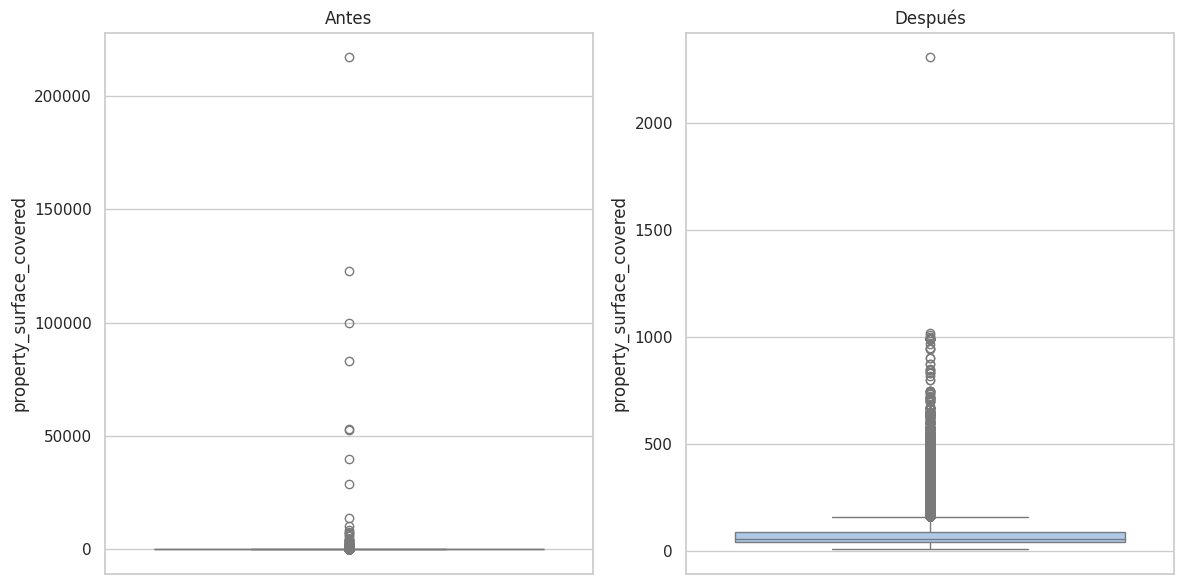

In [856]:
#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_surface_covered')

#### *Análisis según superficie total (property_surface_total)*



<Axes: ylabel='property_surface_total'>

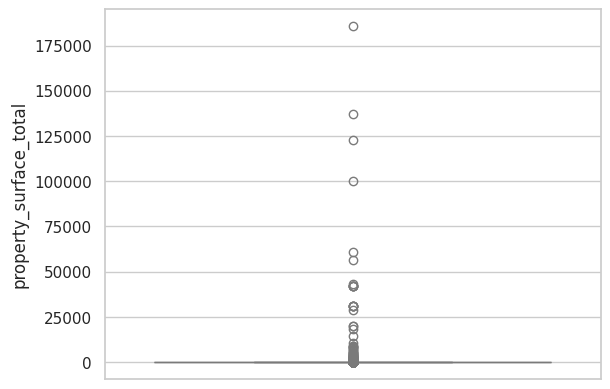

In [857]:
sns.boxplot(y=ds_train.property_surface_total)

In [858]:
limite_rango_iq(ds_train, 'property_surface_total')

(-45.0, 135.0)

In [859]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_total'] < 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [860]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_total'].idxmin()
ds_train.loc[min_surface_index]

id                          4jwFTdGy7N11fF14hLplcw==
start_date                                2021-05-17
end_date                                  2021-06-05
created_on                       2021-05-17 00:00:00
latitud                                   -34.571979
longitud                                  -58.446945
place_l3                                    Belgrano
property_type                           Departamento
property_rooms                                   3.0
property_bedrooms                                2.0
property_surface_total                          10.0
property_surface_covered                        65.0
property_price                              172216.0
Name: 32068, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [861]:
ds_train[ds_train['property_surface_total'] < 15]

id  start_date    end_date created_on  \
216786  YrQqgOmS9no9pw9tljj8Pw==  2021-12-22  2022-01-27 2021-12-22   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
41903   AEb8UstVhCKA3+hCfJU86A==  2021-01-12  2021-06-05 2021-01-12   
168118  gsbwHqWC2NW1ywgCJd0xaQ==  2021-04-30  2021-06-03 2021-04-30   
32068   4jwFTdGy7N11fF14hLplcw==  2021-05-17  2021-06-05 2021-05-17   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   
190609  /MC0i98hQuKwdP9/I6NdRg==  2021-10-09  2022-01-27 2021-10-09   
180380  i16eZUm9vHNMrQMT82+9hQ==  2021-02-16  2021-12-09 2021-02-16   
225485  LU1IAN2L0mz4+8+qGftckg==  2021-05-30  2021-06-18 2021-05-30   
21153   us/N38vEYZarzdFzep5a9A==  2021-03-15  2021-03-25 2021-03-15   
42084   F7uheixgxhdUgbKjRBtE4Q==  2021-01-12  2021-06-05 2021-01-12   
41192   jLK6eCdVrULnEhLxS2kgUg==  2021-01-12  2021-02-05 2021-01-12   
168082  nOmTA76B5Fc56I5HKId9Dg==  2021-04-30  2021-06-03 2021-04-30   
333830  FfMyx7es1we4sMCZL2XVTw==  2021-12-28  2022-02-09 2021-12-28   
168064  au5LE/h6pCineDWdIhW/bA==  2021-04-30  2021-06-03 2021-04-30   
154950  /4B1aoAn2OzWObpjXevrmg==  2021-02-03  2022-09-01 2021-02-03   
299     fWyBppiSbXhNSIjAmVDULg==  2021-09-09  2021-09-26 2021-09-09   
38433   aZRjphLdiNfPd74mAGbrSg==  2021-07-05  2021-08-09 2021-07-05   
41088   ngtAPqtsUhn8Y9+r/FgteA==  2021-07-19  9999-12-31 2021-07-19   

          latitud   longitud          place_l3 property_type  property_rooms  \
216786 -34.621967 -58.372598         San Telmo  Departamento             1.0   
76920  -34.625870 -58.384003      Constitución  Departamento             1.0   
41903  -34.579301 -58.465854     Villa Ortuzar  Departamento             1.0   
168118 -34.606525 -58.430740         Caballito  Departamento             3.0   
32068  -34.571979 -58.446945          Belgrano  Departamento             3.0   
72233  -34.597934 -58.376981            Retiro  Departamento             1.0   
178234 -34.609567 -58.384745         Monserrat  Departamento             1.0   
190609 -34.568710 -58.473026          Saavedra  Departamento             1.0   
180380 -34.634265 -58.505317        Villa Luro  Departamento             3.0   
225485 -34.597825 -58.376983            Retiro  Departamento             1.0   
21153  -34.633819 -58.504568        Villa Luro  Departamento             3.0   
42084  -34.583818 -58.495458  Villa Pueyrredón  Departamento             1.0   
41192  -34.635506 -58.417926             Boedo            PH             4.0   
168082 -34.606525 -58.430740         Caballito  Departamento             3.0   
333830 -34.600456 -58.376960            Retiro  Departamento             1.0   
168064 -34.606525 -58.430740         Caballito  Departamento             3.0   
154950 -34.637580 -58.500624        Villa Luro  Departamento             1.0   
299    -34.597934 -58.376981            Retiro  Departamento             1.0   
38433  -34.600832 -58.390383        Tribunales  Departamento             1.0   
41088  -34.614573 -58.480650  Villa del Parque  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
216786           1.000000                    14.0                      14.0   
76920            1.000000                    14.0                      14.0   
41903            1.000000                    13.0                      13.0   
168118           2.000000                    12.0                      17.0   
32068            2.000000                    10.0                      65.0   
72233            1.000000                    14.0                      14.0   
178234           1.000000                    13.0                      13.0   
190609           1.000000                    14.0                      25.0   
180380           2.000000                    10.0                      19.0   
225485           1.000000                    13.0                  

Por las razones ya expuestas y teniendo en cuenta que son todos departamentos, decidimos reemplazar los datos de superficie total por los de superficie cubierta.

In [862]:
# Reemplazamos el valor de superficie cubierta por el de superficie total cuando el valor sea menor a 10
ds_train.loc[ds_train['property_surface_total'] < 15, 'property_surface_total'] = ds_train.loc[ds_train['property_surface_total'] < 15, 'property_surface_covered']

In [863]:
# Revisamos y solo quedan aquellos casos donde la superficie cubierta también era menor a 15.
ds_train[ds_train['property_surface_total'] < 15]

id  start_date    end_date created_on  \
216786  YrQqgOmS9no9pw9tljj8Pw==  2021-12-22  2022-01-27 2021-12-22   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
41903   AEb8UstVhCKA3+hCfJU86A==  2021-01-12  2021-06-05 2021-01-12   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
178234  3PIuolUQmDVlxT4sWCPe0w==  2021-03-23  2021-06-02 2021-03-23   
225485  LU1IAN2L0mz4+8+qGftckg==  2021-05-30  2021-06-18 2021-05-30   
42084   F7uheixgxhdUgbKjRBtE4Q==  2021-01-12  2021-06-05 2021-01-12   
168082  nOmTA76B5Fc56I5HKId9Dg==  2021-04-30  2021-06-03 2021-04-30   
333830  FfMyx7es1we4sMCZL2XVTw==  2021-12-28  2022-02-09 2021-12-28   
168064  au5LE/h6pCineDWdIhW/bA==  2021-04-30  2021-06-03 2021-04-30   
299     fWyBppiSbXhNSIjAmVDULg==  2021-09-09  2021-09-26 2021-09-09   
38433   aZRjphLdiNfPd74mAGbrSg==  2021-07-05  2021-08-09 2021-07-05   

          latitud   longitud          place_l3 property_type  property_rooms  \
216786 -34.621967 -58.372598         San Telmo  Departamento             1.0   
76920  -34.625870 -58.384003      Constitución  Departamento             1.0   
41903  -34.579301 -58.465854     Villa Ortuzar  Departamento             1.0   
72233  -34.597934 -58.376981            Retiro  Departamento             1.0   
178234 -34.609567 -58.384745         Monserrat  Departamento             1.0   
225485 -34.597825 -58.376983            Retiro  Departamento             1.0   
42084  -34.583818 -58.495458  Villa Pueyrredón  Departamento             1.0   
168082 -34.606525 -58.430740         Caballito  Departamento             3.0   
333830 -34.600456 -58.376960            Retiro  Departamento             1.0   
168064 -34.606525 -58.430740         Caballito  Departamento             3.0   
299    -34.597934 -58.376981            Retiro  Departamento             1.0   
38433  -34.600832 -58.390383        Tribunales  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
216786                1.0                    14.0                      14.0   
76920                 1.0                    14.0                      14.0   
41903                 1.0                    13.0                      13.0   
72233                 1.0                    14.0                      14.0   
178234                1.0                    13.0                      13.0   
225485                1.0                    13.0                      13.0   
42084                 1.0                    13.0                      13.0   
168082                2.0                    12.0                      12.0   
333830                1.0                    14.0                      14.0   
168064                2.0                    12.0                      12.0   
299                   1.0                    14.0                      14.0   
38433                 1.0                    10.0                      10.0   

        property_price  
216786         38000.0  
76920          24500.0  
41903          98000.0  
72233          45200.0  
178234         55000.0  
225485         38900.0  
42084          92000.0  
168082         22000.0  
333830         37300.0  
168064         20000.0  
299            45200.0  
38433          35000.0

In [864]:
ds_train[ds_train['property_surface_total'] > 100000]

id  start_date    end_date created_on  \
405324  tHz32dZ72wYshPnoABftrg==  2021-01-07  2021-06-02 2021-01-07   
129214  tJ7TjXeyIl+4KPkaPqyAYA==  2021-07-01  9999-12-31 2021-07-01   
1932    eQ/SiyES/mXWsSyAzb3k3A==  2021-12-17  9999-12-31 2021-12-17   
372779  XzTb7kTEpmAKiyhEGSWz4A==  2021-08-24  2021-09-03 2021-08-24   

          latitud   longitud          place_l3 property_type  property_rooms  \
405324 -34.569963 -58.481658     Villa Urquiza            PH        4.000000   
129214 -34.599421 -58.386867      Barrio Norte  Departamento        5.000000   
1932   -34.637026 -58.426283  Parque Chacabuco          Casa        2.995732   
372779 -34.555278 -58.459786          Belgrano  Departamento        4.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
405324            3.00000                123000.0                   123.000   
129214            3.00000                137000.0                   135.000   
1932              2.70805                185668.0                   217.000   
372779            3.00000                100068.0                   100.051   

        property_price  
405324        165000.0  
129214        390000.0  
1932          250000.0  
372779        420000.0

En el caso de la propiedad de Parque Chacabuco, ninguno de los datos tiene coherencia al mirarlos en conjunto: una casa de 22.75 ambientes, y 17.23 habitaciones, con una superficie cubierta de 217.0 y total de 177198m^2. Tendriamos que imputar todos estos datos lo cual no tendría sentido, nos quedariamos con poco material real.

En los otros dos casos, parece ser más un error de escala asi que lo normalizamos.

In [865]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_surface_total'] > 170000].index
ds_train.drop(id_outlier,inplace=True)

<ipython-input-865-5a202d8d3887>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [866]:
# Modificamos los otros
condition = ds_train['property_surface_total'] > 100000
ds_train.loc[condition, 'property_surface_total'] /= 1000

ds_train[ds_train['property_surface_total'] > 100000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [867]:
ds_train[ds_train['property_surface_total'] > 7000]

id  start_date    end_date created_on  \
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
126869  MYZD6oNPlLhMzVLoEbL9jw==  2021-10-05  2021-11-04 2021-10-05   
370917  OC6HYSBo/pqio5ZTLgoPvg==  2021-04-24  2021-06-05 2021-04-24   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
370932  IQUQeru+sjv8TBWlLfs+SA==  2021-04-24  2021-06-05 2021-04-24   
353009  f7xAHgUi1ruXPA9JxKGK6g==  2021-06-25  2021-08-10 2021-06-25   
370918  rnFgWleVdid1Czn05PkodA==  2021-04-24  2021-06-05 2021-04-24   
275253  5nXtCXuxHhkZ51syuRB7YQ==  2021-09-15  2021-10-07 2021-09-15   
370922  MkaLWAz6PgutYgXwXxPEjQ==  2021-04-24  2021-06-05 2021-04-24   
370920  HVcSoFtn8OjGl2rbv0GsBw==  2021-04-24  2021-06-05 2021-04-24   
459841  9aQHQRqWMburSn+z+Qt5aQ==  2021-01-05  2021-01-09 2021-01-05   
263945  xTMT4WGUrto9Ee8CBjxUxw==  2021-02-26  2021-02-28 2021-02-26   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
324541  s0do8ciUehI3xXZNULgg+Q==  2021-03-03  2021-03-23 2021-03-03   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
459842  Y4PuRUaAW17tsLGwFTukhA==  2021-01-05  2021-01-09 2021-01-05   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
300394  E2FhGbtCzmdLHk9QEY47BA==  2021-08-10  2021-09-15 2021-08-10   
304492  Psg4w1RO9GxZAski6P2B8g==  2021-04-15  2021-06-05 2021-04-15   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
237392  wGXDCrWhpDX+JQBrC+7jpA==  2021-02-27  2021-03-03 2021-02-27   

          latitud   longitud       place_l3 property_type  property_rooms  \
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
126869 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370917 -34.571747 -58.422612        Palermo  Departamento             4.0   
117835 -34.550093 -58.483034       Saavedra  Departamento             2.0   
370932 -34.571747 -58.422612        Palermo  Departamento             4.0   
353009 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370918 -34.571747 -58.422612        Palermo  Departamento             4.0   
275253 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370922 -34.571747 -58.422612        Palermo  Departamento             5.0   
370920 -34.571747 -58.422612        Palermo  Departamento             5.0   
459841 -34.627876 -58.437996      Caballito  Departamento             3.0   
263945 -34.576096 -58.441278        Palermo  Departamento             3.0   
72316  -34.578917 -58.429373        Palermo  Departamento             2.0   
352883 -34.550093 -58.483034       Saavedra  Departamento             1.0   
1140   -34.605781 -58.376705    San Nicolás  Departamento             4.0   
106598 -34.587320 -58.401556   Barrio Norte  Departamento             2.0   
324541 -34.628721 -58.421383          Boedo            PH             4.0   
459849 -34.628282 -58.437803      Caballito  Departamento             3.0   
459842 -34.628397 -58.437706      Caballito  Departamento             3.0   
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
300394 -34.579163 -58.455725     Colegiales  Departamento             1.0   
304492 -34.579163 -58.455725     Colegiales  Departamento             1.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   
237392 -34.628721 -58.421383          Boedo            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
313745                2.0                  8988.0                    74.540   
126869                

Se ve una tendencia entre la superficie total y la superficie cubierta que indicaría un error de escala. Vamos a corregirlo.

In [868]:
# Buscamos las filas donde property_surface_total / 100 == property_surface_covered y hacemos una máscara.
mask = ds_train['property_surface_total'] / 100 == ds_train['property_surface_covered']

# Reemplazamos property_surface_total con property_surface_covered en esos casos
ds_train.loc[mask, 'property_surface_total'] = ds_train.loc[mask, 'property_surface_covered']

In [869]:
ds_train[ds_train['property_surface_total'] > 7000]

id  start_date    end_date created_on  \
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
126869  MYZD6oNPlLhMzVLoEbL9jw==  2021-10-05  2021-11-04 2021-10-05   
370917  OC6HYSBo/pqio5ZTLgoPvg==  2021-04-24  2021-06-05 2021-04-24   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
370932  IQUQeru+sjv8TBWlLfs+SA==  2021-04-24  2021-06-05 2021-04-24   
353009  f7xAHgUi1ruXPA9JxKGK6g==  2021-06-25  2021-08-10 2021-06-25   
370918  rnFgWleVdid1Czn05PkodA==  2021-04-24  2021-06-05 2021-04-24   
275253  5nXtCXuxHhkZ51syuRB7YQ==  2021-09-15  2021-10-07 2021-09-15   
370922  MkaLWAz6PgutYgXwXxPEjQ==  2021-04-24  2021-06-05 2021-04-24   
370920  HVcSoFtn8OjGl2rbv0GsBw==  2021-04-24  2021-06-05 2021-04-24   
263945  xTMT4WGUrto9Ee8CBjxUxw==  2021-02-26  2021-02-28 2021-02-26   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
324541  s0do8ciUehI3xXZNULgg+Q==  2021-03-03  2021-03-23 2021-03-03   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
459842  Y4PuRUaAW17tsLGwFTukhA==  2021-01-05  2021-01-09 2021-01-05   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
300394  E2FhGbtCzmdLHk9QEY47BA==  2021-08-10  2021-09-15 2021-08-10   
304492  Psg4w1RO9GxZAski6P2B8g==  2021-04-15  2021-06-05 2021-04-15   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
237392  wGXDCrWhpDX+JQBrC+7jpA==  2021-02-27  2021-03-03 2021-02-27   

          latitud   longitud       place_l3 property_type  property_rooms  \
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
126869 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370917 -34.571747 -58.422612        Palermo  Departamento             4.0   
117835 -34.550093 -58.483034       Saavedra  Departamento             2.0   
370932 -34.571747 -58.422612        Palermo  Departamento             4.0   
353009 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370918 -34.571747 -58.422612        Palermo  Departamento             4.0   
275253 -34.579163 -58.455725     Colegiales  Departamento             1.0   
370922 -34.571747 -58.422612        Palermo  Departamento             5.0   
370920 -34.571747 -58.422612        Palermo  Departamento             5.0   
263945 -34.576096 -58.441278        Palermo  Departamento             3.0   
72316  -34.578917 -58.429373        Palermo  Departamento             2.0   
352883 -34.550093 -58.483034       Saavedra  Departamento             1.0   
106598 -34.587320 -58.401556   Barrio Norte  Departamento             2.0   
324541 -34.628721 -58.421383          Boedo            PH             4.0   
459849 -34.628282 -58.437803      Caballito  Departamento             3.0   
459842 -34.628397 -58.437706      Caballito  Departamento             3.0   
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
300394 -34.579163 -58.455725     Colegiales  Departamento             1.0   
304492 -34.579163 -58.455725     Colegiales  Departamento             1.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   
237392 -34.628721 -58.421383          Boedo            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
313745                2.0                  8988.0                    74.540   
126869                1.0                 31000.0                    26.000   
370917                3.0                 42110.0                   222.000   
117835                1.0                 43086.0                    40.038   
370932                3.0                 42110.0                   307.000   
35

Algunos registros específicos parecen ser errores de tipeo/escala. Los corregimos manualmente y el resto serán corregidos logaritmicamente.

In [870]:
# Corección de error de tipeo/escala
condition = (ds_train['property_surface_total'] == 31000) & (ds_train['property_surface_covered'] == 26)
condition2 = (ds_train['property_surface_total'] == 42110.0) & (ds_train['property_surface_covered'] == 307)
ds_train.loc[condition, 'property_surface_total'] /= 1000
ds_train.loc[condition2, 'property_surface_total'] /= 100


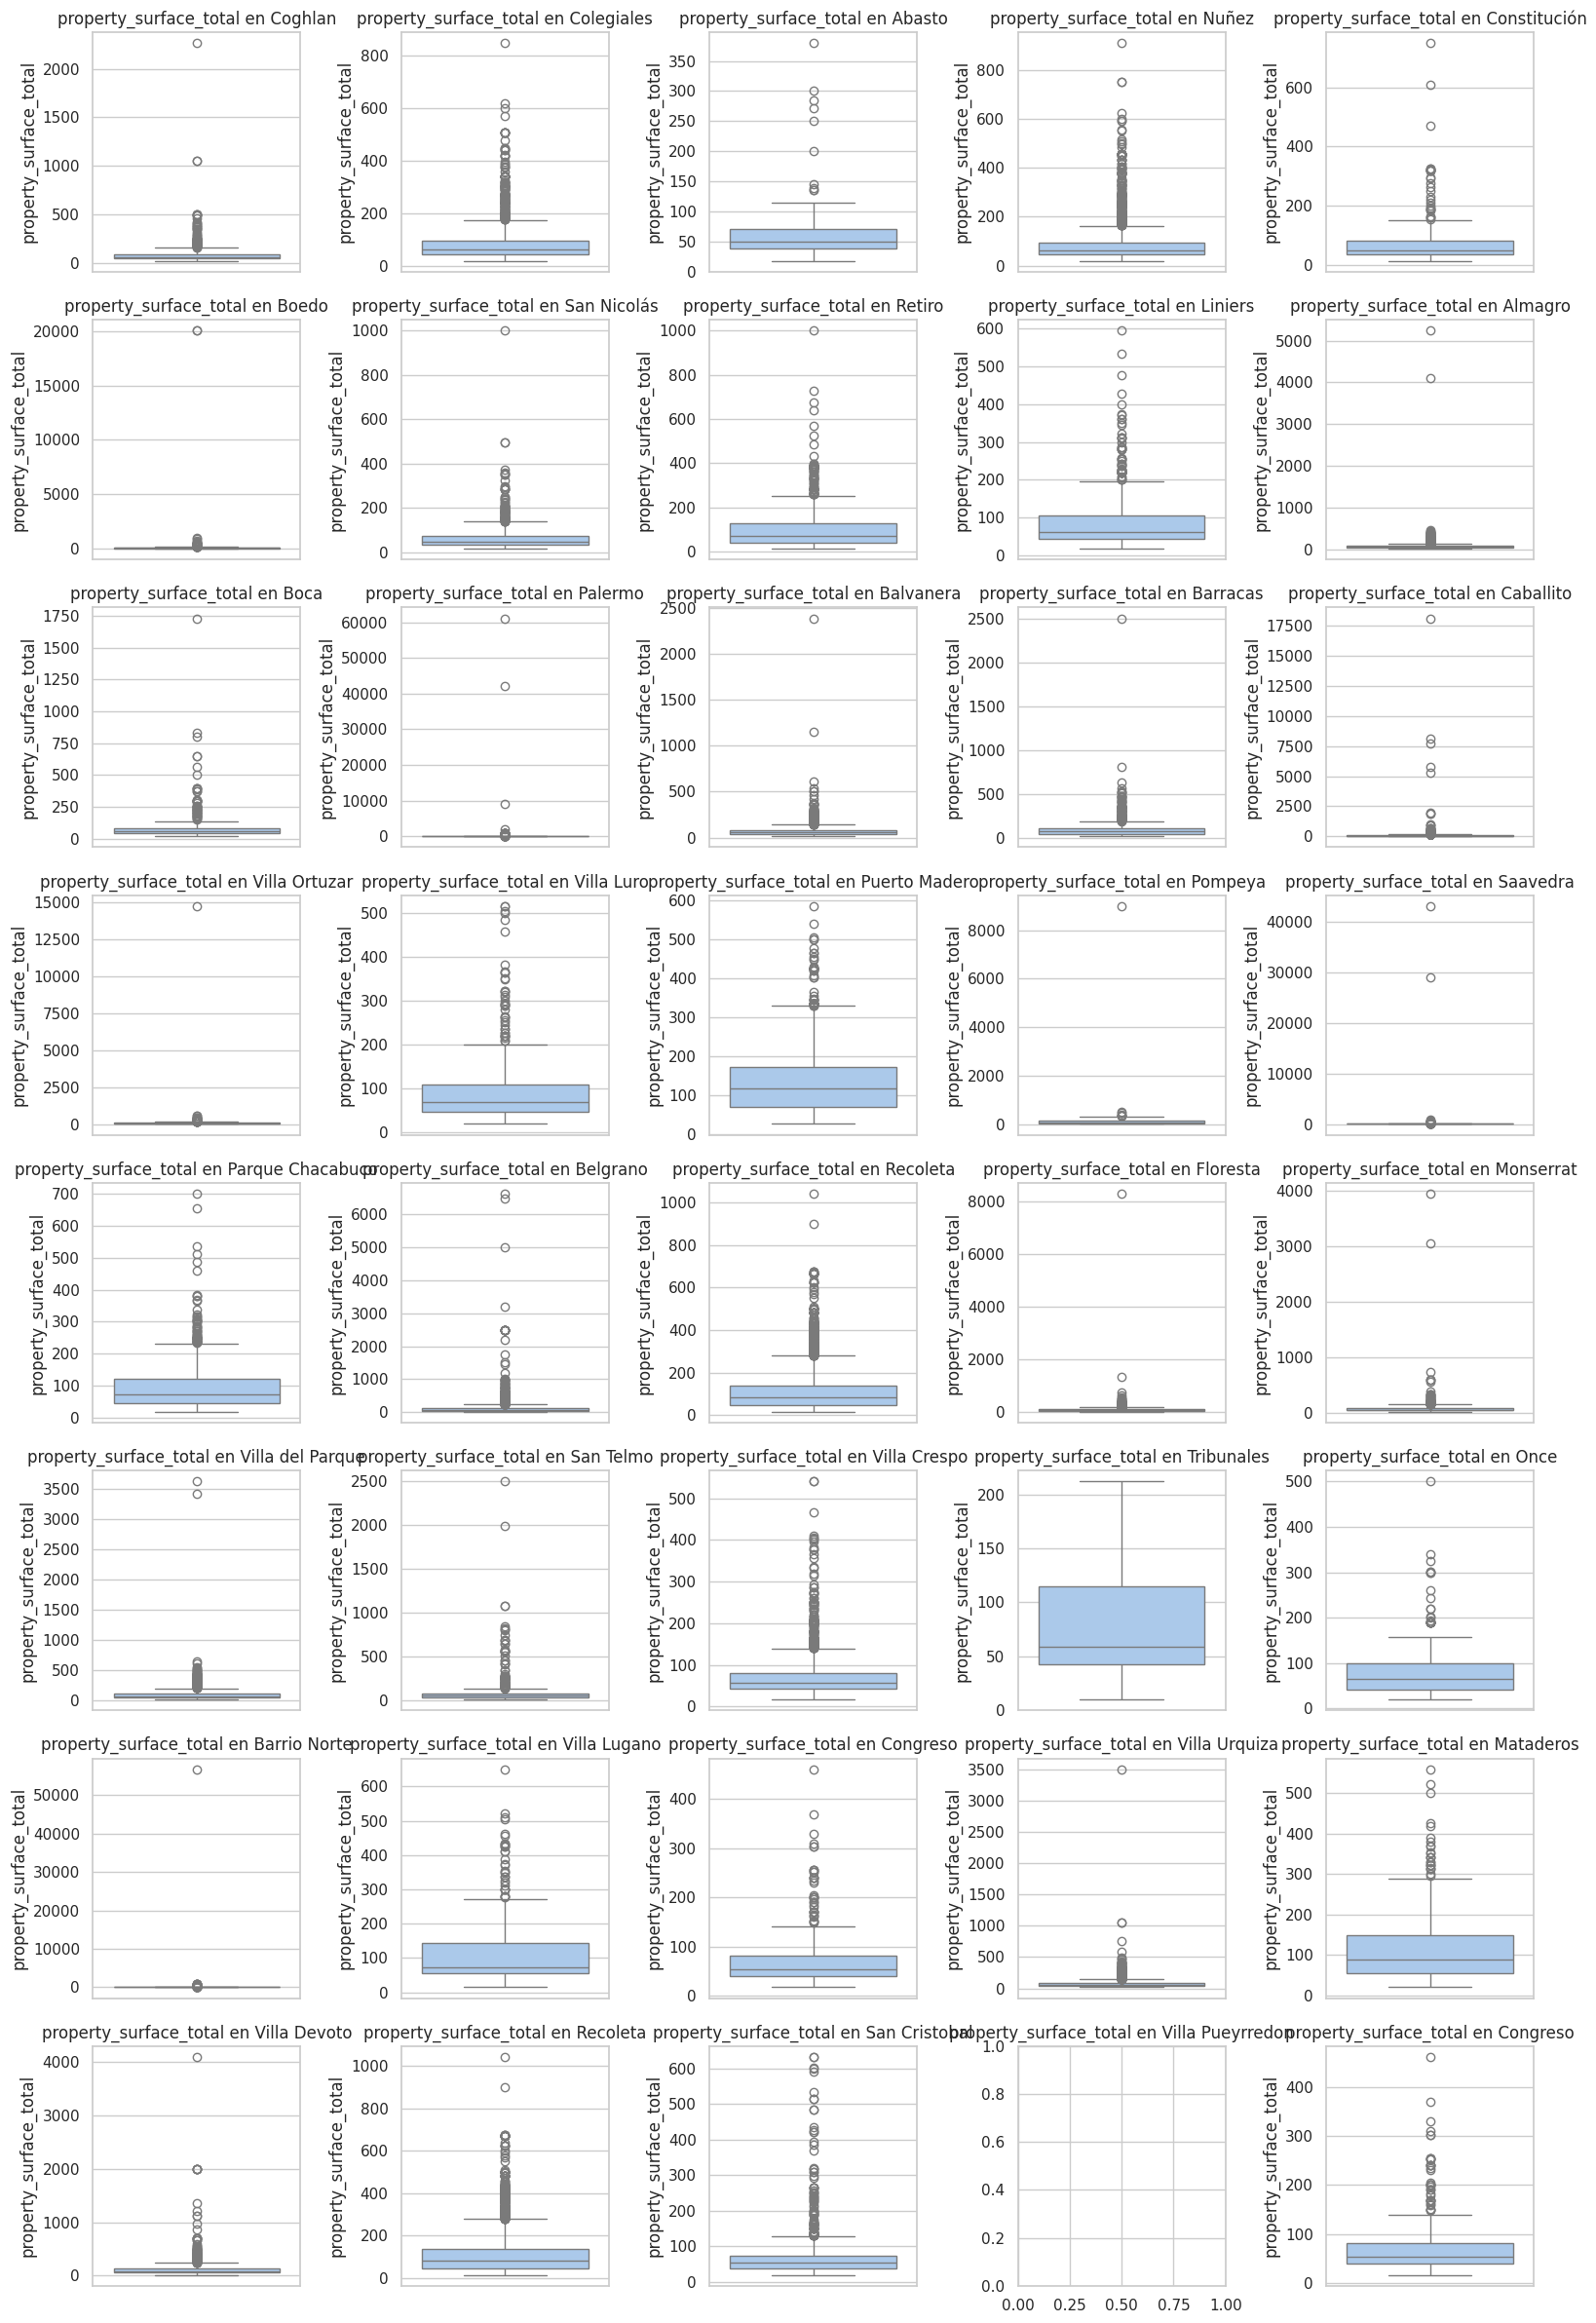

In [871]:
plot_por_barrio(ds_train, 'property_surface_total')

Podemos ver en las comparaciones de los barrios que incluso en aquellos que tienen más variaciones de tamaño de superficie total, los valores por encima de 3000 son outliers extremos, asi que normalizaremos esos valores.

In [872]:
# Corrección logaritmica
ds_train.loc[(ds_train['property_surface_total'] > 3000.0), 'property_surface_total'] = np.log(ds_train['property_surface_total'])

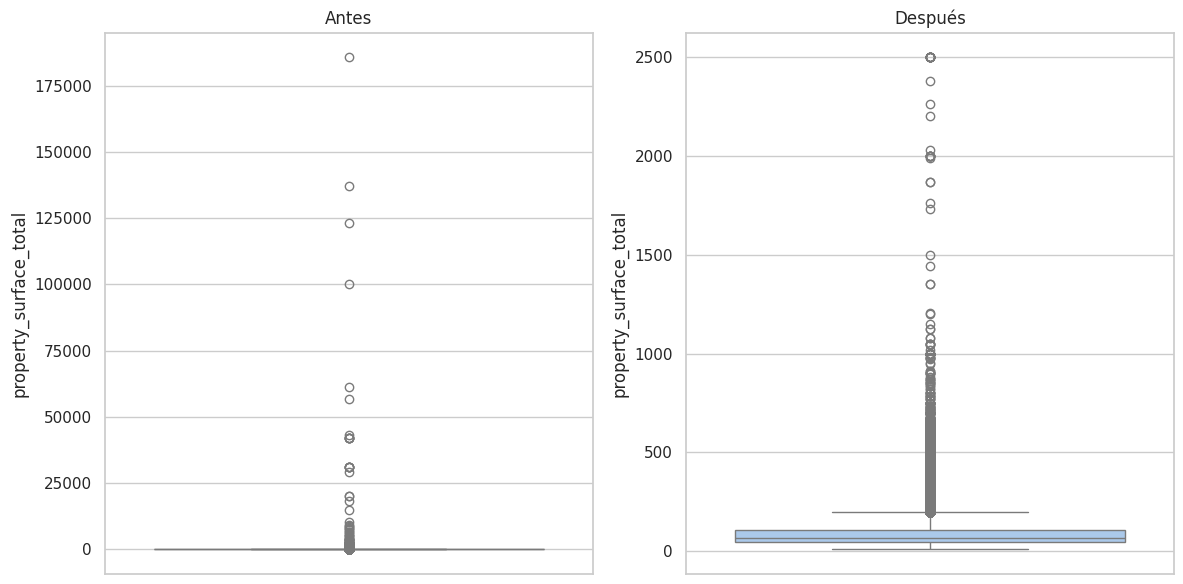

In [873]:
#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_surface_total')

#### **Z-Score, normal y modificado**

In [874]:
def plot_z(df, variable):
  plt.hist(df[variable])
  plt.title("Histograma Z-Score "+ variable)
  plt.xlabel("Z-Score "+variable)
  plt.tight_layout()
  plt.show()
  return

<ipython-input-875-1ce1084e760a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-875-1ce1084e760a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



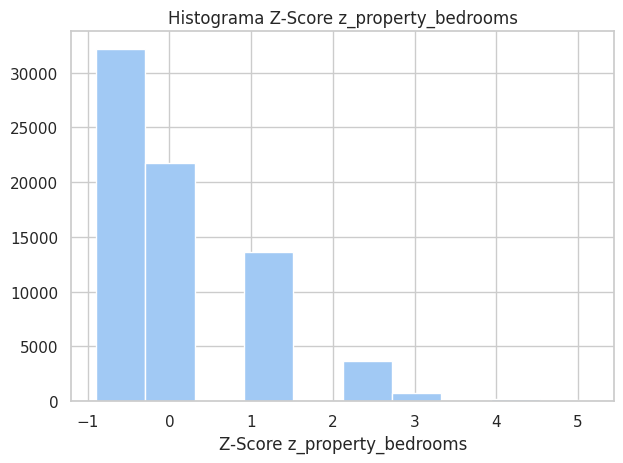

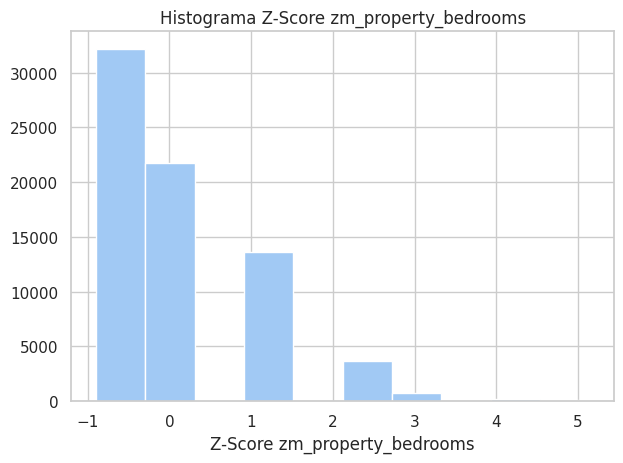

In [875]:
# Z Score property_bedrooms
ds_train['z_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)
ds_train['zm_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)

plot_z(ds_train, 'z_property_bedrooms')
plot_z(ds_train, 'zm_property_bedrooms')


In [876]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
69320   RZM/oX9lNw+/SGab4SnU3Q==  2021-09-23  2022-05-24 2021-09-23   
253516  wuSXgx7IjeHfS7jONb6HcA==  2021-08-20  2022-01-27 2021-08-20   
404990  L7SUzSS3iM+6N1fWi8SuwQ==  2021-08-13  9999-12-31 2021-08-13   
47899   hmMCvRAKwEvc4ZcAcM8mqQ==  2021-03-14  2021-05-03 2021-03-14   
251696  IZc9KxIdx9KTd6qtQnnu/g==  2021-06-18  2022-02-09 2021-06-18   
...                          ...         ...         ...        ...   
426284  gm4hvfLTSVtkVTN5ZDi2vQ==  2021-12-16  2022-02-09 2021-12-16   
418994  qMXwXJ4/yvOwfsT2GSrleA==  2021-10-14  2021-10-25 2021-10-14   
40268   X6juWRNE+c/E7vsCzQiO9w==  2021-07-19  2021-09-07 2021-07-19   
61528   KHwLuu0LRaR667XLg9rrBg==  2021-05-01  2021-05-26 2021-05-01   
285215  39gIlCwATjuInXStOisUeA==  2021-02-24  2021-03-01 2021-02-24   

          latitud   longitud       place_l3 property_type  property_rooms  \
69320  -34.631786 -58.467524         Flores          Casa             7.0   
253516 -34.571517 -58.467665       Belgrano          Casa             8.0   
404990 -34.607514 -58.385370    San Nicolás  Departamento             7.0   
47899  -34.570631 -58.499003  Villa Urquiza          Casa             7.0   
251696 -34.632753 -58.423905          Boedo            PH             8.0   
...           ...        ...            ...           ...             ...   
426284 -34.590048 -58.432810        Palermo          Casa             6.0   
418994 -34.615600 -58.387115      Monserrat  Departamento             8.0   
40268  -34.573576 -58.467816       Belgrano          Casa             9.0   
61528  -34.595844 -58.447351   Villa Crespo          Casa             8.0   
285215 -34.610226 -58.360748  Puerto Madero  Departamento             9.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
69320                 6.0                   416.0                     416.0   
253516                6.0                   367.0                     298.0   
404990                6.0                   158.0                     158.0   
47899                 6.0                   340.0                     310.0   
251696                6.0                   204.0                     185.0   
...                   ...                     ...                       ...   
426284                6.0                   550.0                     300.0   
418994                6.0                   201.0                     175.0   
40268                 6.0                   600.0                     600.0   
61528                 7.0                   244.0                     244.0   
285215                7.0                   448.0                     448.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
69320        1200000.0             4.133369              4.133369  
253516        930000.0             4.133369              4.133369  
404990        225000.0             4.133369              4.133369  
47899         450000.0             4.133369              4.133369  
251696        220000.0             4.133369              4.133369  
...                ...                  ...                   ...  
426284        680000.0             4.133369              4.133369  
418994        245000.0             4.133369              4.133369  
40268        2200000.0             4.133369              4.133369  
61528         500000.0             5.139430              5.139430  
285215       2770000.0             5.139430              5.139430  

[283 rows x 15 columns]

In [877]:
ds_train[(ds_train['zm_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
69320   RZM/oX9lNw+/SGab4SnU3Q==  2021-09-23  2022-05-24 2021-09-23   
253516  wuSXgx7IjeHfS7jONb6HcA==  2021-08-20  2022-01-27 2021-08-20   
404990  L7SUzSS3iM+6N1fWi8SuwQ==  2021-08-13  9999-12-31 2021-08-13   
47899   hmMCvRAKwEvc4ZcAcM8mqQ==  2021-03-14  2021-05-03 2021-03-14   
251696  IZc9KxIdx9KTd6qtQnnu/g==  2021-06-18  2022-02-09 2021-06-18   
...                          ...         ...         ...        ...   
426284  gm4hvfLTSVtkVTN5ZDi2vQ==  2021-12-16  2022-02-09 2021-12-16   
418994  qMXwXJ4/yvOwfsT2GSrleA==  2021-10-14  2021-10-25 2021-10-14   
40268   X6juWRNE+c/E7vsCzQiO9w==  2021-07-19  2021-09-07 2021-07-19   
61528   KHwLuu0LRaR667XLg9rrBg==  2021-05-01  2021-05-26 2021-05-01   
285215  39gIlCwATjuInXStOisUeA==  2021-02-24  2021-03-01 2021-02-24   

          latitud   longitud       place_l3 property_type  property_rooms  \
69320  -34.631786 -58.467524         Flores          Casa             7.0   
253516 -34.571517 -58.467665       Belgrano          Casa             8.0   
404990 -34.607514 -58.385370    San Nicolás  Departamento             7.0   
47899  -34.570631 -58.499003  Villa Urquiza          Casa             7.0   
251696 -34.632753 -58.423905          Boedo            PH             8.0   
...           ...        ...            ...           ...             ...   
426284 -34.590048 -58.432810        Palermo          Casa             6.0   
418994 -34.615600 -58.387115      Monserrat  Departamento             8.0   
40268  -34.573576 -58.467816       Belgrano          Casa             9.0   
61528  -34.595844 -58.447351   Villa Crespo          Casa             8.0   
285215 -34.610226 -58.360748  Puerto Madero  Departamento             9.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
69320                 6.0                   416.0                     416.0   
253516                6.0                   367.0                     298.0   
404990                6.0                   158.0                     158.0   
47899                 6.0                   340.0                     310.0   
251696                6.0                   204.0                     185.0   
...                   ...                     ...                       ...   
426284                6.0                   550.0                     300.0   
418994                6.0                   201.0                     175.0   
40268                 6.0                   600.0                     600.0   
61528                 7.0                   244.0                     244.0   
285215                7.0                   448.0                     448.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
69320        1200000.0             4.133369              4.133369  
253516        930000.0             4.133369              4.133369  
404990        225000.0             4.133369              4.133369  
47899         450000.0             4.133369              4.133369  
251696        220000.0             4.133369              4.133369  
...                ...                  ...                   ...  
426284        680000.0             4.133369              4.133369  
418994        245000.0             4.133369              4.133369  
40268        2200000.0             4.133369              4.133369  
61528         500000.0             5.139430              5.139430  
285215       2770000.0             5.139430              5.139430  

[283 rows x 15 columns]

In [878]:
ds_train[(ds_train['z_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

In [879]:
ds_train[(ds_train['zm_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

Siguiendo el Z score, podemos ver que no existen outliers negativos, incluso usando un valor mínimo de -1. Usando la regla de oro de 3.5, podemos ver que si lo existen positivos y en una cantidad bastante significativa (275 registros). Vamos a ampliar ligeramente este factor.

In [880]:
ds_train[(ds_train['z_property_bedrooms'] > 5)]

id  start_date    end_date created_on  \
351821  SioTWvNhCyTDPmU9CtHJSw==  2021-06-25  2021-07-04 2021-06-25   
448242  DtvwUdyN8mhShkCjkovMfg==  2021-12-16  2022-02-09 2021-12-16   
420396  O8oyYGBUdY3jPaEa1NK6Xg==  2021-12-01  2021-12-30 2021-12-01   
94758   IcX9fpFRmmNTKfmbAv3IUA==  2021-09-24  2022-02-09 2021-09-24   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   
...                          ...         ...         ...        ...   
378703  MY6zqzqyQR1/W31MWOg/uA==  2021-05-19  2021-06-05 2021-05-19   
251719  tkgMQvyN0MdOcGZnW/yx5Q==  2021-06-18  2021-11-04 2021-06-18   
72640   RBSIx9grSfooVB473NbCfA==  2021-05-29  2021-07-22 2021-05-29   
61528   KHwLuu0LRaR667XLg9rrBg==  2021-05-01  2021-05-26 2021-05-01   
285215  39gIlCwATjuInXStOisUeA==  2021-02-24  2021-03-01 2021-02-24   

          latitud   longitud       place_l3 property_type  property_rooms  \
351821 -34.615136 -58.376863      Monserrat          Casa             7.0   
448242 -34.635382 -58.355539           Boca            PH             8.0   
420396 -34.593316 -58.377201         Retiro  Departamento             9.0   
94758  -34.616128 -58.394715      Balvanera          Casa             8.0   
239181 -34.572554 -58.469842       Belgrano          Casa             8.0   
...           ...        ...            ...           ...             ...   
378703 -34.548947 -58.450237          Nuñez          Casa             7.0   
251719 -34.569861 -58.444716       Belgrano            PH            10.0   
72640  -34.602843 -58.386216    San Nicolás  Departamento             8.0   
61528  -34.595844 -58.447351   Villa Crespo          Casa             8.0   
285215 -34.610226 -58.360748  Puerto Madero  Departamento             9.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
351821                7.0                   258.0                     258.0   
448242                7.0                   395.0                     319.0   
420396                7.0                   380.0                     350.0   
94758                 7.0                   164.0                     143.0   
239181                7.0                   400.0                     400.0   
...                   ...                     ...                       ...   
378703                7.0                   501.0                     351.0   
251719                7.0                   714.0                     714.0   
72640                 7.0                   195.0                     190.0   
61528                 7.0                   244.0                     244.0   
285215                7.0                   448.0                     448.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
351821        329000.0              5.13943               5.13943  
448242        135000.0              5.13943               5.13943  
420396        650000.0              5.13943               5.13943  
94758         215000.0              5.13943               5.13943  
239181        920000.0              5.13943               5.13943  
...                ...                  ...                   ...  
378703        900000.0              5.13943               5.13943  
251719        525000.0              5.13943               5.13943  
72640         198000.0              5.13943               5.13943  
61528         500000.0              5.13943               5.13943  
285215       2770000.0              5.13943               5.13943  

[97 rows x 15 columns]

No podemos sacar ninguna conclusión de los registros, así que esperaremos al análisis multivariado para tomar decisiones al respecto de estos outliers.

### Análisis multivariado

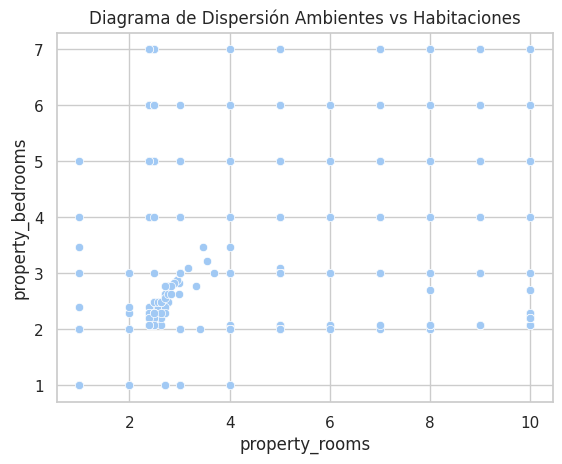

In [881]:
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones")
plt.show()

En el analisis univariado solucionamos los outliers imposibles.  

In [882]:
ds_train[(ds_train['property_rooms'] < ds_train['property_bedrooms'])]

id  start_date    end_date created_on  \
385730  qgnjg2cQkLeAALjoJhJl1g==  2021-02-10  2021-03-25 2021-02-10   
54021   hGQM/Ul+C0II9otOEBQnsA==  2021-09-22  2022-02-09 2021-09-22   
115502  tNDmYqYiETKsquAIP857XA==  2021-12-07  2022-01-27 2021-12-07   
9661    TCEygKmMJpgJFlJwCiCxtA==  2021-05-18  2021-06-05 2021-05-18   
336275  3SWFBziGzgsAiLOjdK3MVw==  2021-07-21  2021-07-31 2021-07-21   
...                          ...         ...         ...        ...   
4928    69j280NshNyMCYcFqsmhlw==  2021-09-20  2022-01-27 2021-09-20   
395126  NbR1tY7TfgYah0FfWgZSLw==  2021-02-13  2021-03-01 2021-02-13   
354668  +SPkA/Y4DHEHf+HIppYFKg==  2021-03-31  2021-04-16 2021-03-31   
123725  h0fOMIAlpk6v/IWJFmjTLg==  2021-08-04  2022-02-09 2021-08-04   
115505  7t2vq6m6pNwJXleT2SaFSg==  2021-12-07  2022-01-27 2021-12-07   

          latitud   longitud       place_l3 property_type  property_rooms  \
385730 -34.623053 -58.447006      Caballito  Departamento        4.000000   
54021  -34.605454 -58.506832   Villa Devoto  Departamento        4.000000   
115502 -34.613261 -58.361513  Puerto Madero  Departamento        3.000000   
9661   -34.563353 -58.444035       Belgrano  Departamento        2.484907   
336275 -34.595668 -58.389490       Recoleta  Departamento        4.000000   
...           ...        ...            ...           ...             ...   
4928   -34.645031 -58.373672       Barracas  Departamento        1.000000   
395126 -34.659578 -58.436102  Villa Soldati          Casa        5.000000   
354668 -34.611905 -58.382384      Monserrat            PH        2.708050   
123725 -34.607034 -58.382298    San Nicolás  Departamento        4.000000   
115505 -34.623793 -58.402256  San Cristobal  Departamento        1.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
385730           5.000000                   145.0                     135.0   
54021            5.000000                   172.0                     149.0   
115502           4.000000                   170.0                     166.0   
9661             5.000000                   435.0                     435.0   
336275           5.000000                   500.0                     500.0   
...                   ...                     ...                       ...   
4928             2.000000                    43.0                      37.0   
395126           6.000000                   223.0                     215.0   
354668           2.772589                   587.0                     276.0   
123725           6.000000                   111.0                     106.0   
115505           2.000000                    40.0                      37.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
385730        299000.0             3.127307              3.127307  
54021         320000.0             3.127307              3.127307  
115502       1300000.0             2.121246              2.121246  
9661          850000.0             3.127307              3.127307  
336275       1100000.0             3.127307              3.127307  
...                ...                  ...                   ...  
4928           80000.0             0.109124              0.109124  
395126        239000.0             4.133369              4.133369  
354668        349000.0             0.886395              0.886395  
123725        168000.0             4.133369              4.133369  
115505         75000.0             0.109124              0.109124  

[124 rows x 15 columns]

Tenemos 130 registros en los que el número de habitaciones es mayor que el de ambientes.

In [883]:
# Caso: más habitaciones que ambientes
condition= (ds_train['property_rooms'] < ds_train['property_bedrooms'])
ds_train[condition]

id  start_date    end_date created_on  \
385730  qgnjg2cQkLeAALjoJhJl1g==  2021-02-10  2021-03-25 2021-02-10   
54021   hGQM/Ul+C0II9otOEBQnsA==  2021-09-22  2022-02-09 2021-09-22   
115502  tNDmYqYiETKsquAIP857XA==  2021-12-07  2022-01-27 2021-12-07   
9661    TCEygKmMJpgJFlJwCiCxtA==  2021-05-18  2021-06-05 2021-05-18   
336275  3SWFBziGzgsAiLOjdK3MVw==  2021-07-21  2021-07-31 2021-07-21   
...                          ...         ...         ...        ...   
4928    69j280NshNyMCYcFqsmhlw==  2021-09-20  2022-01-27 2021-09-20   
395126  NbR1tY7TfgYah0FfWgZSLw==  2021-02-13  2021-03-01 2021-02-13   
354668  +SPkA/Y4DHEHf+HIppYFKg==  2021-03-31  2021-04-16 2021-03-31   
123725  h0fOMIAlpk6v/IWJFmjTLg==  2021-08-04  2022-02-09 2021-08-04   
115505  7t2vq6m6pNwJXleT2SaFSg==  2021-12-07  2022-01-27 2021-12-07   

          latitud   longitud       place_l3 property_type  property_rooms  \
385730 -34.623053 -58.447006      Caballito  Departamento        4.000000   
54021  -34.605454 -58.506832   Villa Devoto  Departamento        4.000000   
115502 -34.613261 -58.361513  Puerto Madero  Departamento        3.000000   
9661   -34.563353 -58.444035       Belgrano  Departamento        2.484907   
336275 -34.595668 -58.389490       Recoleta  Departamento        4.000000   
...           ...        ...            ...           ...             ...   
4928   -34.645031 -58.373672       Barracas  Departamento        1.000000   
395126 -34.659578 -58.436102  Villa Soldati          Casa        5.000000   
354668 -34.611905 -58.382384      Monserrat            PH        2.708050   
123725 -34.607034 -58.382298    San Nicolás  Departamento        4.000000   
115505 -34.623793 -58.402256  San Cristobal  Departamento        1.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
385730           5.000000                   145.0                     135.0   
54021            5.000000                   172.0                     149.0   
115502           4.000000                   170.0                     166.0   
9661             5.000000                   435.0                     435.0   
336275           5.000000                   500.0                     500.0   
...                   ...                     ...                       ...   
4928             2.000000                    43.0                      37.0   
395126           6.000000                   223.0                     215.0   
354668           2.772589                   587.0                     276.0   
123725           6.000000                   111.0                     106.0   
115505           2.000000                    40.0                      37.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
385730        299000.0             3.127307              3.127307  
54021         320000.0             3.127307              3.127307  
115502       1300000.0             2.121246              2.121246  
9661          850000.0             3.127307              3.127307  
336275       1100000.0             3.127307              3.127307  
...                ...                  ...                   ...  
4928           80000.0             0.109124              0.109124  
395126        239000.0             4.133369              4.133369  
354668        349000.0             0.886395              0.886395  
123725        168000.0             4.133369              4.133369  
115505         75000.0             0.109124              0.109124  

[124 rows x 15 columns]

Varios de estos registros tienen valores irracionales para una habitación (2.397... en vez de números enteros) y podrían haber sido resultados de imputaciones y transformaciones anteriores.
Una solución podría ser copiar los valores de habitaciones a ambientes, pero previniendo que algunos puedan ser valores verdaderos y para que no se pierdan, probaremos invirtiendo las columnas de estos casos en específico ya que muchos tienen sentido de esa manera (casas con 6 ambientes y 4 habitaciones, departamentos de 2 ambientes y una habitación, por dar unos ejemplos). Es un cambio riesgoso pero se tendrá en cuenta por si llegara a haber discrepancias en resultados futuros.

In [884]:
# Creamos una máscara booleana para nuestra condición
mask = ds_train['property_rooms'] < ds_train['property_bedrooms']

# Invertimos los valores usando la máscara
ds_train.loc[mask, ['property_rooms', 'property_bedrooms']] = ds_train.loc[mask, ['property_bedrooms', 'property_rooms']].values


In [885]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
69320   RZM/oX9lNw+/SGab4SnU3Q==  2021-09-23  2022-05-24 2021-09-23   
253516  wuSXgx7IjeHfS7jONb6HcA==  2021-08-20  2022-01-27 2021-08-20   
404990  L7SUzSS3iM+6N1fWi8SuwQ==  2021-08-13  9999-12-31 2021-08-13   
47899   hmMCvRAKwEvc4ZcAcM8mqQ==  2021-03-14  2021-05-03 2021-03-14   
251696  IZc9KxIdx9KTd6qtQnnu/g==  2021-06-18  2022-02-09 2021-06-18   
...                          ...         ...         ...        ...   
426284  gm4hvfLTSVtkVTN5ZDi2vQ==  2021-12-16  2022-02-09 2021-12-16   
418994  qMXwXJ4/yvOwfsT2GSrleA==  2021-10-14  2021-10-25 2021-10-14   
40268   X6juWRNE+c/E7vsCzQiO9w==  2021-07-19  2021-09-07 2021-07-19   
61528   KHwLuu0LRaR667XLg9rrBg==  2021-05-01  2021-05-26 2021-05-01   
285215  39gIlCwATjuInXStOisUeA==  2021-02-24  2021-03-01 2021-02-24   

          latitud   longitud       place_l3 property_type  property_rooms  \
69320  -34.631786 -58.467524         Flores          Casa             7.0   
253516 -34.571517 -58.467665       Belgrano          Casa             8.0   
404990 -34.607514 -58.385370    San Nicolás  Departamento             7.0   
47899  -34.570631 -58.499003  Villa Urquiza          Casa             7.0   
251696 -34.632753 -58.423905          Boedo            PH             8.0   
...           ...        ...            ...           ...             ...   
426284 -34.590048 -58.432810        Palermo          Casa             6.0   
418994 -34.615600 -58.387115      Monserrat  Departamento             8.0   
40268  -34.573576 -58.467816       Belgrano          Casa             9.0   
61528  -34.595844 -58.447351   Villa Crespo          Casa             8.0   
285215 -34.610226 -58.360748  Puerto Madero  Departamento             9.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
69320                 6.0                   416.0                     416.0   
253516                6.0                   367.0                     298.0   
404990                6.0                   158.0                     158.0   
47899                 6.0                   340.0                     310.0   
251696                6.0                   204.0                     185.0   
...                   ...                     ...                       ...   
426284                6.0                   550.0                     300.0   
418994                6.0                   201.0                     175.0   
40268                 6.0                   600.0                     600.0   
61528                 7.0                   244.0                     244.0   
285215                7.0                   448.0                     448.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
69320        1200000.0             4.133369              4.133369  
253516        930000.0             4.133369              4.133369  
404990        225000.0             4.133369              4.133369  
47899         450000.0             4.133369              4.133369  
251696        220000.0             4.133369              4.133369  
...                ...                  ...                   ...  
426284        680000.0             4.133369              4.133369  
418994        245000.0             4.133369              4.133369  
40268        2200000.0             4.133369              4.133369  
61528         500000.0             5.139430              5.139430  
285215       2770000.0             5.139430              5.139430  

[283 rows x 15 columns]

267 registros permanecen como outliers.

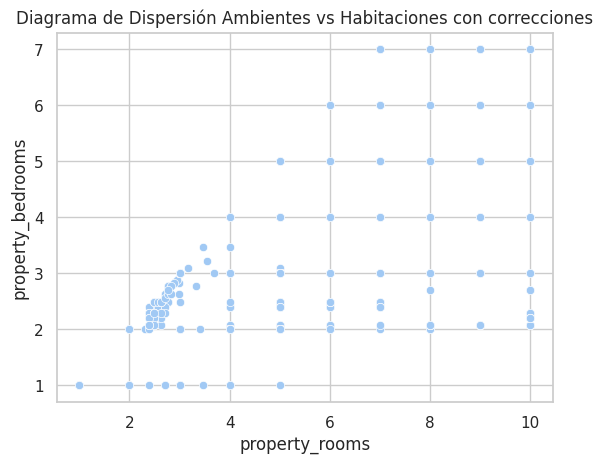

In [886]:
# Visualización después de correcciones
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones con correcciones")
plt.show()


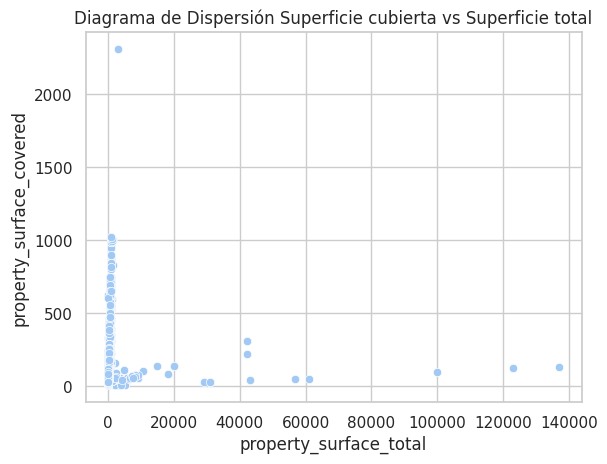

In [887]:
sns.scatterplot(y=ds_train["property_surface_covered"], x=df["property_surface_total"])
plt.title("Diagrama de Dispersión Superficie cubierta vs Superficie total")
plt.show()

En primer lugar, vamos a distinguir los casos triviales donde la superficie cubierta es mayor a la superficie total.

In [888]:
# Casos donde la superficie cubierta es mayor a la total
ds_train[(ds_train['property_surface_total'] < ds_train['property_surface_covered'])]

id  start_date    end_date created_on  \
442344  J6+r1KO/RsEbTmdwbaCRog==  2021-05-07  2021-06-05 2021-05-07   
43870   D4qgaLS6Wt83Etd36gb2Kw==  2021-11-23  2022-01-27 2021-11-23   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
413698  /oZNas8Tf1HPiD5UzSGpQQ==  2021-10-26  2021-11-22 2021-10-26   
74624   sHWUTwDH04JkXIGX918YNA==  2021-07-03  2021-11-03 2021-07-03   
...                          ...         ...         ...        ...   
293788  gKAdATTUiiZhPLYV5isIcA==  2021-02-23  2021-03-04 2021-02-23   
318227  PSFlQnul70KI6l0cAGYVIw==  2021-03-17  2021-04-05 2021-03-17   
53419   4PbBvn0GKmtFp0mTX+cEpA==  2021-09-22  2022-01-13 2021-09-22   
43279   QxsB9Jhwt9BtwsX0Zobd1w==  2021-11-23  2021-12-21 2021-11-23   
135283  EIwpTnAit34MuhJDzgZz3Q==  2021-04-06  2021-04-15 2021-04-06   

          latitud   longitud      place_l3 property_type  property_rooms  \
442344 -34.561491 -58.458549      Belgrano  Departamento             4.0   
43870  -34.616667 -58.416936       Almagro  Departamento             7.0   
313745 -34.649174 -58.413106       Pompeya            PH             6.0   
413698 -34.582588 -58.417292       Palermo  Departamento             4.0   
74624  -34.674396 -58.476608  Villa Lugano  Departamento             2.0   
...           ...        ...           ...           ...             ...   
293788 -34.597347 -58.448261  Villa Crespo  Departamento             1.0   
318227 -34.580874 -58.425968       Palermo            PH             4.0   
53419  -34.596458 -58.378178        Retiro  Departamento             6.0   
43279  -34.616935 -58.522459    Villa Real            PH             8.0   
135283 -34.593816 -58.387736      Recoleta  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
442344                3.0               80.000000                     81.00   
43870                 4.0              140.000000                    177.00   
313745                2.0                9.103646                     74.54   
413698                3.0               80.000000                     81.00   
74624                 1.0               46.000000                     51.00   
...                   ...                     ...                       ...   
293788                1.0               37.000000                     41.00   
318227                3.0              150.000000                    160.00   
53419                 5.0              112.000000                    126.00   
43279                 5.0              189.000000                    223.00   
135283                2.0               70.000000                     83.00   

        property_price  z_property_bedrooms  zm_property_bedrooms  
442344        230000.0             1.115185              1.115185  
43870         340000.0             2.121246              2.121246  
313745        125000.0             0.109124              0.109124  
413698        185000.0             1.115185              1.115185  
74624          97080.0            -0.896937             -0.896937  
...                ...                  ...                   ...  
293788         88000.0            -0.896937             -0.896937  
318227        250000.0             1.115185              1.115185  
53419         220000.0             3.127307              3.127307  
43279         159000.0             3.127307              3.127307  
135283        175000.0             0.109124              0.109124  

[312 rows x 15 columns]

#### **Isolation forest**

In [889]:
# Cargo los datos
X =ds_train.copy()
X.head()

id  start_date    end_date created_on  \
385730  qgnjg2cQkLeAALjoJhJl1g==  2021-02-10  2021-03-25 2021-02-10   
202765  nKtgSc3TcPeN26qcnF/A0Q==  2021-07-24  2021-07-28 2021-07-24   
365078  1RRkxV0svMP4wqr5D6tVQA==  2021-04-10  2021-04-25 2021-04-10   
12474   +H3z0pX0X4BUkNd++UJXaQ==  2021-07-06  2021-07-18 2021-07-06   
456343  jbTXXcCVj41WMxktWLRiBA==  2021-12-16  2022-02-09 2021-12-16   

          latitud   longitud          place_l3 property_type  property_rooms  \
385730 -34.623053 -58.447006         Caballito  Departamento             5.0   
202765 -34.604148 -58.414662           Almagro  Departamento             1.0   
365078 -34.617325 -58.417246           Almagro  Departamento             3.0   
12474  -34.597222 -58.398366          Recoleta  Departamento             1.0   
456343 -34.585957 -58.497433  Villa Pueyrredón  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
385730                4.0                   145.0                     135.0   
202765                1.0                    25.0                      23.0   
365078                2.0                    55.0                      51.0   
12474                 1.0                    36.0                      36.0   
456343                2.0                    64.0                      57.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
385730        299000.0             3.127307              3.127307  
202765         44900.0            -0.896937             -0.896937  
365078        148900.0             0.109124              0.109124  
12474          67900.0            -0.896937             -0.896937  
456343        150000.0             0.109124              0.109124

In [890]:
# Limpio el dataset
X.drop(columns=['latitud', 'longitud', 'created_on', 'end_date', 'start_date', 'z_property_bedrooms', 'zm_property_bedrooms'], inplace=True)
X.head()

id          place_l3 property_type  \
385730  qgnjg2cQkLeAALjoJhJl1g==         Caballito  Departamento   
202765  nKtgSc3TcPeN26qcnF/A0Q==           Almagro  Departamento   
365078  1RRkxV0svMP4wqr5D6tVQA==           Almagro  Departamento   
12474   +H3z0pX0X4BUkNd++UJXaQ==          Recoleta  Departamento   
456343  jbTXXcCVj41WMxktWLRiBA==  Villa Pueyrredón  Departamento   

        property_rooms  property_bedrooms  property_surface_total  \
385730             5.0                4.0                   145.0   
202765             1.0                1.0                    25.0   
365078             3.0                2.0                    55.0   
12474              1.0                1.0                    36.0   
456343             3.0                2.0                    64.0   

        property_surface_covered  property_price  
385730                     135.0        299000.0  
202765                      23.0         44900.0  
365078                      51.0        148900.0  
12474                       36.0         67900.0  
456343                      57.0        150000.0

In [891]:
# Label encoding de los nombres de las ciudades y el tipo de propiedad

label_encoder = LabelEncoder()
X['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
ds_train['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
X['type_encoded'] = label_encoder.fit_transform(X['property_type'])
ds_train['type_encoded'] = label_encoder.fit_transform(X['place_l3'])

X

<ipython-input-891-64ff5b082a66>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-891-64ff5b082a66>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id          place_l3 property_type  \
385730  qgnjg2cQkLeAALjoJhJl1g==         Caballito  Departamento   
202765  nKtgSc3TcPeN26qcnF/A0Q==           Almagro  Departamento   
365078  1RRkxV0svMP4wqr5D6tVQA==           Almagro  Departamento   
12474   +H3z0pX0X4BUkNd++UJXaQ==          Recoleta  Departamento   
456343  jbTXXcCVj41WMxktWLRiBA==  Villa Pueyrredón  Departamento   
...                          ...               ...           ...   
297871  b3MtzMTH7dD4SfM2tE9zfg==           Palermo  Departamento   
19948   4JM+6TxBeal86psAN1V66w==       San Nicolás  Departamento   
15305   w2YOJlICwtoMvZ6urEndGA==          Saavedra  Departamento   
331762  VFuAn+o3VlyZk7+2H9Ylng==     Villa Urquiza  Departamento   
442313  wLcYTSfSN6BEUWhWcGfsHQ==          Belgrano  Departamento   

        property_rooms  property_bedrooms  property_surface_total  \
385730             5.0                4.0                   145.0   
202765             1.0                1.0                    25.0   
365078             3.0                2.0                    55.0   
12474              1.0                1.0                    36.0   
456343             3.0                2.0                    64.0   
...                ...                ...                     ...   
297871             3.0                2.0                    72.0   
19948              1.0                1.0                    29.0   
15305              3.0                2.0                    78.0   
331762             1.0                1.0                    37.0   
442313             4.0                3.0                   173.0   

        property_surface_covered  property_price  place_encoded  type_encoded  
385730                     135.0        299000.0             10             1  
202765                      23.0         44900.0              2             1  
365078                      51.0        148900.0              2             1  
12474                       36.0         67900.0             36             1  
456343                      57.0        150000.0             52             1  
...                          ...             ...            ...           ...  
297871                      63.0        234000.0             27             1  
19948                       27.0         69000.0             41             1  
15305                       66.0        173000.0             39             1  
331762                      34.0        130000.0             57             1  
442313                     140.0        340000.0              7             1  

[72224 rows x 10 columns]

In [892]:
X.drop(columns=['place_l3', 'property_type', 'id'], inplace=True)

In [893]:
# Creo el modelo
iforest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=5,
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)

# Entreno y genero la predicción
pred = iforest.fit_predict(X)

# Almaceno scores y etiquetas
X["scores"] = iforest.decision_function(X)
X["outlier_label"] = pred

# Observaciones anómalas
X[X.outlier_label == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



property_rooms  property_bedrooms  property_surface_total  \
69320              7.0                6.0                   416.0   
445395             6.0                5.0                   327.0   
278804             5.0                3.0                   535.0   
3178               6.0                5.0                   323.0   
418414             4.0                3.0                   375.0   
...                ...                ...                     ...   
18309              5.0                2.0                   200.0   
218495             7.0                5.0                   300.0   
133844             4.0                4.0                   478.0   
383892             3.0                2.0                   187.0   
22164              4.0                3.0                   267.0   

        property_surface_covered  property_price  place_encoded  type_encoded  \
69320                      416.0       1200000.0             18             0   
445395                     297.0       2150000.0             36             1   
278804                     220.0       2800000.0             27             1   
3178                       263.0        260000.0             21             0   
418414                     290.0        430000.0             25             2   
...                          ...             ...            ...           ...   
18309                      130.0        350000.0             57             0   
218495                     300.0       1400000.0              7             1   
133844                     414.0       2200000.0             35             1   
383892                     176.0        345000.0             39             0   
22164                      193.0        410000.0             57             0   

          scores  outlier_label  
69320  -0.139822             -1  
445395 -0.085331             -1  
278804 -0.097168             -1  
3178   -0.053971             -1  
418414 -0.023334             -1  
...          ...            ...  
18309  -0.012509             -1  
218495 -0.088720             -1  
133844 -0.111986             -1  
383892 -0.000680             -1  
22164  -0.023602             -1  

[3612 rows x 9 columns]

In [894]:
# Cantidad de obs. anómalas
X.outlier_label.value_counts()

outlier_label
 1    68612
-1     3612
Name: count, dtype: int64

Obtuvimos 3611 anomalías. Visualizamos.

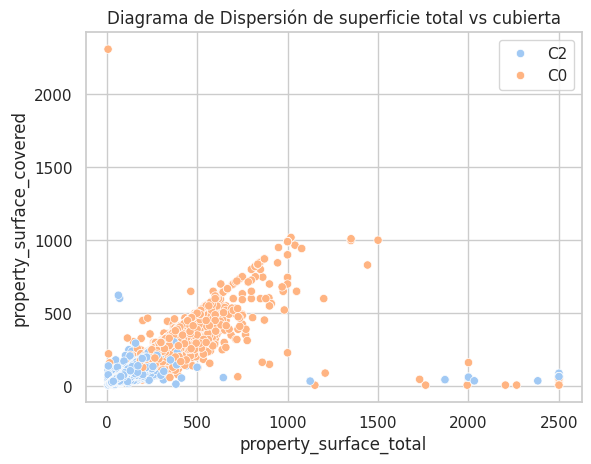

In [895]:
# Grafico dispersograma
color = [f"C{n+1}" for n in (X["outlier_label"].values)]

sns.scatterplot(x=X["property_surface_total"], y=X["property_surface_covered"], hue=color)
plt.title("Diagrama de Dispersión de superficie total vs cubierta")
plt.show()

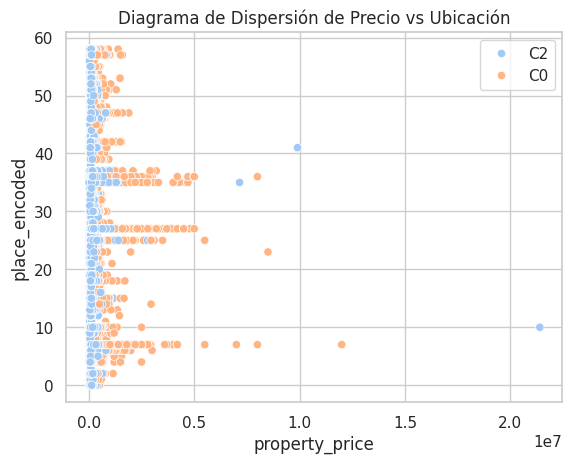

In [896]:
sns.scatterplot(x=X["property_price"], y=X["place_encoded"], hue=color)
plt.title("Diagrama de Dispersión de Precio vs Ubicación")
plt.show()

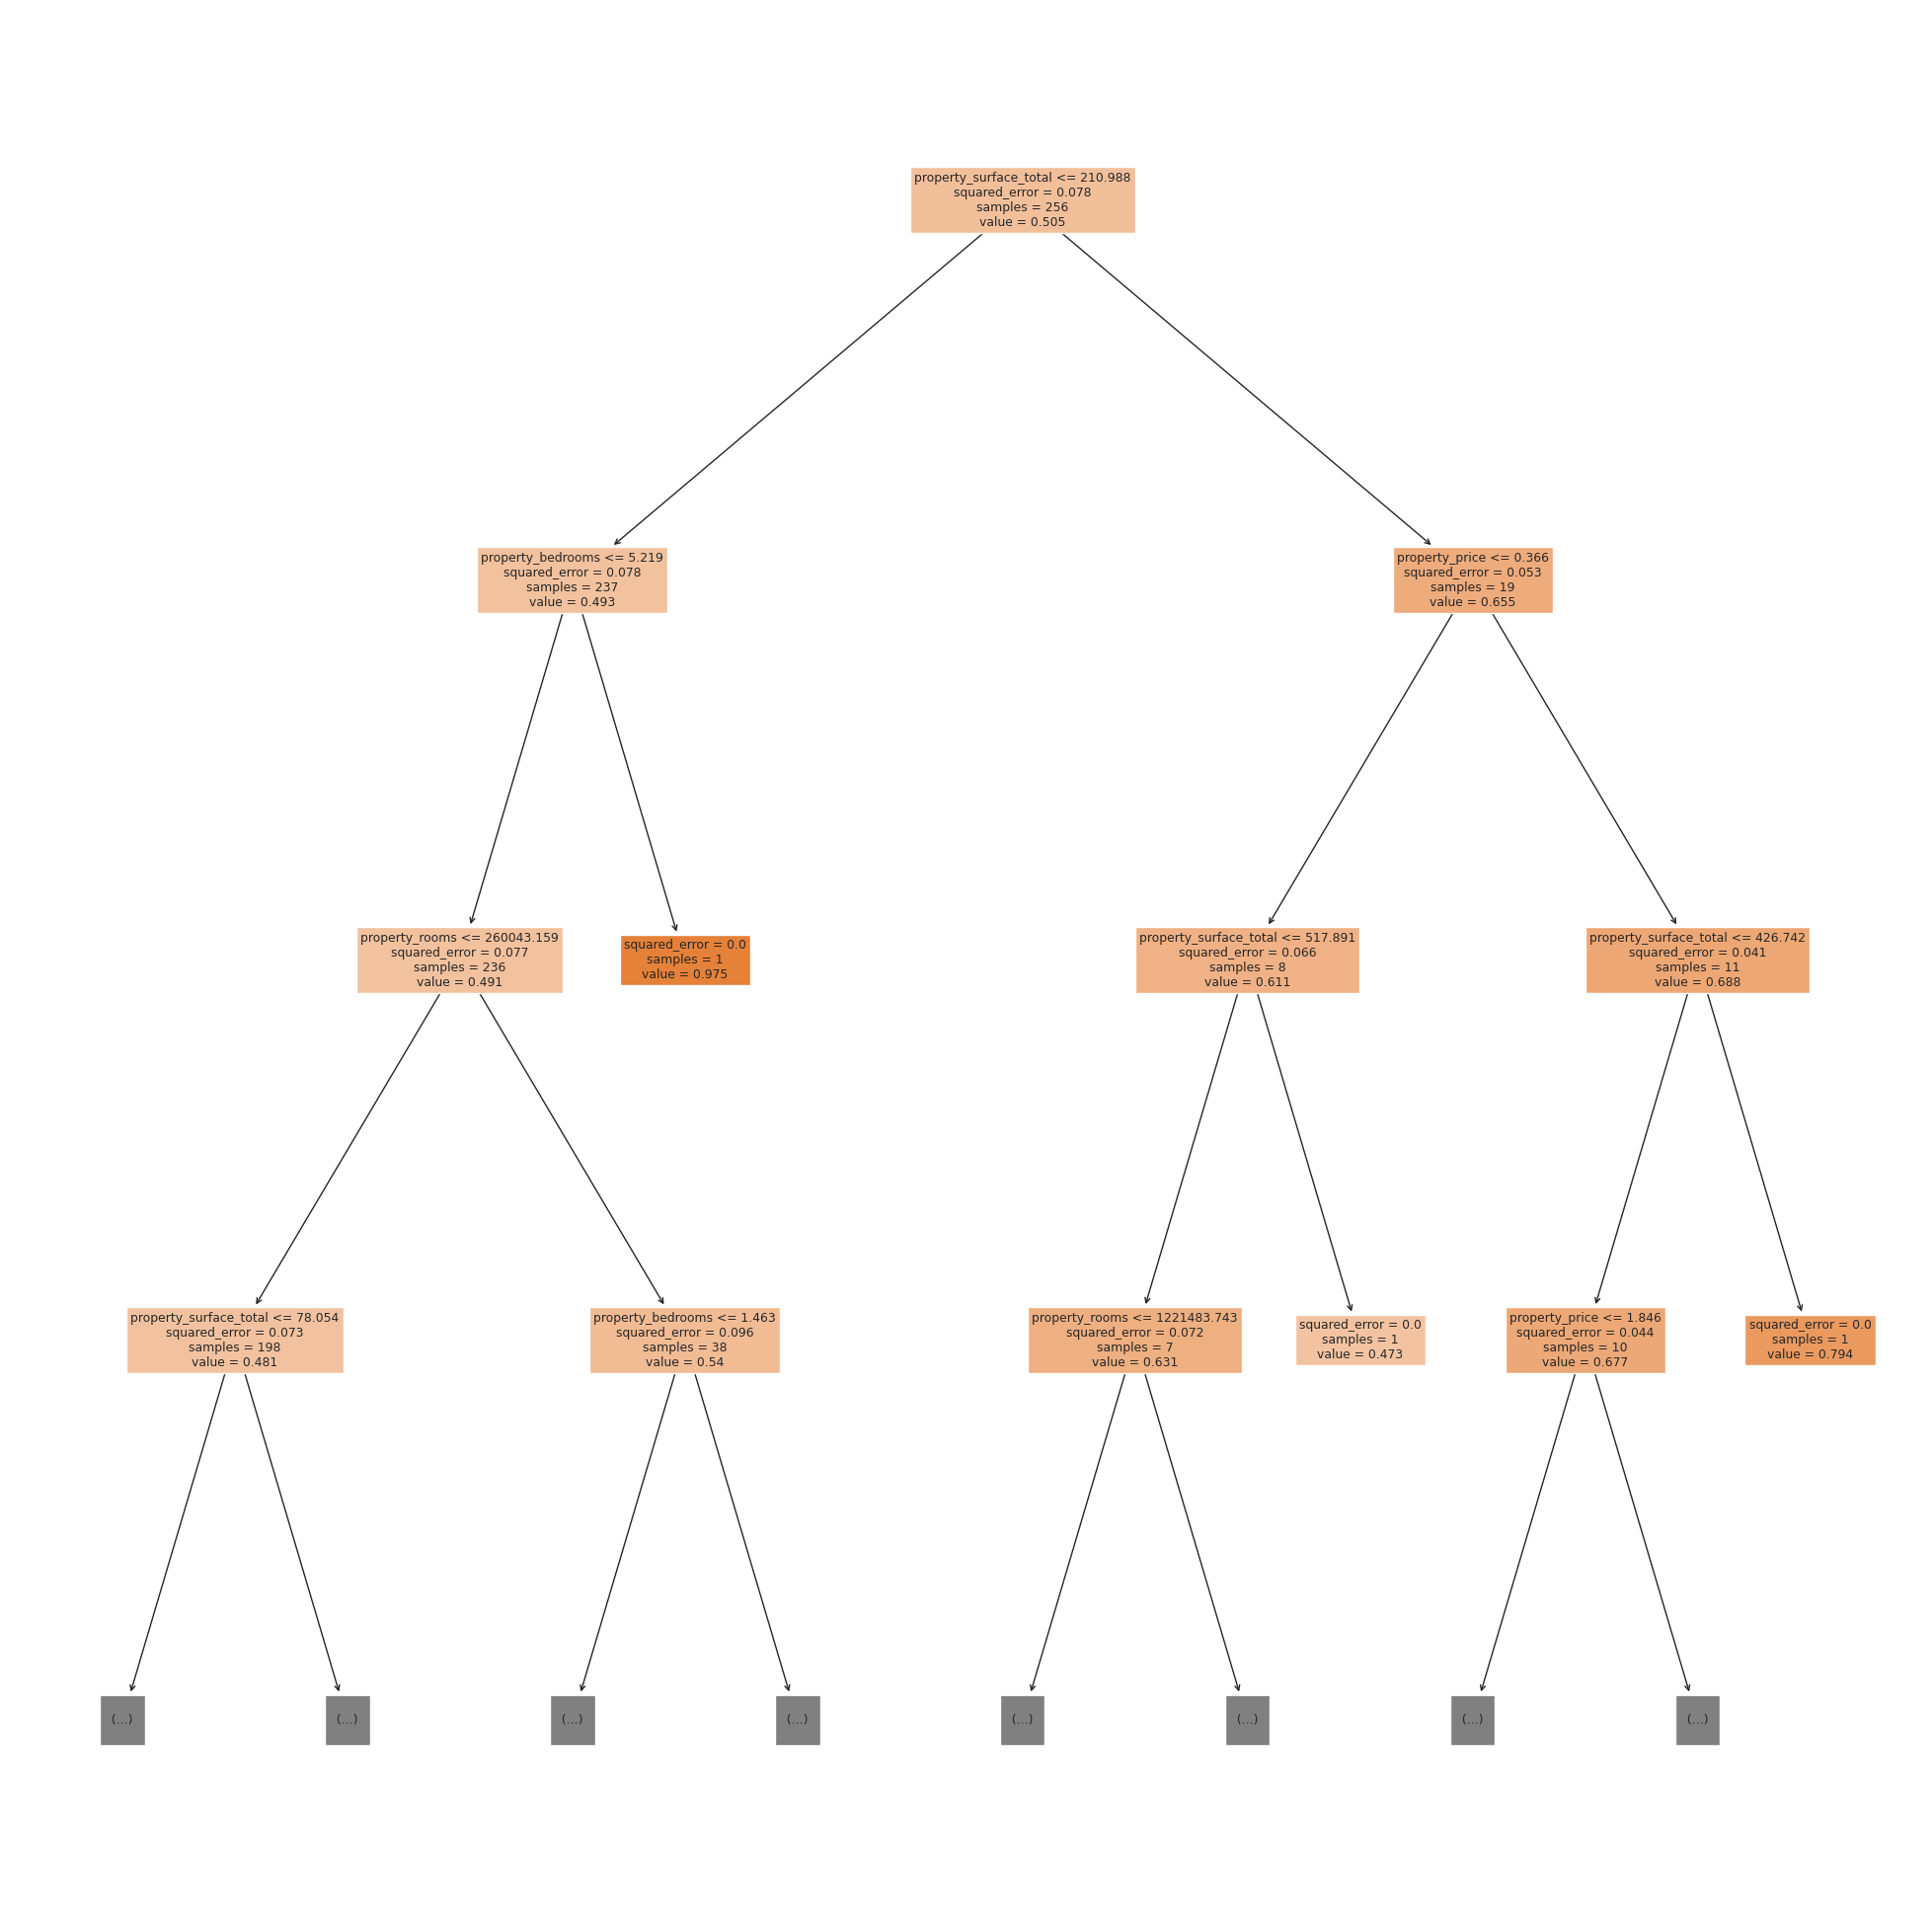

In [897]:
# Selecciono el árbol
estimator = iforest.estimators_[5]

# Grafico
plt.figure(figsize=(25, 25))
sk.tree.plot_tree(estimator, feature_names=X.columns, filled=True, max_depth=3)
plt.show()

#### **LOF**

Vamos a intentar detectar outliers multivariados usando LOF.

In [898]:
def lof(df, var1, var2, name):
  radius = calculo_lof(df, var1, var2, name)
  grafico_lof(df, var1, var2, name, radius)
  return


def calculo_lof(df, var1, var2, name):
  # CÁLCULO
  # Conjunto de entrenamiento
  X = df[[var1, var2]].values

  # Creo el clasificador
  clf = LocalOutlierFactor(n_neighbors=20)

  # Genero prediccion
  y_pred = clf.fit_predict(X)

  # Guardo los scores
  df[name] = clf.negative_outlier_factor_

  #VISUALIZACION
  # Calculo radio para plotear score
  radius = (df[name].max() - df[name]) / (df[name].max() - df[name].min())
  return radius


def grafico_lof(df, var1, var2, name, radius):
  # Grafico LOF
  plt.figure(figsize=(10, 10))
  plt.title("Local Outlier Factor (LOF)" + name)
  plt.scatter(
      df[var1].values,
      df[var2].values,
      edgecolor="grey",
      s=30,
      label="datos",
      facecolors="none",
  )
  plt.scatter(
      df[var1].values,
      df[var2].values,
      s=1300 * radius,
      edgecolors="red",
      facecolors="none",
      label="Outlier scores",
  )
  legend = plt.legend(loc="upper left")
  legend.legendHandles[0]._sizes = [10]
  legend.legendHandles[1]._sizes = [20]
  plt.show()
  return

In [899]:
def lof_segun_tipo(df, var1, var2, name):
  # Lista de tipos de vivienda
  tipos = ['Casa', 'PH', 'Departamento']

  # Subplots
  fig, axs = plt.subplots(8, 5, figsize=(16, 24))
  axs = axs.flatten()

  for i, tipo in enumerate(tipos):
      filtered_data = ds_train[ds_train['property_type'] == tipo]

      # CÁLCULO
      # Conjunto de entrenamiento
      X = filtered_data[var1,var2].values
      # Creo el clasificador
      clf = LocalOutlierFactor(n_neighbors=20)
      # Genero prediccion
      y_pred = clf.fit_predict(X)
      # Guardo los scores
      filtered_data[name] = clf.negative_outlier_factor_

      #VISUALIZACION
      # Calculo radio para plotear score
      radius = (filtered_data[name].max() - filtered_data[name]) / (filtered_data[name].max() - filtered_data[name].min())

      # Grafico LOF
      plt.figure(figsize=(10, 10))
      plt.scatter(
          filtered_data[var1].values,
          filtered_data[var2].values,
          edgecolor="grey",
          s=30,
          label="datos",
          facecolors="none",
      )
      plt.scatter(
          filtered_data[var1].values,
          filtered_data[var2].values,
          s=1300 * radius,
          edgecolors="red",
          facecolors="none",
          label="Outlier scores",
      )
      legend = plt.legend(loc="upper left")
      legend.legendHandles[0]._sizes = [10]
      legend.legendHandles[1]._sizes = [20]


      axs[i].set_title(f'{var1}, {var2} en {barrio}')

  # Adjust layout
  plt.tight_layout()
  # Show the plot
  plt.show()
  return

##### Superficie cubierta vs superficie total

<ipython-input-898-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-898-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-898-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



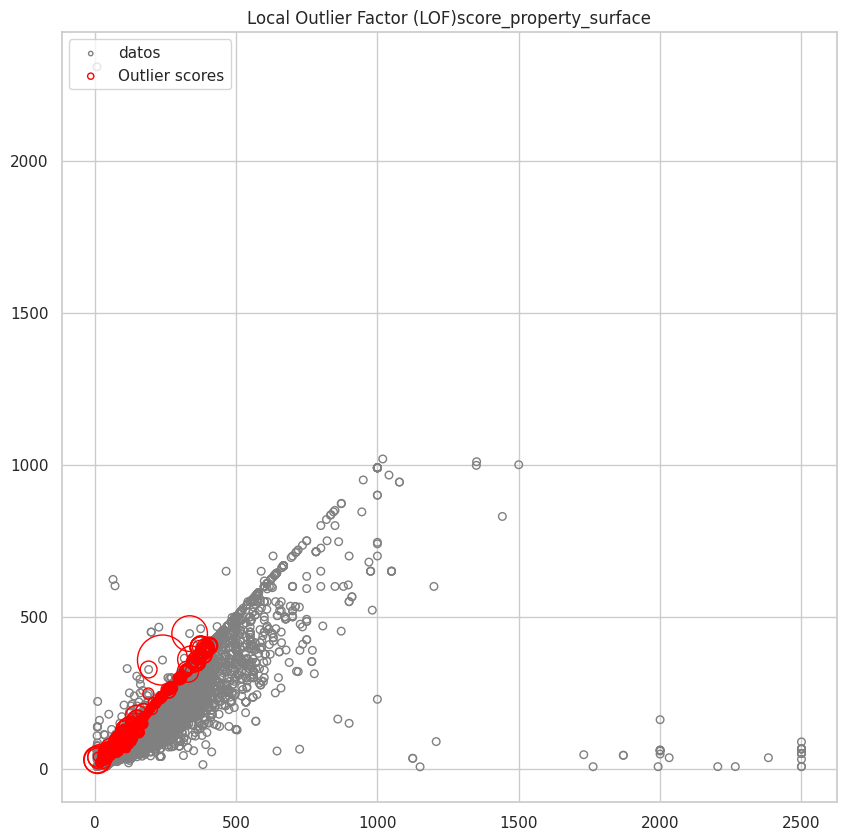

In [900]:
lof(ds_train, 'property_surface_total', 'property_surface_covered', 'score_property_surface')

##### Precio vs Superficie total

<ipython-input-898-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-898-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-898-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



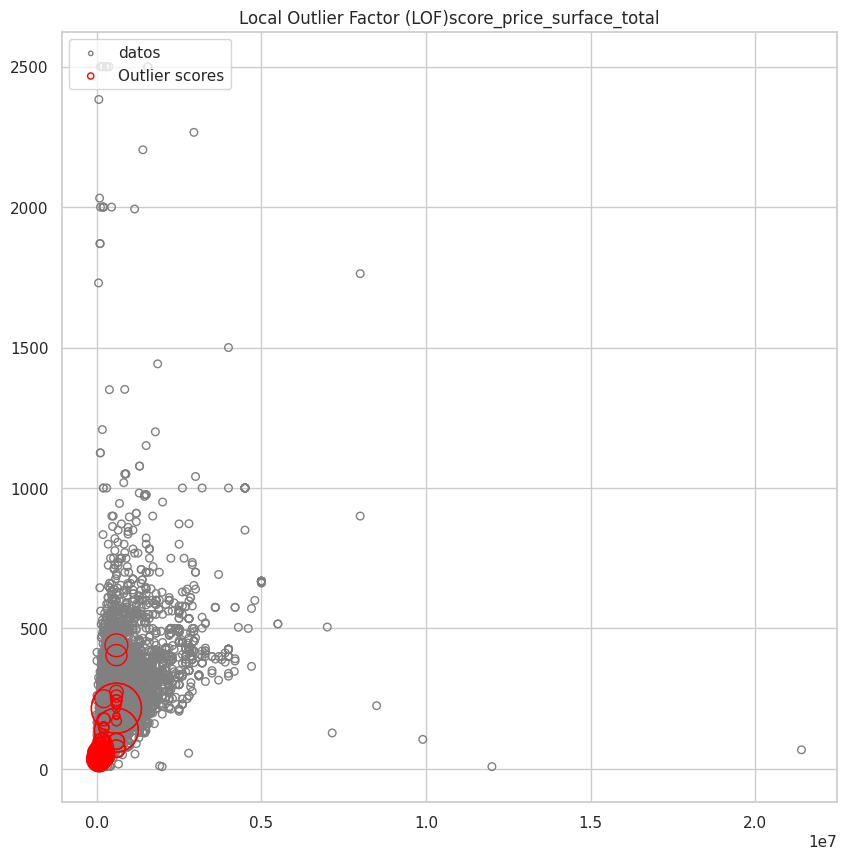

In [901]:
lof(ds_train, 'property_price', 'property_surface_total', 'score_price_surface_total')

###### Ubicación vs Precio

<ipython-input-898-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-898-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-898-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



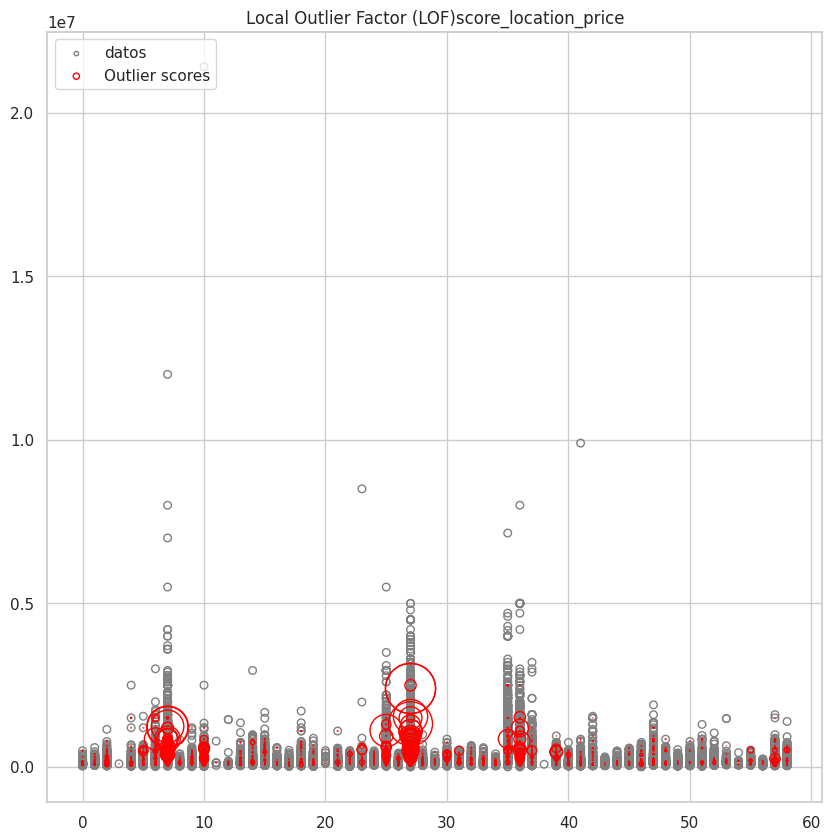

In [902]:
lof(ds_train, 'place_encoded', 'property_price', 'score_location_price')

##### Ubicación vs superficie cubierta

<ipython-input-898-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-898-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-898-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



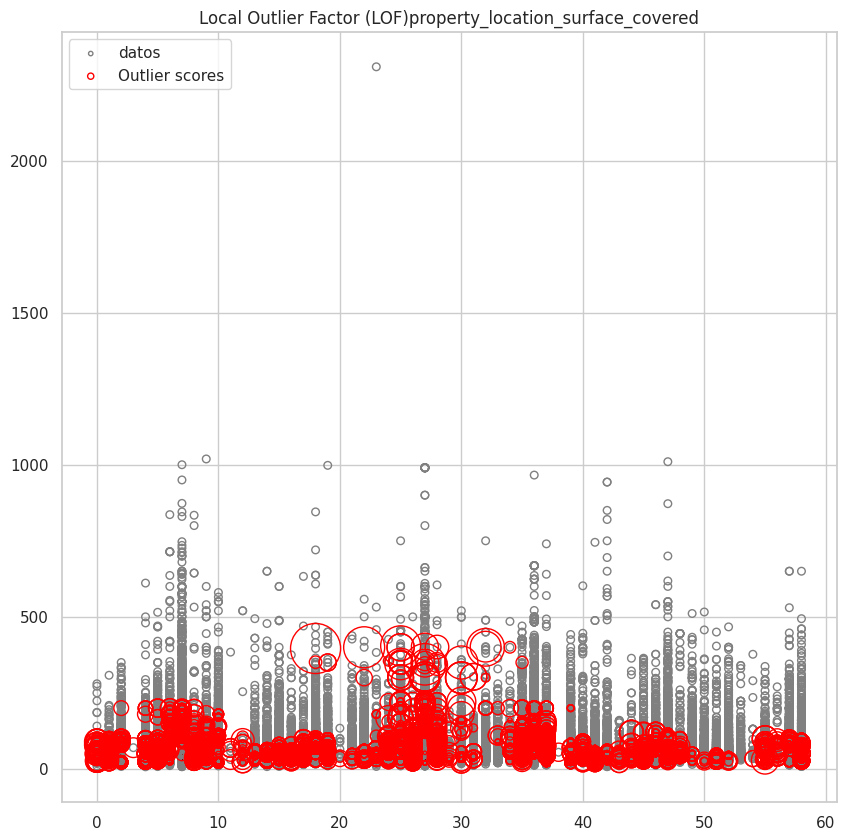

In [903]:
lof(ds_train, 'place_encoded', 'property_surface_covered', 'property_location_surface_covered')

### Relación precio de venta-metros de superficie



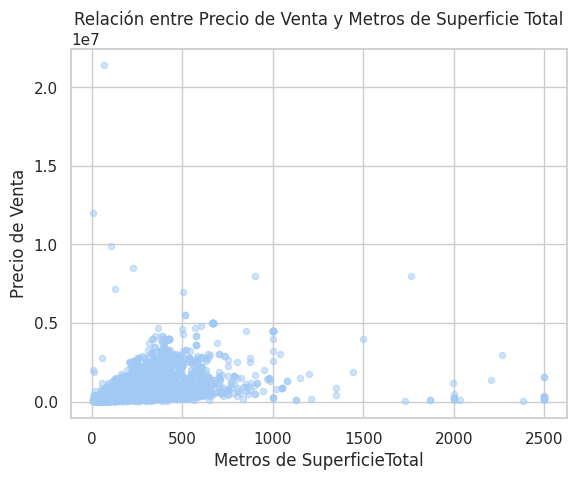

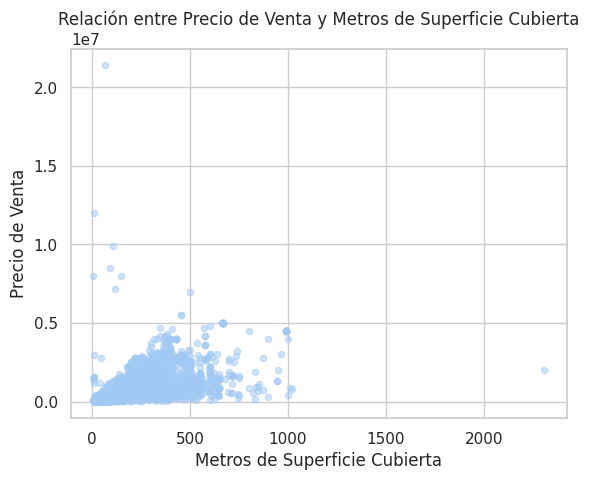

In [904]:
ds_train.plot.scatter(x='property_surface_total', y='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Total')
plt.xlabel('Metros de SuperficieTotal')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()


ds_train.plot.scatter(x='property_surface_covered', y='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Cubierta')
plt.xlabel('Metros de Superficie Cubierta')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

Podemos ver algunos datos atípicos donde a pesar de muchos precios de superficie, el precio es demasiado bajo, y su opuesto, precio muy alto para supercie muy limitada.

PENDIENTE